Kiki <br>
This ipython notebook is for exploring trends between newly-granted legally permanent residents each year and the areas of the US they go to. <br>
All analysis of work done in this notebook is provided in our blog posts.

In [18]:
%matplotlib inline

#importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import defaultdict

In [19]:
#importing csvs for LPRs each year into a dictionary for easy access
df = {}
for i in range(8):
    if i < 4:
        df[i] = pd.read_table('lpr_200'+str(i+6)+'.csv',sep=',')
    else:
        df[i] = pd.read_table('lpr_20'+str(i+6)+'.csv',sep=',')
    df[i] = df[i][0:8]
    df[i] = df[i].reindex(df[i].index.delete(4)).reset_index()

print df[0].shape,df[1].shape,df[2].shape,df[3].shape,df[4].shape,df[5].shape,df[6].shape,df[7].shape


(7, 58) (7, 58) (7, 58) (7, 58) (7, 58) (7, 58) (7, 58) (7, 58)


In [20]:
df[0] #2006 csv test

,index,Origin,Total,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,...,Texas,U.S. Armed Services Posts,U.S. Dependencies,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,0,Total,1266264,4278,1554,21530,2926,264677,12714,18700,...,89037,95,7080,5749,895,38488,23805,764,8341,376
1,1,Africa,117430,441,40,1804,143,9384,1843,1220,...,8623,6,21,602,246,7157,3057,78,688,23
2,2,Asia,422333,1739,819,4628,959,121890,3460,4345,...,24601,46,2131,1228,243,14433,9600,345,3706,123
3,3,Europe,164285,648,293,2235,274,25822,2181,4312,...,5261,14,182,745,189,3471,6144,131,1506,80
4,5,Northern America,165313,302,125,1200,70,3651,420,3109,...,3028,11,3649,304,129,1490,1067,59,315,34
5,6,Oceania,7385,24,41,122,24,3001,160,85,...,270,0,20,211,16,104,377,7,55,16
6,7,Latin America,472057,1189,271,11625,1465,100648,4723,8058,...,47680,18,3847,2717,89,12326,3603,164,2155,100


In [21]:
#remove NaNs and make sure everything is numeric
for i in range(8):
    df[i].fillna(0)
    pd.to_numeric(df[i],errors='ignore')

In [22]:
#line plot function for plotting
def line_plot(data,title,xlabel,ylabel,xticks,legend):
    plt.figure(figsize=(15,11))
    xvals = 0
    p = {}
    for i,val in enumerate(data):
        xvals = np.arange(len(val))
        p[i] = plt.plot(np.arange(len(val)),val)
    plt.title(title,fontsize=16)
    plt.xlabel(xlabel,fontsize=16)
    plt.ylabel(ylabel,fontsize=16)
    plt.xticks(xvals,xticks,fontsize=12)
    legend1 = [p[i][0] for i in p]
    plt.legend(legend1,legend,fontsize=12,loc=0)
    
    import matplotlib.ticker as tkr
    formatter = tkr.ScalarFormatter(useMathText=False)
    formatter.set_scientific(False)
    
    plt.show()

First, I plotted the amount of new LPRs (legally permanent residents) each year to see if there were any interesting trends: 

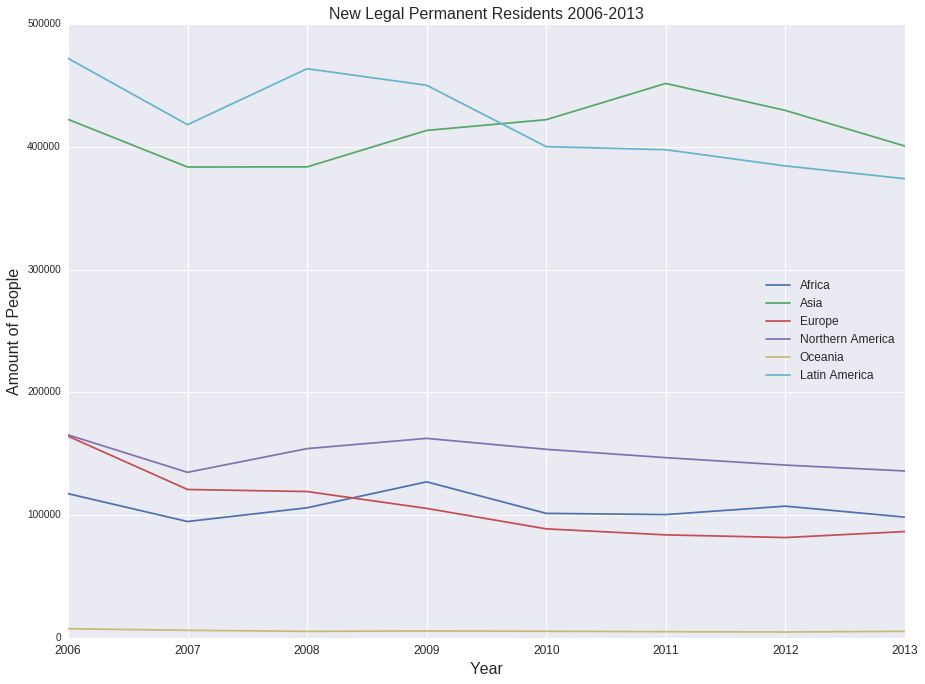

In [24]:
total_africa = [df[i]['Total'].loc[1] for i in range(8)]
total_asia = [df[i]['Total'].loc[2] for i in range(8)]
total_europe = [df[i]['Total'].loc[3] for i in range(8)]
total_north = [df[i]['Total'].loc[4] for i in range(8)]
total_oceania = [df[i]['Total'].loc[5] for i in range(8)]
total_latin = [df[i]['Total'].loc[6] for i in range(8)]
xticks = ('2006','2007','2008','2009','2010','2011','2012','2013')
legend = ('Africa','Asia','Europe','Northern America','Oceania','Latin America')

line_plot([total_africa,total_asia,total_europe,total_north,total_oceania,total_latin],'New Legal Permanent Residents 2006-2013','Year','Amount of People',xticks,legend)

Next, I wanted to see the top immigrant groups for each state in each year: 

In [25]:
years_change = defaultdict(dict)
#loop through years
for data in df.keys():
    for col in df[data].columns:  
        if col == 'index' or col == 'Origin':
            continue
        else:
            try:
                #get 4 foreign-born groups with most number of immigrants in that particular state and write to dict
                years_change[data][col] = df[data].nlargest(4, col)[col].to_dict()
            except:
                print data,col
years_change

defaultdict(<type 'dict'>, {0: {'Mississippi': {0: 1480.0, 2: 704.0, 3: 183.0, 6: 411.0}, 'South Dakota': {0: 1013.0, 1: 367.0, 2: 213.0, 3: 217.0}, 'Oklahoma': {0: 4591.0, 1: 465.0, 2: 1785.0, 6: 1718.0}, 'Delaware': {0: 2265.0, 1: 430.0, 2: 751.0, 6: 733.0}, 'Minnesota': {0: 18254.0, 1: 7308.0, 2: 6479.0, 6: 2033.0}, 'Illinois': {0: 52459.0, 2: 17774.0, 3: 14305.0, 6: 15706.0}, 'Arkansas': {0: 2926.0, 2: 959.0, 3: 274.0, 6: 1465.0}, 'New Mexico': {0: 3805.0, 2: 775.0, 3: 320.0, 6: 2284.0}, 'Indiana': {0: 8125.0, 2: 3090.0, 3: 1281.0, 6: 2248.0}, 'Maryland': {0: 30204.0, 1: 8808.0, 2: 9622.0, 6: 7849.0}, 'Louisiana': {0: 2693.0, 2: 1274.0, 3: 306.0, 6: 713.0}, 'Idaho': {0: 2377.0, 2: 533.0, 3: 504.0, 6: 1033.0}, 'Wyoming': {0: 376.0, 2: 123.0, 3: 80.0, 6: 100.0}, 'Tennessee': {0: 10042.0, 1: 2511.0, 2: 3822.0, 6: 2034.0}, 'Arizona': {0: 21530.0, 2: 4628.0, 3: 2235.0, 6: 11625.0}, 'Iowa': {0: 4086.0, 1: 729.0, 2: 1167.0, 6: 1396.0}, 'Michigan': {0: 20911.0, 2: 10281.0, 3: 4893.0, 6: 25

In [26]:
#abbreviations
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

In [27]:
origin = {0:'Total',1:'Africa',2:'Asia',3:'Europe',4:'Northern America',5:'Oceania',6:'Latin America'}

top_groups = defaultdict(list)
top_group_val = defaultdict(list)
    
#get the top groups by name and in order, from most to least
for i in range(8):
    for ab,state in states.iteritems():
        groups = dict()
        for place in years_change[i][state]:
            groups[origin[place]] = years_change[i][state][place]
        group_key = sorted(groups,key=groups.get,reverse=True)
        group_val = [groups[key] for key in group_key]
        top_groups[state].append(group_key)
        top_group_val[state].append(dict(zip(group_key,group_val)))
        
top_groups

defaultdict(<type 'list'>, {'Mississippi': [['Total', 'Asia', 'Latin America', 'Europe'], ['Total', 'Asia', 'Latin America', 'Europe'], ['Total', 'Asia', 'Latin America', 'Europe'], ['Total', 'Asia', 'Latin America', 'Europe'], ['Total', 'Asia', 'Latin America', 'Northern America'], ['Total', 'Asia', 'Latin America', 'Europe'], ['Total', 'Asia', 'Latin America', 'Northern America'], ['Total', 'Asia', 'Latin America', 'Africa']], 'Oklahoma': [['Total', 'Asia', 'Latin America', 'Africa'], ['Total', 'Latin America', 'Asia', 'Africa'], ['Total', 'Latin America', 'Asia', 'Africa'], ['Total', 'Latin America', 'Asia', 'Africa'], ['Total', 'Asia', 'Latin America', 'Africa'], ['Total', 'Asia', 'Latin America', 'Africa'], ['Total', 'Asia', 'Latin America', 'Africa'], ['Total', 'Asia', 'Latin America', 'Africa']], 'Wyoming': [['Total', 'Asia', 'Latin America', 'Europe'], ['Total', 'Asia', 'Latin America', 'Europe'], ['Total', 'Latin America', 'Asia', 'Europe'], ['Total', 'Latin America', 'Asia', 

Then, I got the top states for each foreign-born group: 

In [30]:
df_temp = {}
group_years_change = defaultdict(dict)

#transpose the dataframe to get the top states for each group
for data in df.keys():
    df_temp[data] = df[data].transpose()[2:].apply(lambda x: pd.to_numeric(x, errors='coerce'))
    df_temp[data].columns = ['Total','Africa','Asia','Europe','Northern America','Oceania','Latin America']
    for col in df_temp[data].columns:
        group_years_change[data][col] = df_temp[data].nlargest(6, col)[col].to_dict()
#group_years_change

In [31]:
african = []
asian = []
european = []
northern = []
oceanic = []
latin = []
total = []

#creating lists of each year's states for each group

for i in range(8):
    asian.append(group_years_change[i]['Asia'])
    african.append(group_years_change[i]['Africa'])
    european.append(group_years_change[i]['Europe'])
    northern.append(group_years_change[i]['Northern America'])
    oceanic.append(group_years_change[i]['Oceania'])
    latin.append(group_years_change[i]['Latin America'])
    total.append(group_years_change[i]['Total'])

tot_asia = []
tot_africa = []
tot_europe = []
tot_north = []
tot_oceania = []
tot_latin = []
tot_tot = []
    
for i in range(8):
    tot_asia.append(sorted(asian[i],key=asian[i].get,reverse=True))
    tot_africa.append(sorted(african[i],key=african[i].get,reverse=True))
    tot_europe.append(sorted(european[i],key=european[i].get,reverse=True))
    tot_north.append(sorted(northern[i],key=northern[i].get,reverse=True))
    tot_oceania.append(sorted(oceanic[i],key=oceanic[i].get,reverse=True))
    tot_latin.append(sorted(latin[i],key=latin[i].get,reverse=True))
    tot_tot.append(sorted(total[i],key=total[i].get,reverse=True))


In [32]:
print 'Asia:'
tot_asia
# asia = []
# for year,states in enumerate(tot_asia):
#     year_num = []
#     for state in states:
#         year_num.append((state,group_years_change[year]['Asia'][state]))
#     asia.append(year_num)
# asia

Asia:


[['Total', 'California', 'New York', 'Texas', 'New Jersey', 'Illinois'],
 ['Total', 'California', 'New York', 'Texas', 'New Jersey', 'Illinois'],
 ['Total', 'California', 'New York', 'Texas', 'New Jersey', 'Illinois'],
 ['Total', 'California', 'New York', 'Texas', 'New Jersey', 'Illinois'],
 ['Total', 'California', 'New York', 'Texas', 'New Jersey', 'Illinois'],
 ['Total', 'California', 'New York', 'Texas', 'New Jersey', 'Illinois'],
 ['Total', 'California', 'New York', 'Texas', 'New Jersey', 'Illinois'],
 ['Total', 'California', 'New York', 'Texas', 'New Jersey', 'Illinois']]

In [339]:
print 'Africa:'
tot_africa

Africa:


[['Total', 'New York', 'California', 'Maryland', 'Texas', 'Minnesota'],
 ['Total', 'New York', 'California', 'Maryland', 'Texas', 'Massachusetts'],
 ['Total', 'New York', 'Maryland', 'California', 'Minnesota', 'Texas'],
 ['Total', 'New York', 'Texas', 'Minnesota', 'California', 'Maryland'],
 ['Total', 'New York', 'Texas', 'Maryland', 'California', 'New Jersey'],
 ['Total', 'New York', 'Texas', 'Maryland', 'California', 'Massachusetts'],
 ['Total', 'New York', 'Texas', 'Maryland', 'California', 'Massachusetts'],
 ['Total', 'New York', 'Texas', 'Maryland', 'California', 'New Jersey']]

In [340]:
print 'Europe:'
tot_europe

Europe:


[['Total', 'New York', 'California', 'Illinois', 'Florida', 'New Jersey'],
 ['Total', 'California', 'New York', 'Illinois', 'Florida', 'New Jersey'],
 ['Total', 'New York', 'California', 'Illinois', 'Florida', 'New Jersey'],
 ['Total', 'New York', 'California', 'Florida', 'Illinois', 'New Jersey'],
 ['Total', 'New York', 'California', 'Florida', 'Illinois', 'New Jersey'],
 ['Total', 'New York', 'California', 'Florida', 'Illinois', 'New Jersey'],
 ['Total', 'New York', 'California', 'Florida', 'Illinois', 'New Jersey'],
 ['Total', 'New York', 'California', 'Florida', 'Illinois', 'New Jersey']]

In [341]:
print 'Northern America:'
tot_north

Northern America:


[['Total', 'Florida', 'New York', 'New Jersey', 'Massachusetts', 'California'],
 ['Total', 'Florida', 'New York', 'New Jersey', 'Massachusetts', 'California'],
 ['Total', 'Florida', 'New York', 'New Jersey', 'Massachusetts', 'California'],
 ['Total', 'Florida', 'New York', 'New Jersey', 'Massachusetts', 'California'],
 ['Total',
  'Florida',
  'New York',
  'New Jersey',
  'Massachusetts',
  'Pennsylvania'],
 ['Total',
  'Florida',
  'New York',
  'New Jersey',
  'Massachusetts',
  'Pennsylvania'],
 ['Total',
  'Florida',
  'New York',
  'New Jersey',
  'Massachusetts',
  'Pennsylvania'],
 ['Total',
  'Florida',
  'New York',
  'New Jersey',
  'Massachusetts',
  'Pennsylvania']]

In [342]:
print 'Oceania:'
tot_oceania

Oceania:


[['Total', 'California', 'New York', 'Washington', 'Florida', 'Texas'],
 ['Total', 'California', 'New York', 'Washington', 'Hawaii', 'Texas'],
 ['Total', 'California', 'New York', 'Washington', 'Texas', 'Hawaii'],
 ['Total', 'California', 'New York', 'Washington', 'Texas', 'Florida'],
 ['Total', 'California', 'New York', 'Washington', 'Texas', 'Utah'],
 ['Total', 'California', 'New York', 'Washington', 'Texas', 'Utah'],
 ['Total', 'California', 'New York', 'Washington', 'Texas', 'Florida'],
 ['Total', 'California', 'New York', 'Washington', 'Texas', 'Utah']]

In [343]:
print 'Latin America:'
tot_latin

Latin America:


[['Total', 'California', 'Florida', 'New York', 'Texas', 'New Jersey'],
 ['Total', 'Florida', 'California', 'New York', 'Texas', 'New Jersey'],
 ['Total', 'Florida', 'California', 'New York', 'Texas', 'New Jersey'],
 ['Total', 'Florida', 'California', 'New York', 'Texas', 'New Jersey'],
 ['Total', 'Florida', 'California', 'New York', 'Texas', 'New Jersey'],
 ['Total', 'Florida', 'California', 'New York', 'Texas', 'New Jersey'],
 ['Total', 'Florida', 'California', 'New York', 'Texas', 'New Jersey'],
 ['Total', 'Florida', 'California', 'New York', 'Texas', 'New Jersey']]

In [344]:
print 'Total:'
tot_tot

Total:


[['Total', 'California', 'New York', 'Florida', 'Texas', 'New Jersey'],
 ['Total', 'California', 'New York', 'Florida', 'Texas', 'New Jersey'],
 ['Total', 'California', 'New York', 'Florida', 'Texas', 'New Jersey'],
 ['Total', 'California', 'New York', 'Florida', 'Texas', 'New Jersey'],
 ['Total', 'California', 'New York', 'Florida', 'Texas', 'New Jersey'],
 ['Total', 'California', 'New York', 'Florida', 'Texas', 'New Jersey'],
 ['Total', 'California', 'New York', 'Florida', 'Texas', 'New Jersey'],
 ['Total', 'California', 'New York', 'Florida', 'Texas', 'New Jersey']]

For the map visualization available on our blog, the javascript code required our data to be in a certain format. So I arranged and parsed through the data, and wrote it to a new file.

In [36]:
#creating one giant dataframe

fin = df[0].append(df[1])
fin = fin.append(df[2])
fin = fin.append(df[3])
fin = fin.append(df[4])
fin = fin.append(df[5])
fin = fin.append(df[6])
fin = fin.append(df[7])
#print df[0].shape,df[1].shape,df[2].shape,df[3].shape,df[4].shape,df[5].shape,df[6].shape,df[7].shape

In [37]:
#headers as groups, not states
fin = fin.transpose()
fin = fin.ix[:-1]

In [38]:
columns = []

#name columns with year and group
for i in range(8):
    if i < 4:
        year = '200'+str(i+6)
    else:
        year = '20'+str(i+6)
    for j in range(7):
        columns.append(origin[j]+'_'+year)
fin.columns = columns

In [39]:
#add column of abbreviations for access
abb = ['AL','AK','AZ','AR','CA','CO','CT','DE','DC','FL','GA','GU','HI','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA','MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','OG','PA','PR','RI','SC','SD','TN','TX','TO','UA','UD','US','UT','VT','VA','WA','WV','WI','WY']
fin['Abbreviations'] = abb
print len(abb)

58


In [40]:
remove = ['GU','OG','PR','UA','UD','US']
for place in remove:
    fin = fin[fin['Abbreviations'] != place]
fin

,Total_2006,Africa_2006,Asia_2006,Europe_2006,Northern America_2006,Oceania_2006,Latin America_2006,Total_2007,Africa_2007,Asia_2007,...,Oceania_2012,Latin America_2012,Total_2013,Africa_2013,Asia_2013,Europe_2013,Northern America_2013,Oceania_2013,Latin America_2013,Abbreviations
Alabama,4278,441,1739,648,302,24,1189,3393,385,1489,...,7,1131,3848,456,1877,384,210,21,1000,AL
Alaska,1554,40,819,293,125,41,271,1617,68,966,...,37,293,1460,107,888,166,116,42,192,AK
Arizona,21530,1804,4628,2235,1200,122,11625,17528,1250,4291,...,83,9203,16097,1102,4900,1082,721,67,8516,AZ
Arkansas,2926,143,959,274,70,24,1465,2722,118,878,...,9,1345,2900,169,1109,178,95,11,1367,AR
California,264677,9384,121890,25822,3651,3001,100648,228941,8035,114231,...,1732,66418,191806,7321,102464,12861,3135,1857,64237,CA
Colorado,12714,1843,3460,2181,420,160,4723,11039,1608,3237,...,128,4313,11108,1846,3899,1049,391,112,3913,CO
Connecticut,18700,1220,4345,4312,3109,85,8058,12932,963,3917,...,46,4925,10985,860,3568,1672,2330,57,4489,CT
Delaware,2265,430,751,271,300,4,733,2085,412,812,...,6,662,2325,459,959,183,361,3,665,DE
District of Columbia,3775,1240,654,485,306,26,1221,2541,887,441,...,19,676,2981,1106,732,384,209,NaN,644,DC
Florida,155996,3690,16807,12463,65818,292,79698,126277,2964,14135,...,175,77127,102939,2730,13023,7983,48197,177,76162,FL


In [350]:
#fin.to_csv('lpr_df.csv',sep=',') #write to csv

Next, I created a dictionary with the number of actual immigrants from a group in a state, the number of expected immigrants, and the error between the two numbers:

In [507]:
year_cells = {}
for k in range(8):
    year = df[k]
    #expected = (test2['Total'][2])*(test2['California'][0]/test2['Total'][0])
    #actual = test2['California'][2]
    #print actual,expected,actual/expected

    tot_row = year.iloc[0][2:]
    cells = defaultdict(dict)

    for i in range(1,7):
        all_cells = []
        row = year.iloc[i][2:]
        for j,val in enumerate(row):
            actual = val
            expected = row[0]*(tot_row[j]/tot_row[0])       #total num of foreign born group LPRs * (tot LPRs in state/tot LPRS)
            cell = [actual,expected,(expected-actual)/expected]
            all_cells.append(cell)
            #print cell
        cells[i] = all_cells
    year_cells[k] = cells

year_cells

{0: defaultdict(<type 'dict'>, {1: [[117430.0, 117430.0, 0.0], [441.0, 396.73049221963197, -0.11158584643365455], [40.0, 144.1138814654764, 0.72244172738084], [1804.0, 1996.6356936626171, 0.096480141206554945], [143.0, 271.3495605971583, 0.47300449027704244], [9384.0, 24545.450324734811, 0.61768882314847551], [1843.0, 1179.0629916036467, -0.56310562974530387], [1220.0, 1734.1889211096582, 0.29650109907324473], [430.0, 210.05015541782757, -1.0471301206354864], [1240.0, 350.08359236304597, -2.5420111854716323], [3690.0, 14466.659622322044, 0.74493075137356979], [6241.0, 2986.3289645761074, -1.0898568356101634], [nan, nan, nan], [53.0, 695.6230533285318, 0.92380931059372329], [170.0, 220.43674146939344, 0.22880369730195968], [3590.0, 4864.9099792776233, 0.26206239883331428], [1153.0, 753.49117561582739, -0.53021035589123466], [729.0, 378.92491613123332, -0.92386398720617502], [553.0, 396.91596697055274, -0.3932420109494541], [760.0, 510.61198928501477, -0.48841001768131448], [207.0, 249.7

In [534]:
drop_list = ['TO','GU','PR','UA','US']
regions = {1:'Africa',2:'Asia',3:'Europe',4:'Northern America',5:'Oceania',6:'Latin America'}
cols = ['TO','AL','AK','AZ','AR','CA','CO','CT','DE','DC','FL','GA','GU','HI','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA','MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','PR','RI','SC','SD','TN','TX','UA','US','UT','VT','VA','WA','WV','WI','WY']

In [573]:
#removing unneeded territories etc. 
years_series = {}
for i,year in year_cells.iteritems():
    norm_dfs = {}
    for j,dic in year.iteritems(): 
        norm_dfs[j] = dict(zip(cols,pd.Series(dic)))
        for key in norm_dfs[j].keys():
            if key in drop_list:
                del norm_dfs[j][key]
    years_series[i] = norm_dfs

In [574]:
def bar_plot(mode,highest,region,states,year):    
    X = np.arange(len(highest))
    width = 0.25

    act = [states[val][0] for val in highest]
    exp = [states[val][1] for val in highest]
    rat = [states[val][2] for val in highest]

    plt.figure(figsize=(17,10))
    
    if mode == 'errors':
        p1 = plt.bar(X, rat,width=width)
        p6 = plt.xticks(X+width/2.,highest, fontsize=16)
        plt.xlabel('States', fontsize=16)
        plt.ylabel('Expected and Actual Ratio', fontsize=16)
        plt.title('Deviation from Expected Number of LPRs from '+region+' in States in '+year, fontsize=16)
        return plt
    elif mode == 'actexp':
        p1 = plt.bar(X, act, color = '#073B4C', width=width)
        p2 = plt.bar(X+.25, exp, color = '#87CEFA', width=width)
        p6 = plt.xticks(X+width/2.,highest, fontsize=16)
        plt.xlabel('States', fontsize=16)
        plt.ylabel('Number of People', fontsize=16)
        plt.title('Expected and Actual Number of LPRs from '+region+' in States in '+year, fontsize=16)
        plt.legend((p1[0], p2[0], p6[0]), ('Actual','Expected'), fontsize=12)
        return plt
    else:
        return 'not a mode'

<module 'matplotlib.pyplot' from '/home/kiki/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'> <module 'matplotlib.pyplot' from '/home/kiki/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>
<module 'matplotlib.pyplot' from '/home/kiki/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'> <module 'matplotlib.pyplot' from '/home/kiki/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>
<module 'matplotlib.pyplot' from '/home/kiki/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'> <module 'matplotlib.pyplot' from '/home/kiki/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>
<module 'matplotlib.pyplot' from '/home/kiki/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'> <module 'matplotlib.pyplot' from '/home/kiki/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>
<module 'matplotlib.pyplot' from '/home/kiki/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'> <module 'matplotlib.pyplot' from '/home/kiki/a

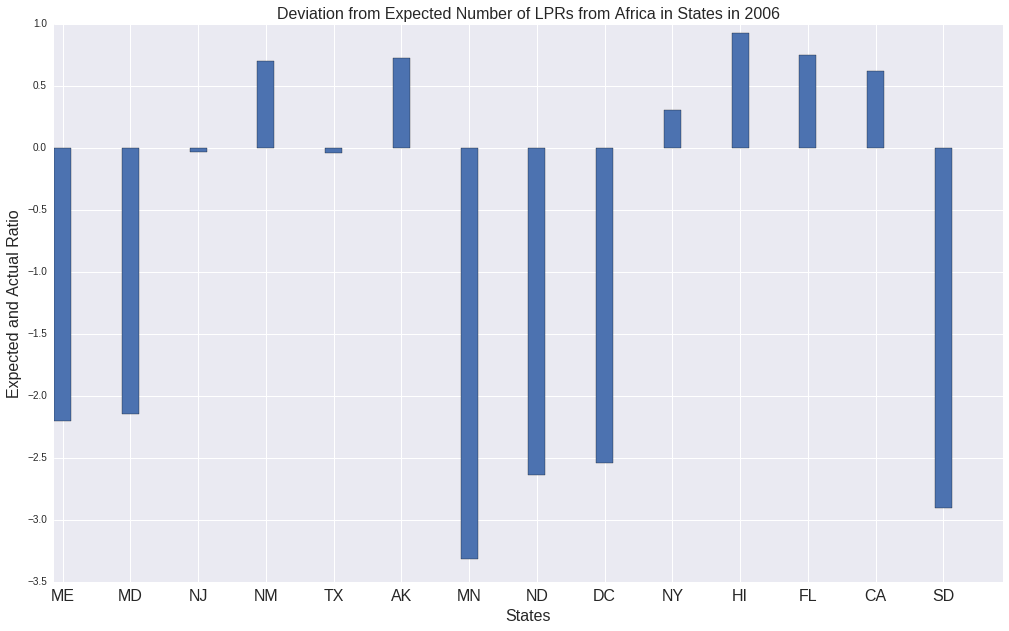

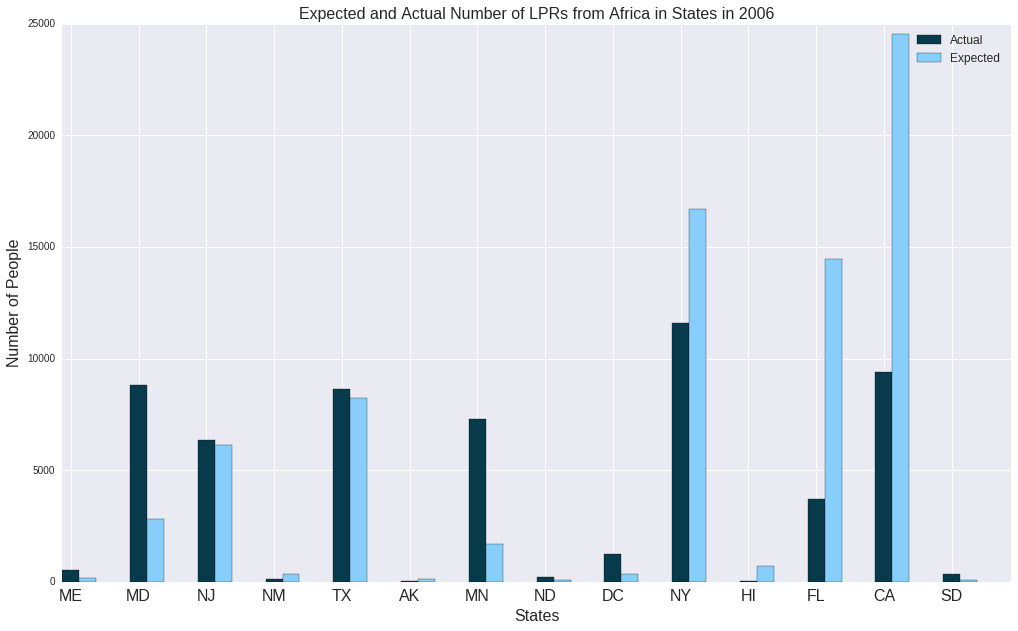

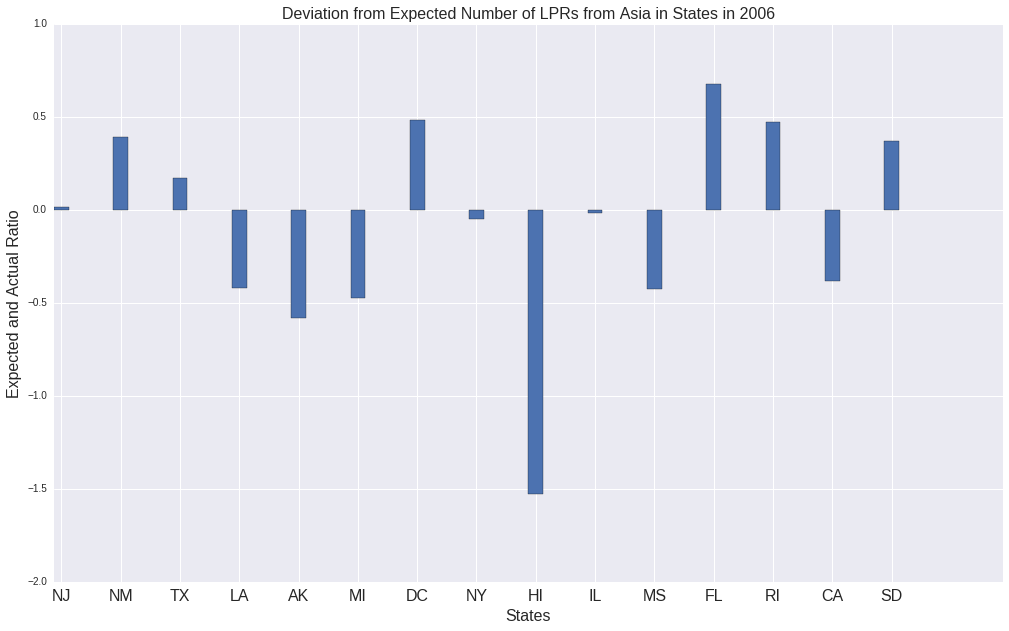

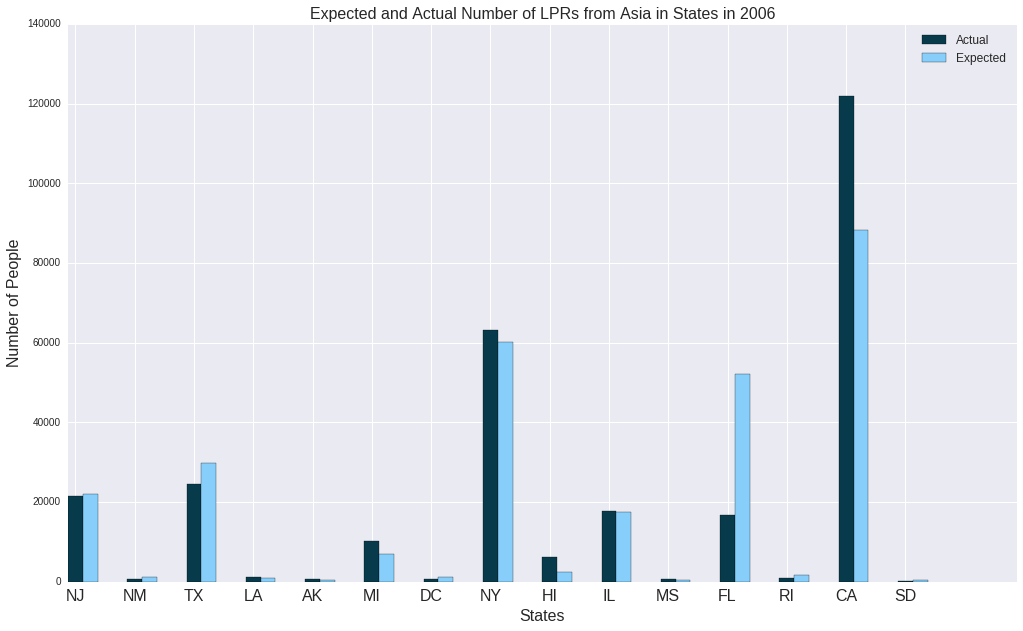

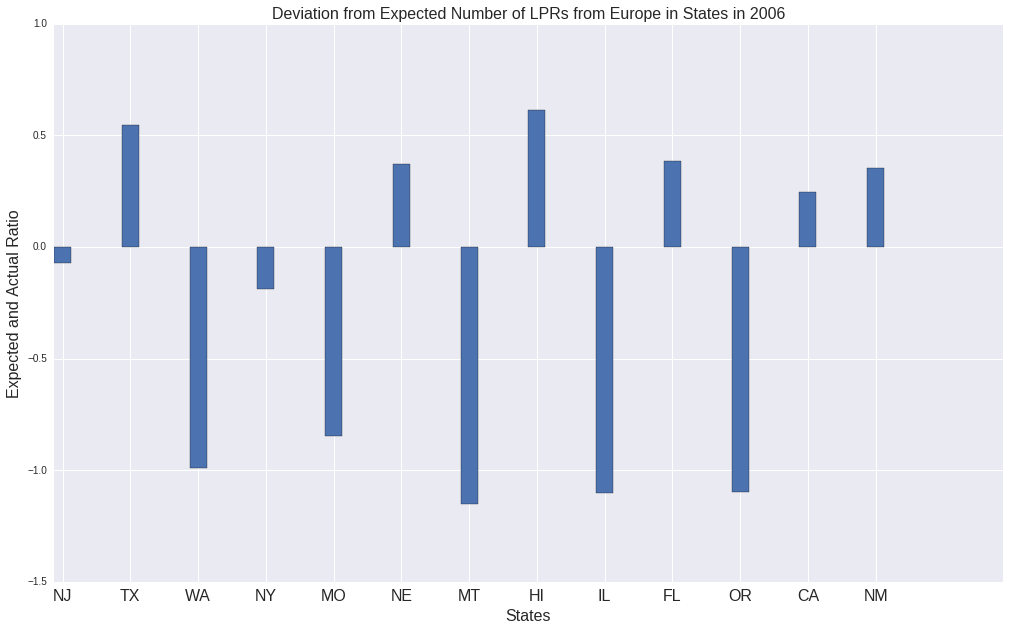

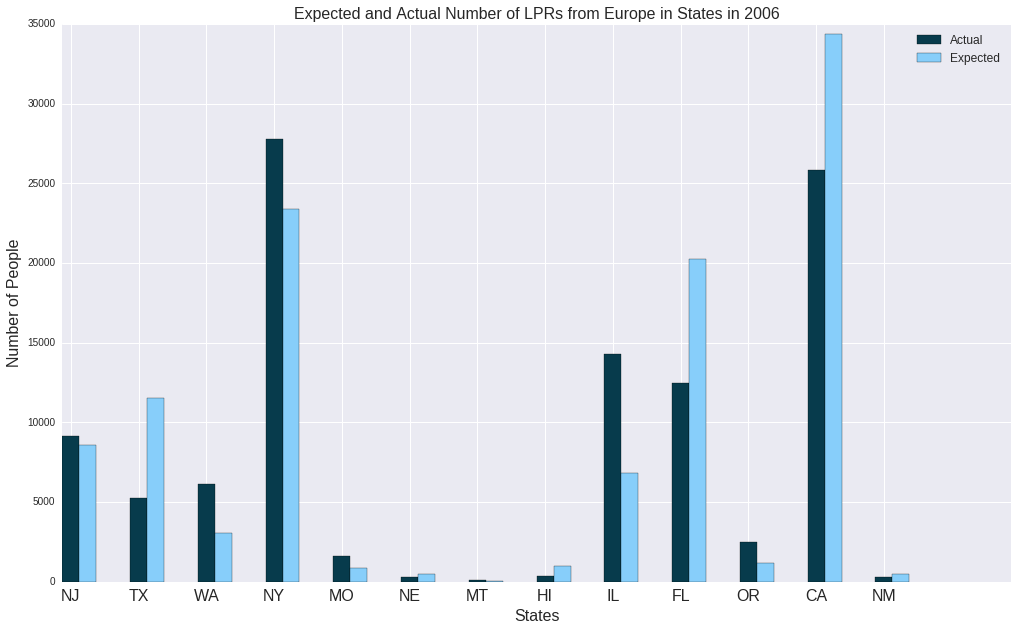

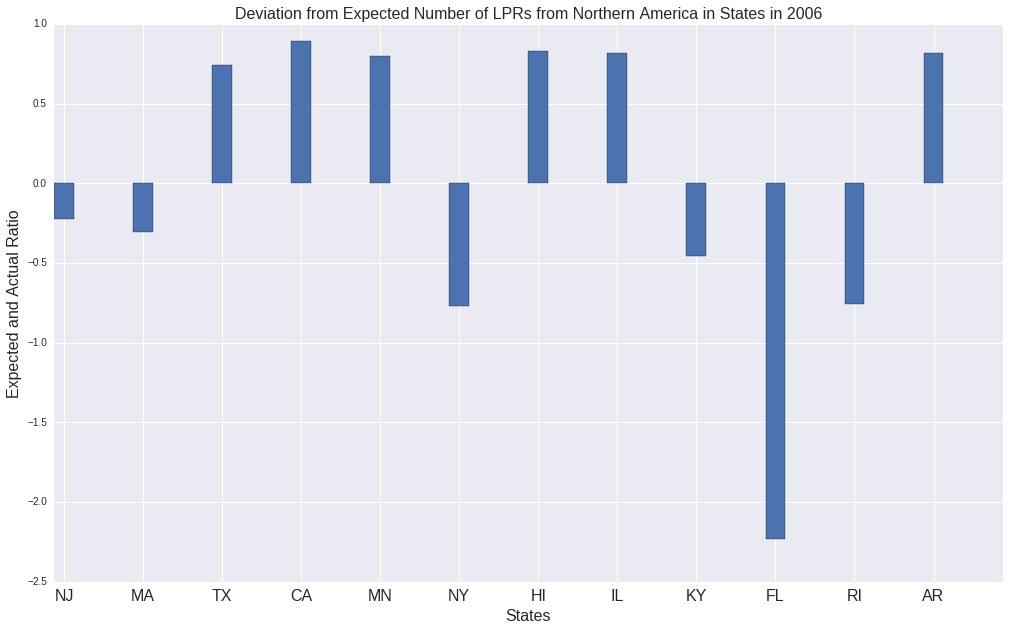

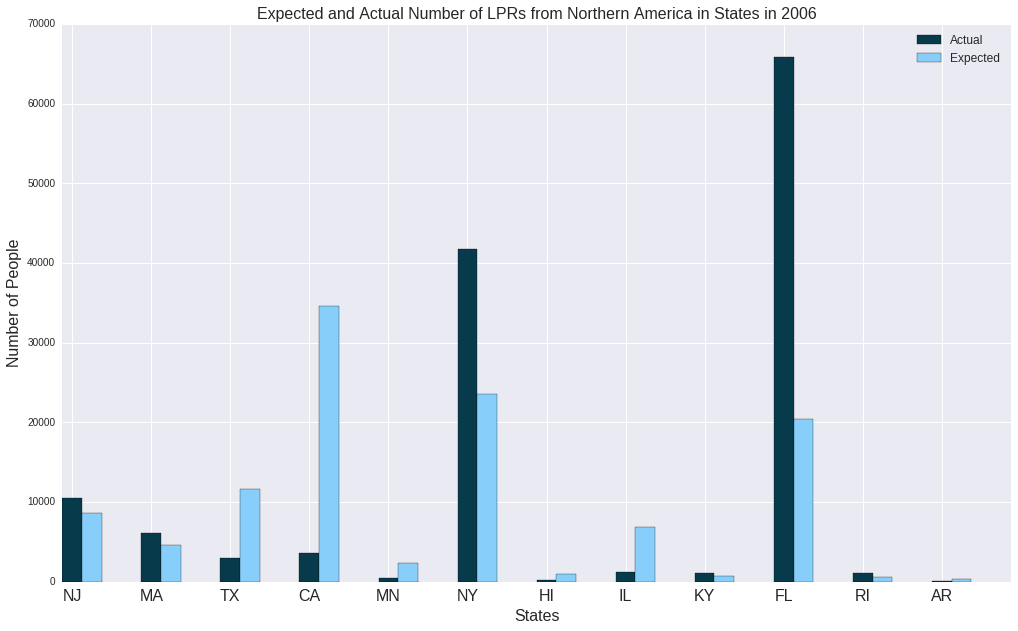

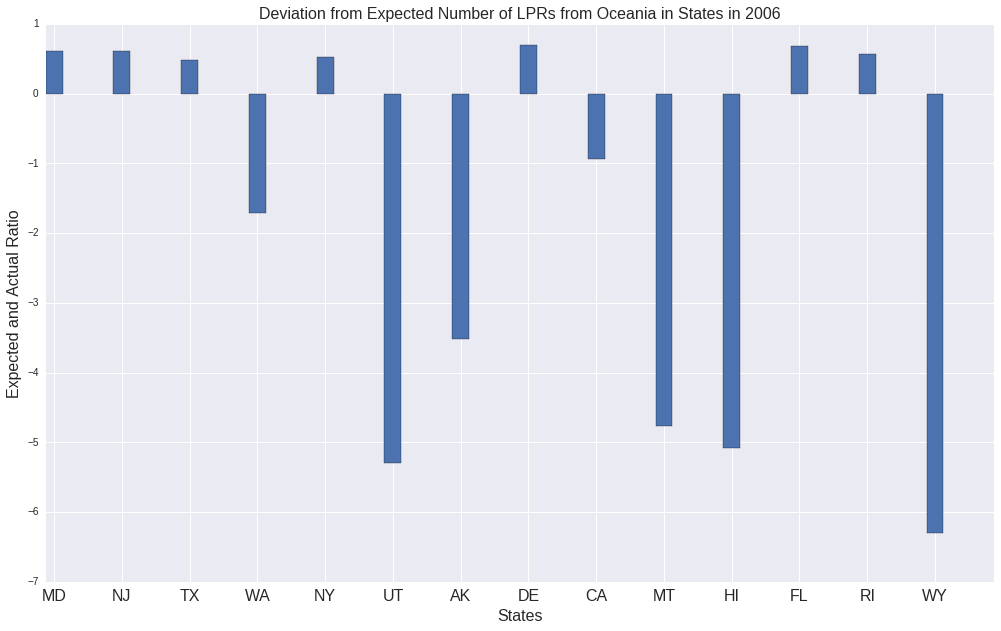

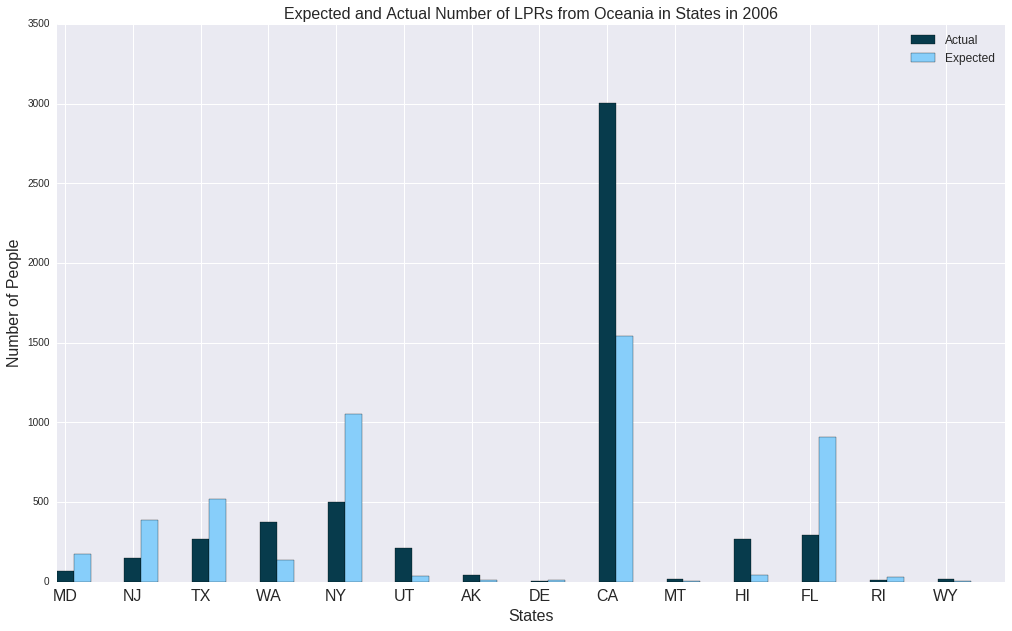

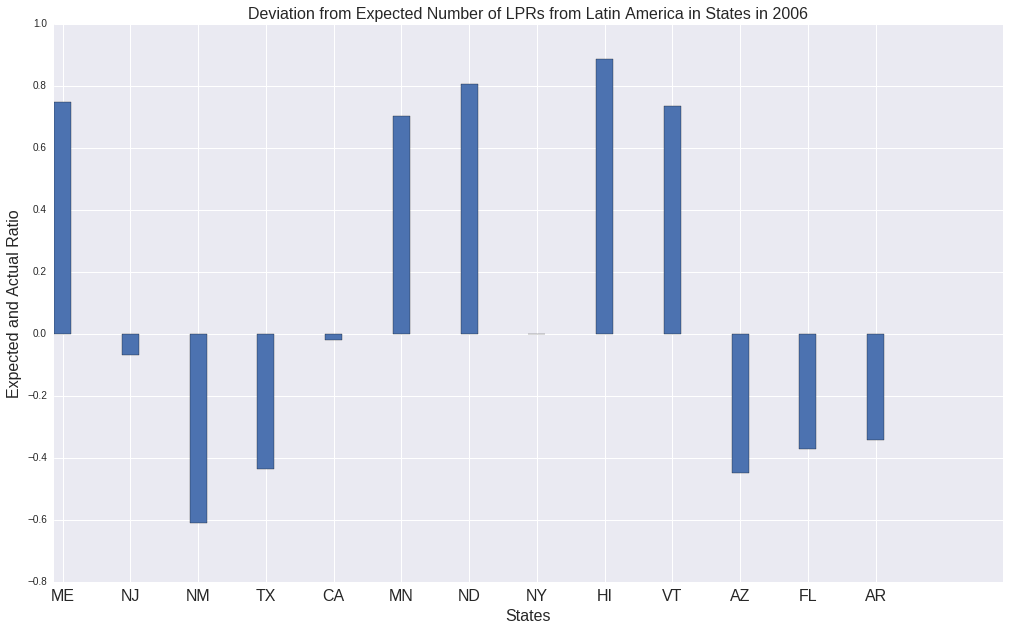

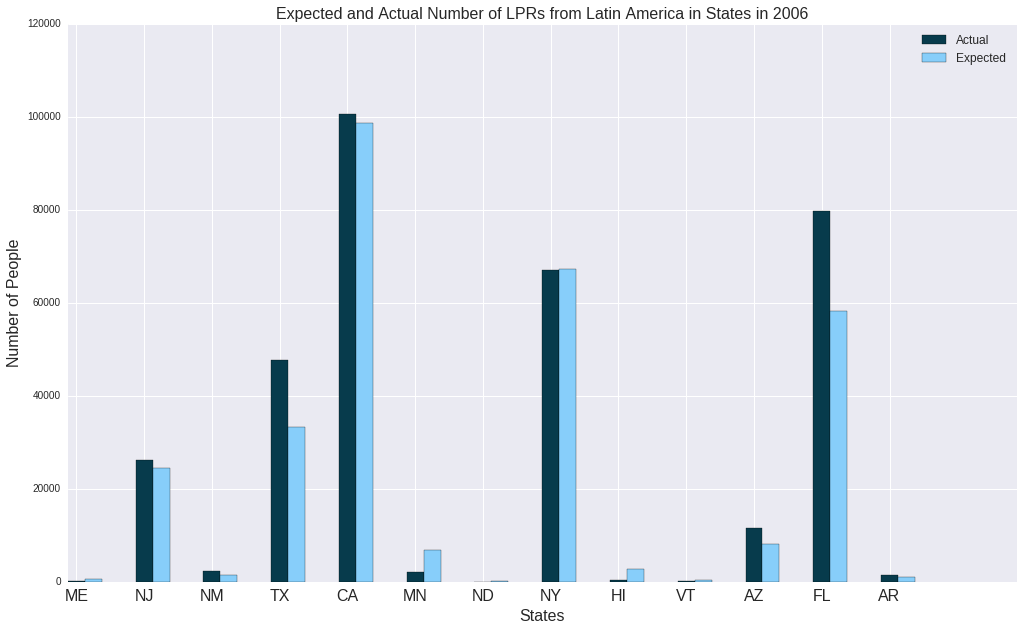

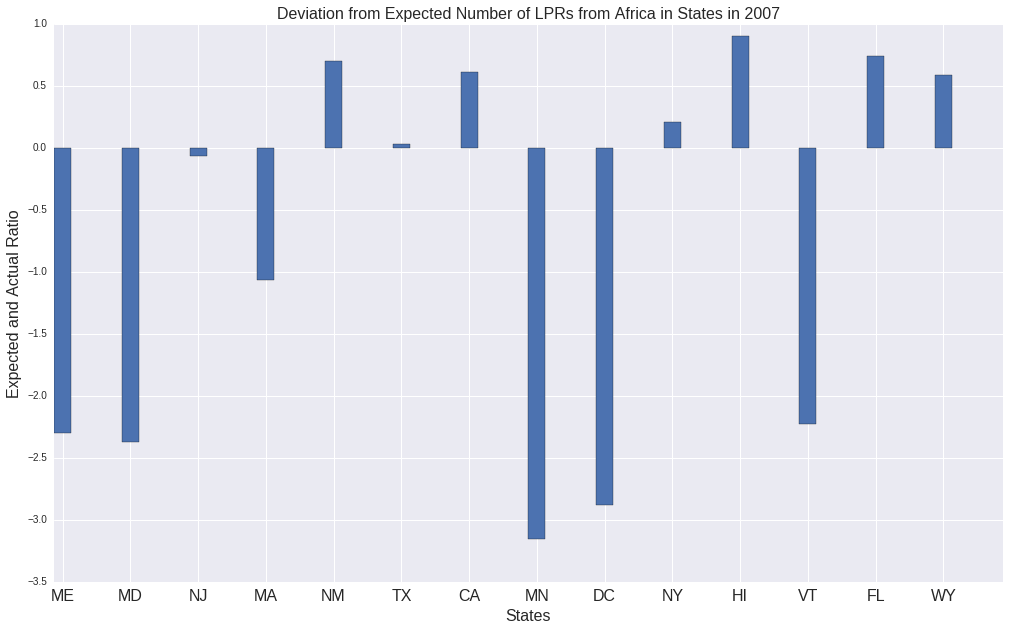

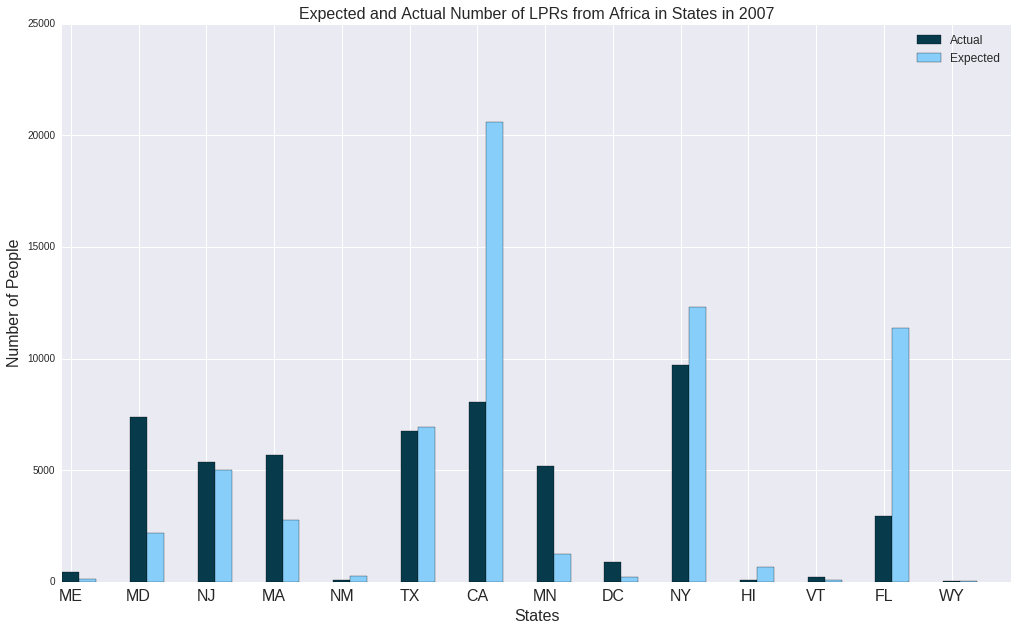

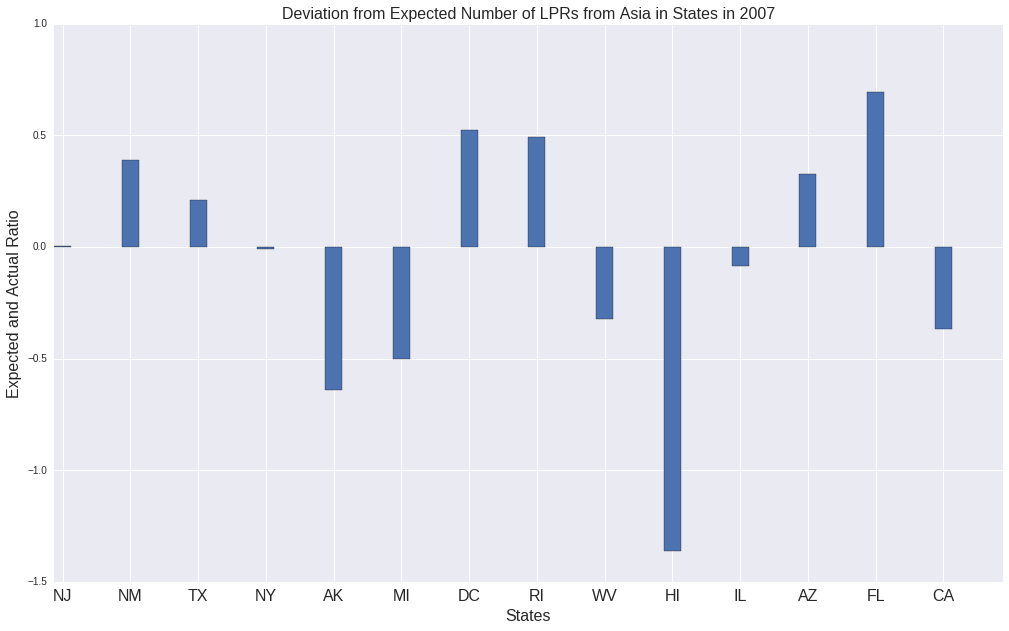

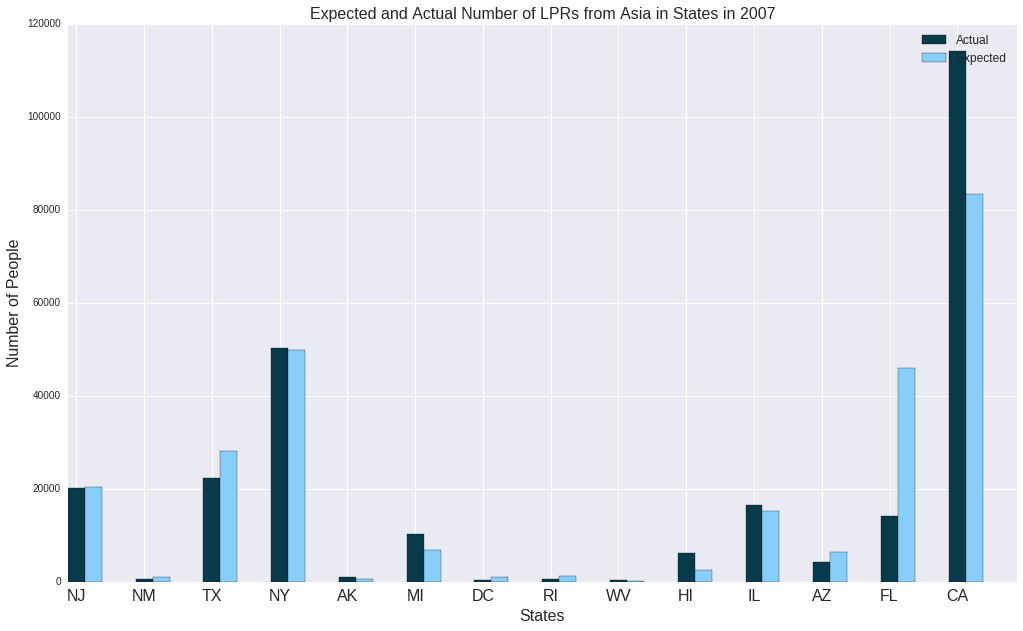

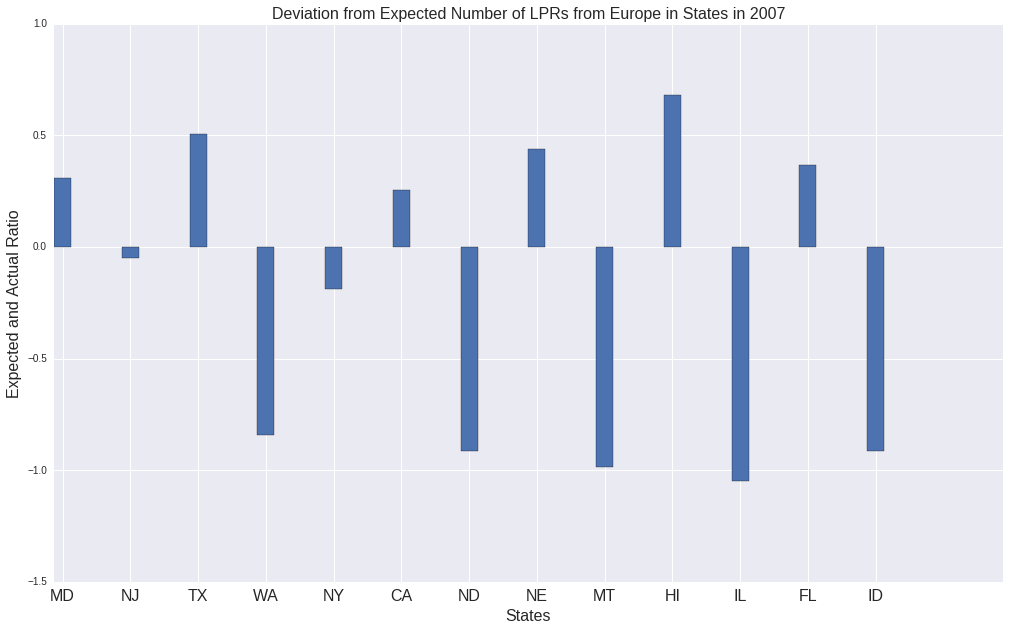

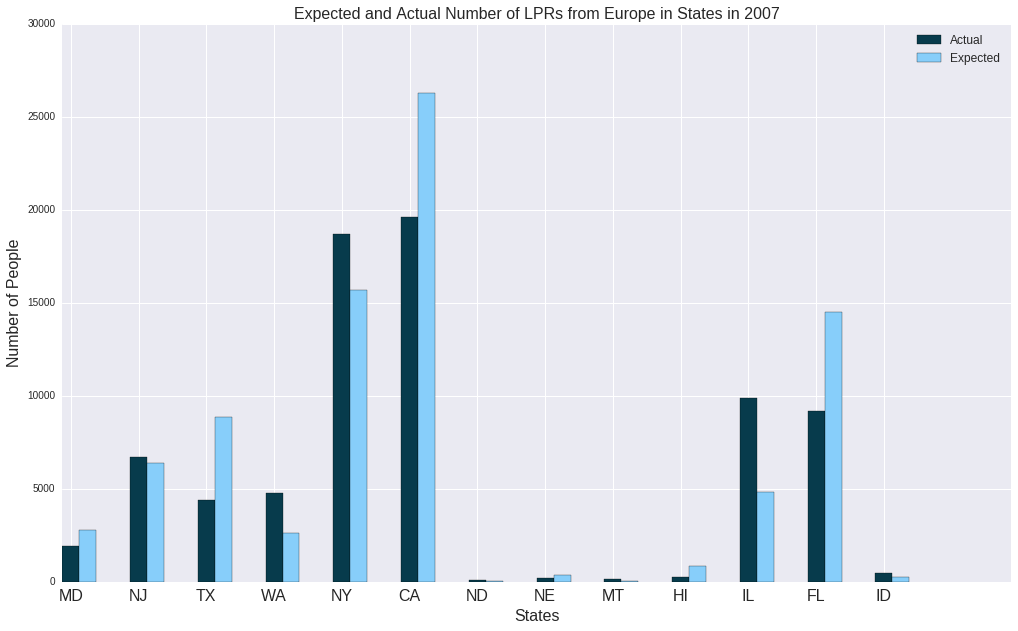

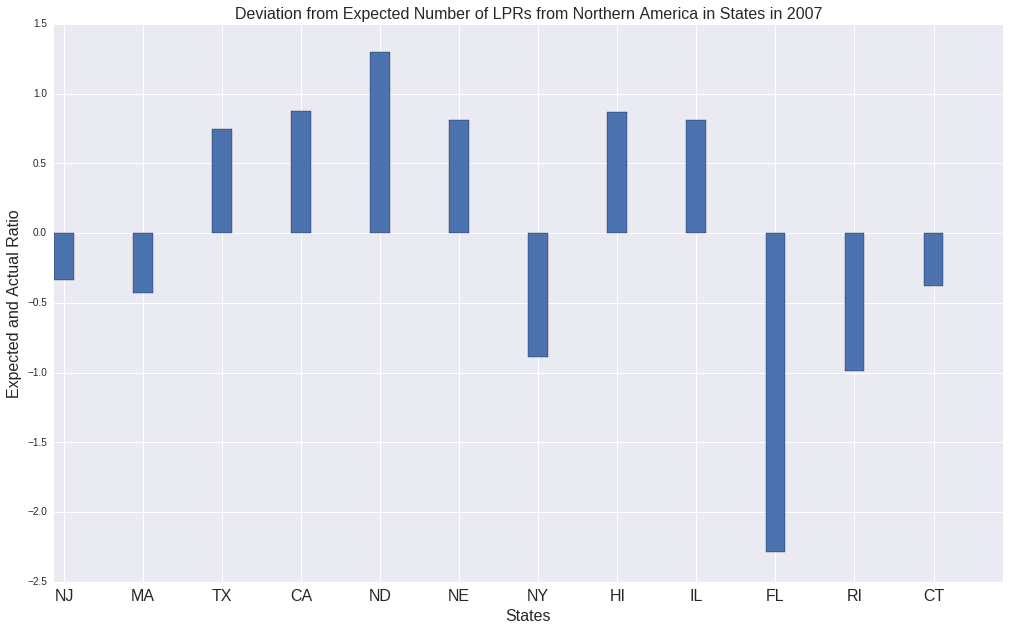

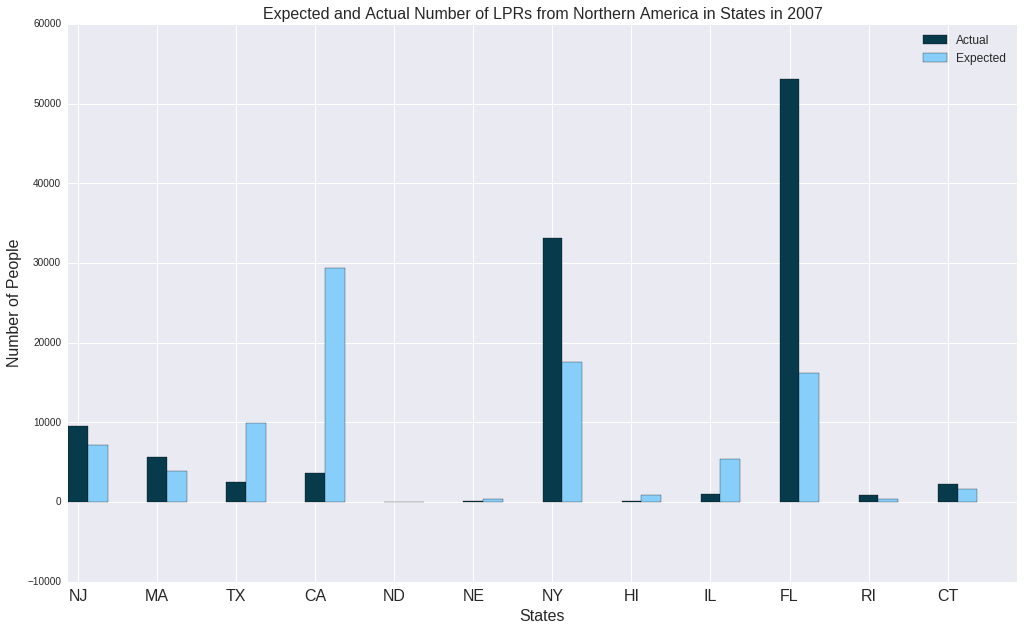

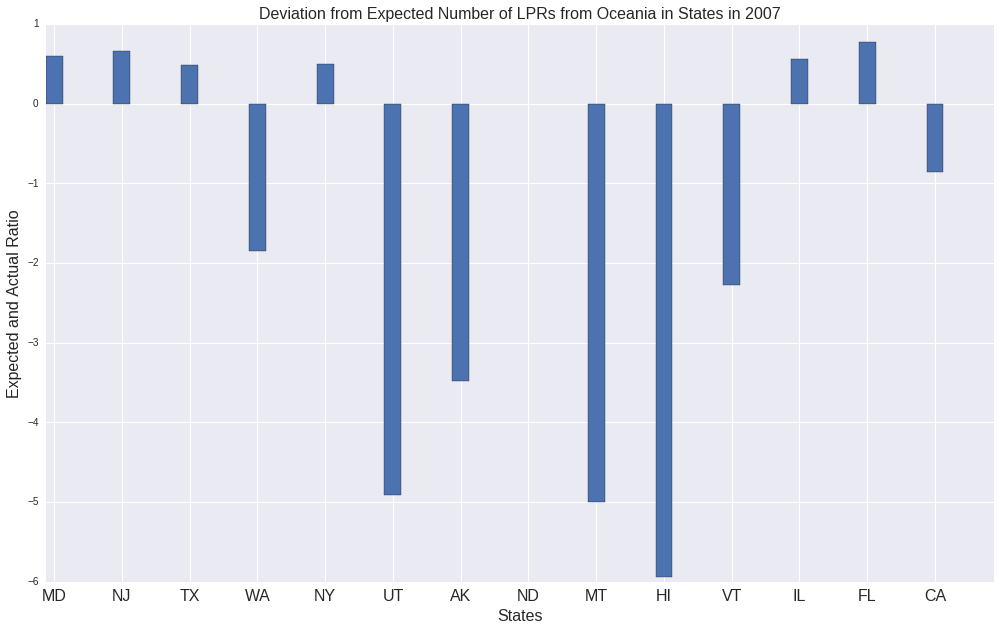

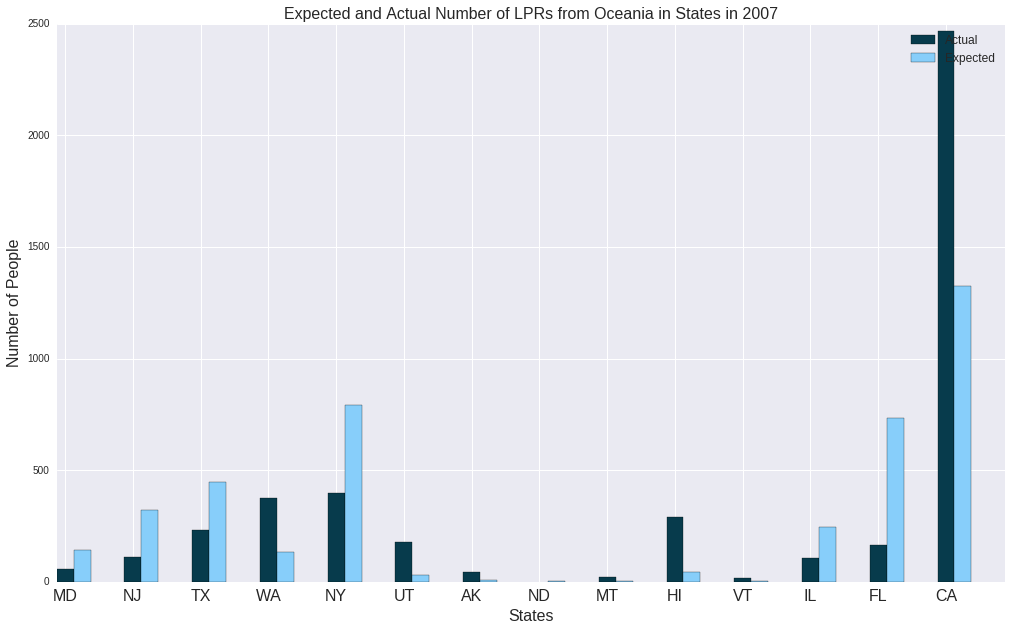

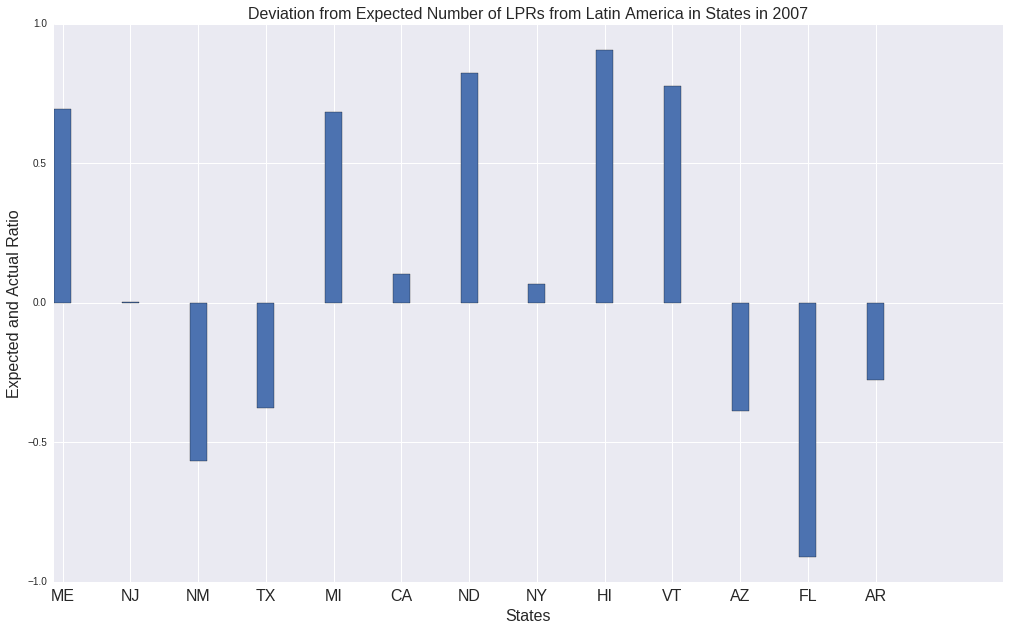

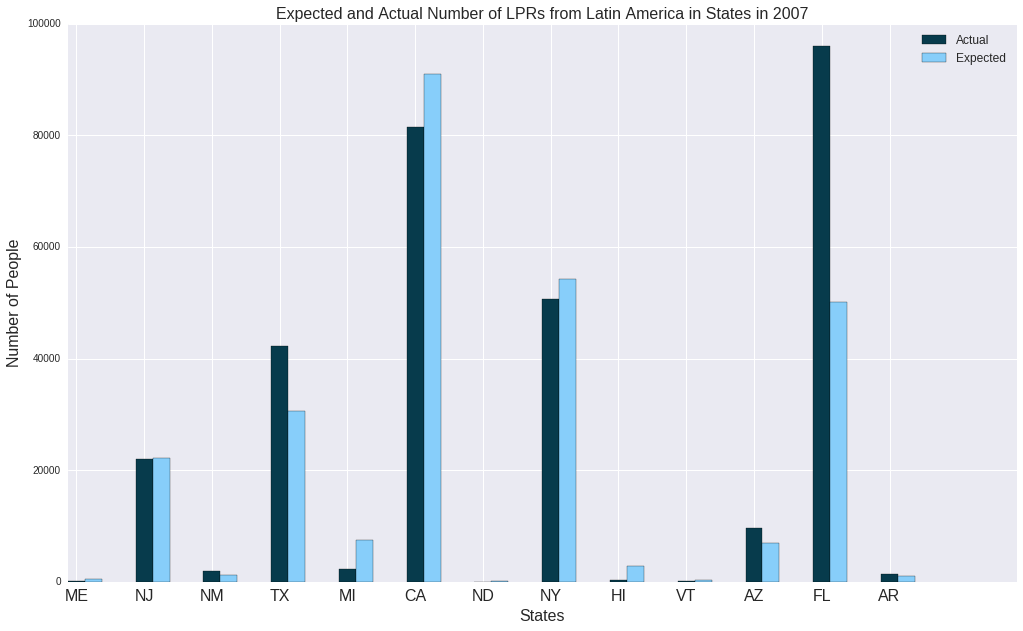

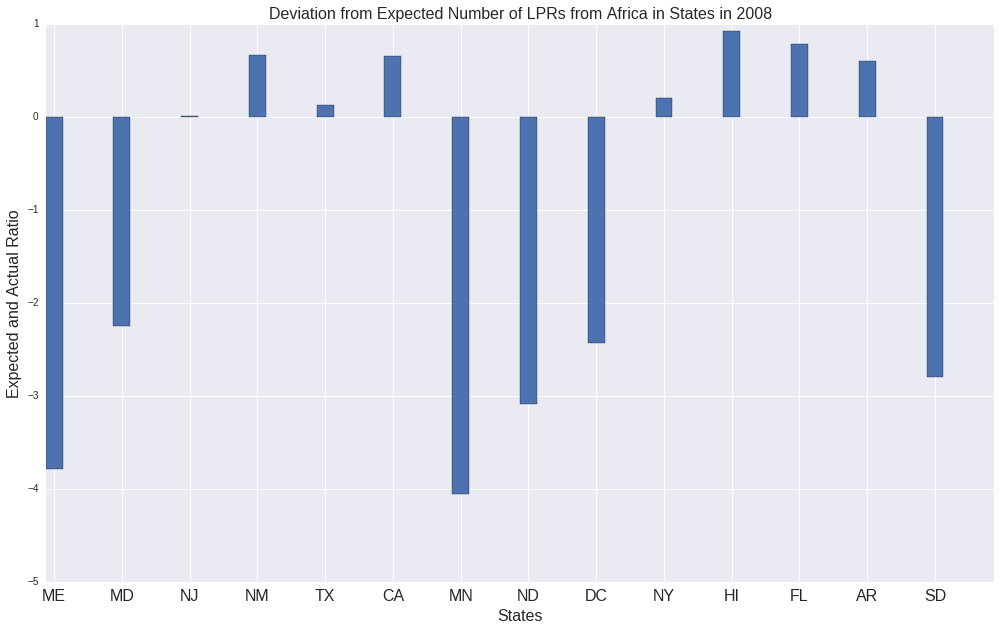

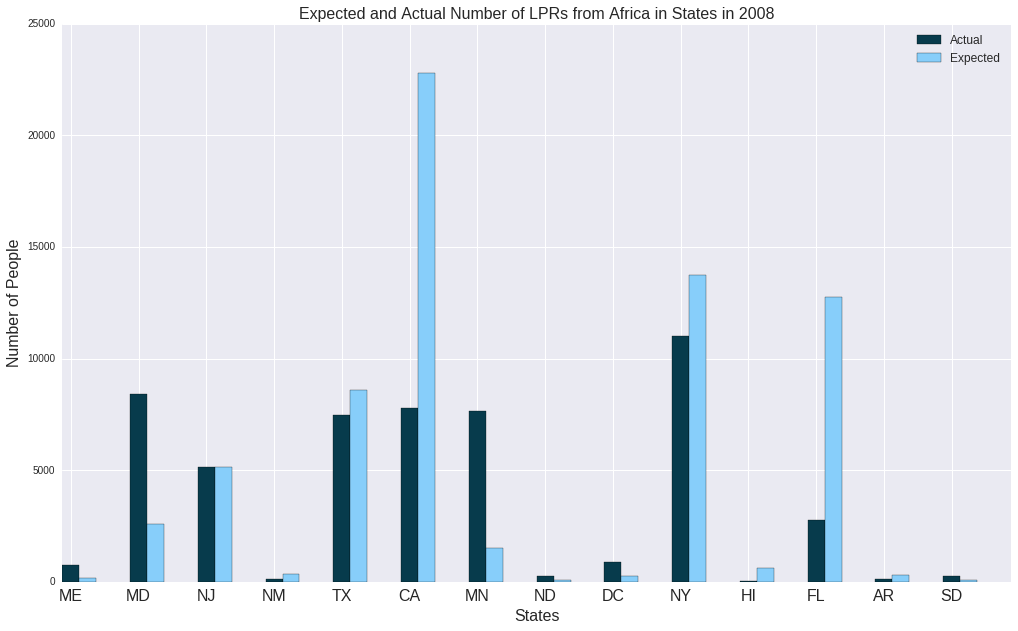

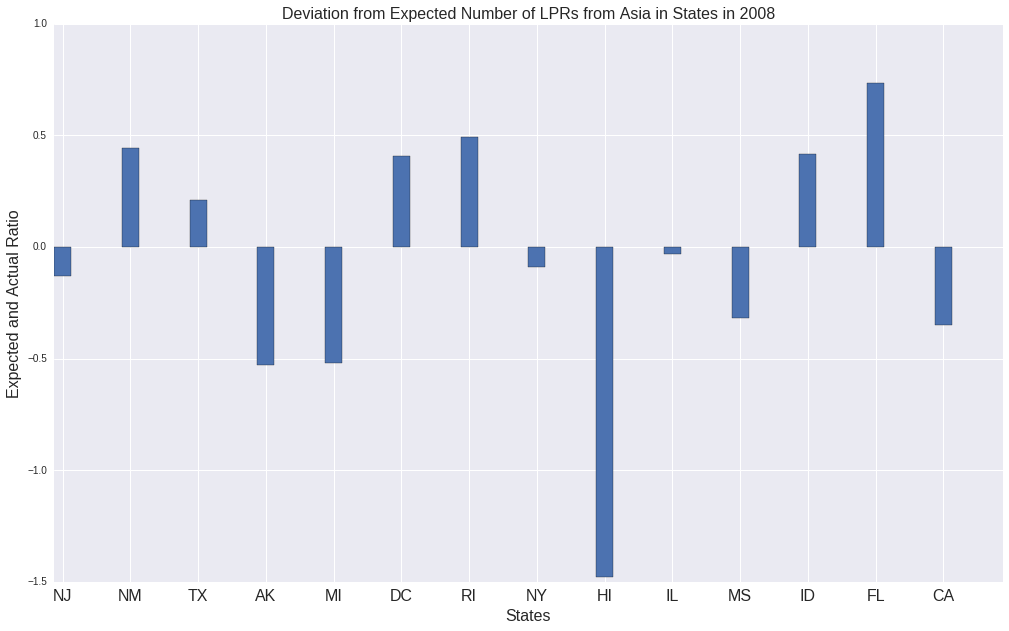

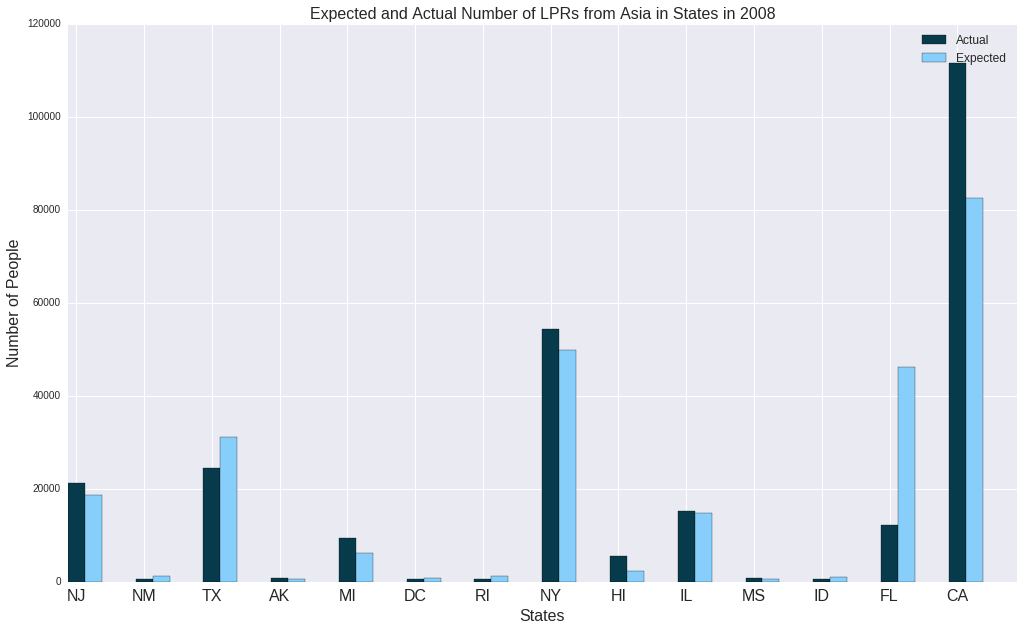

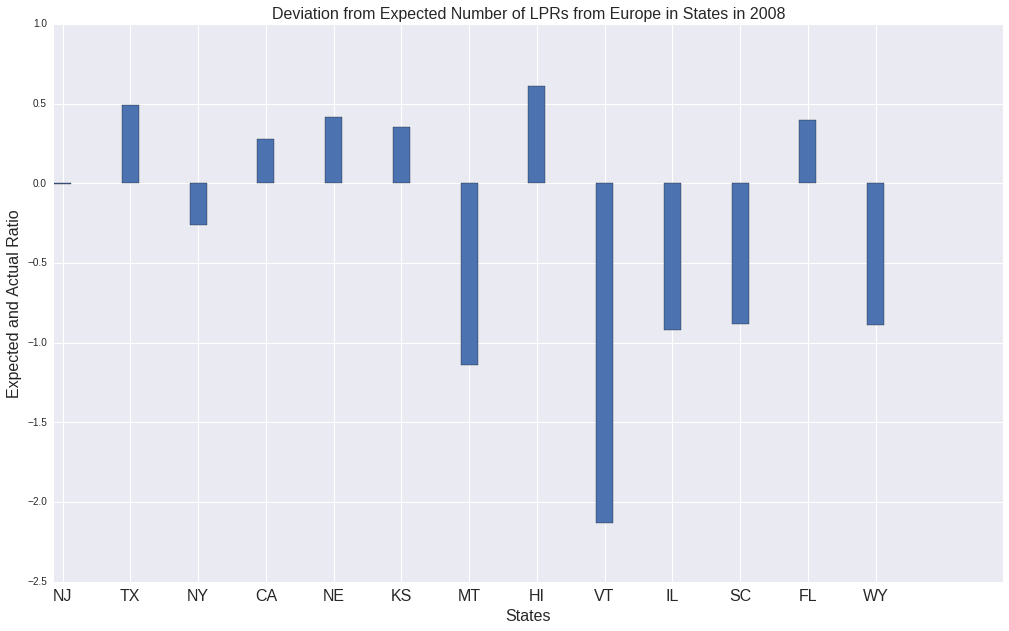

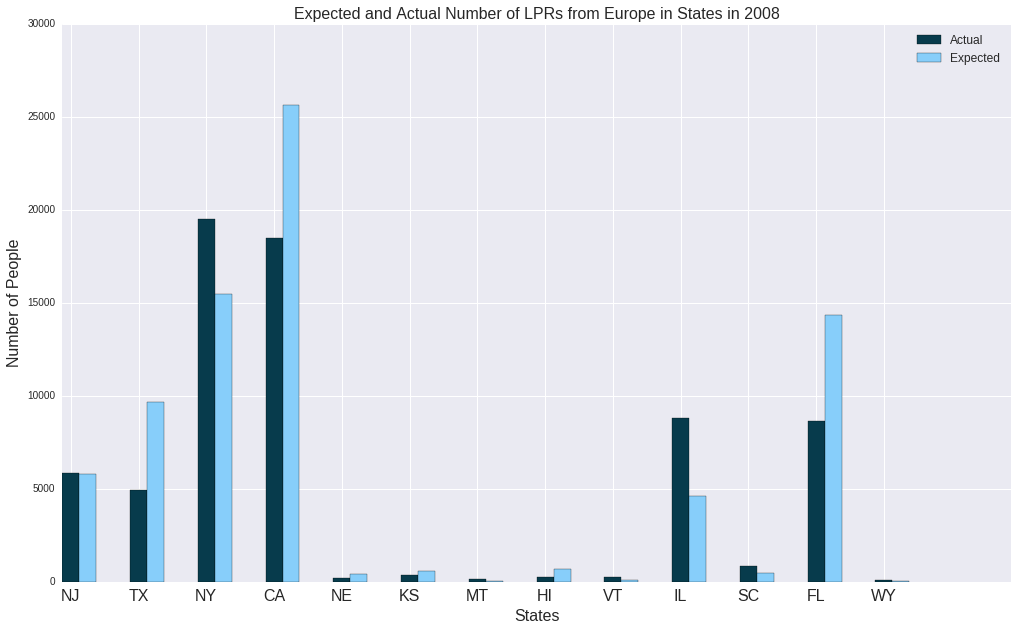

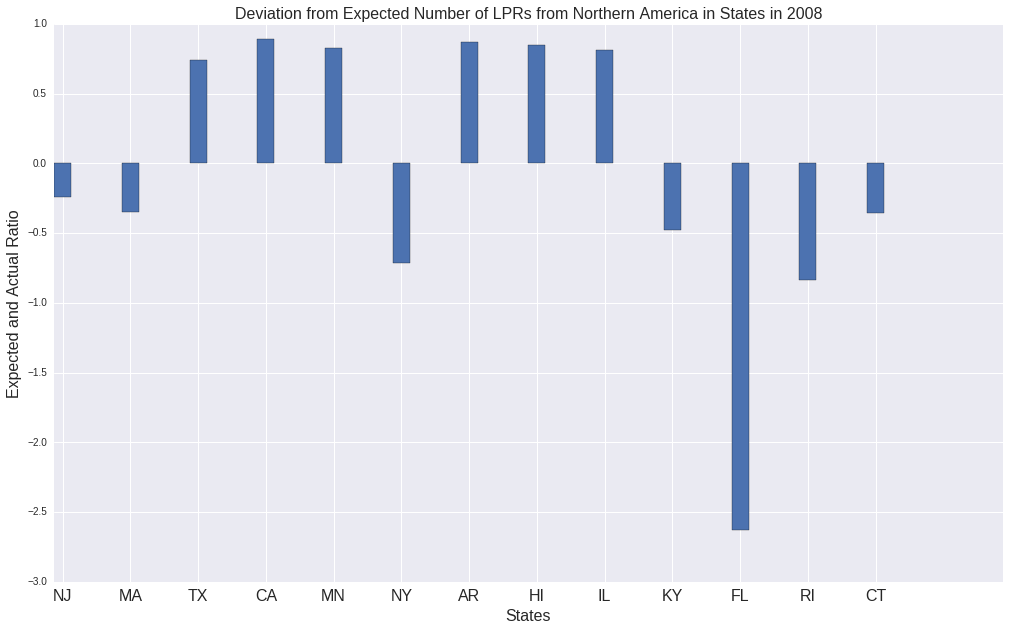

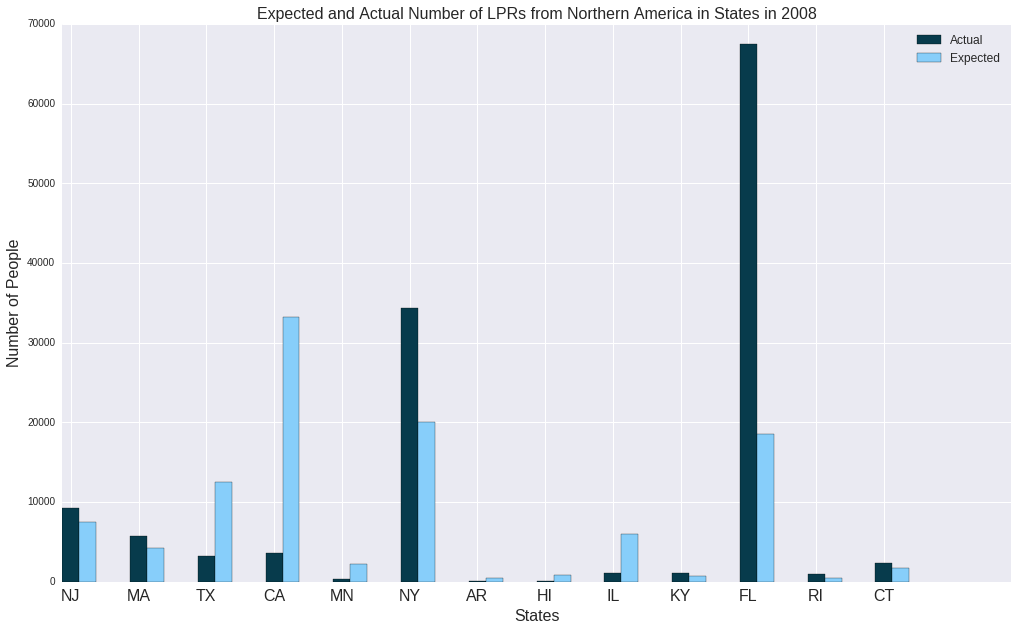

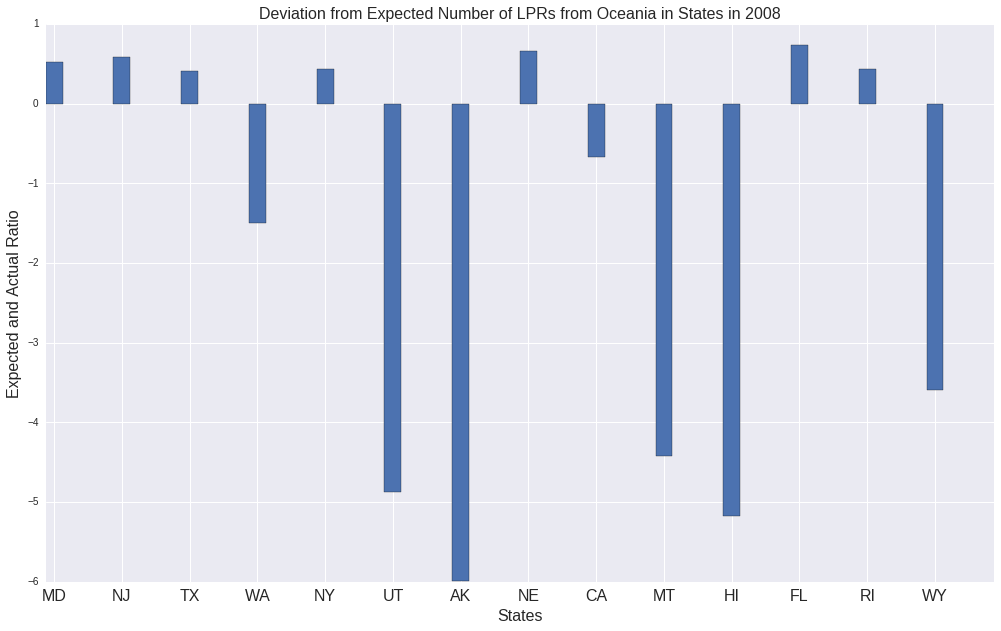

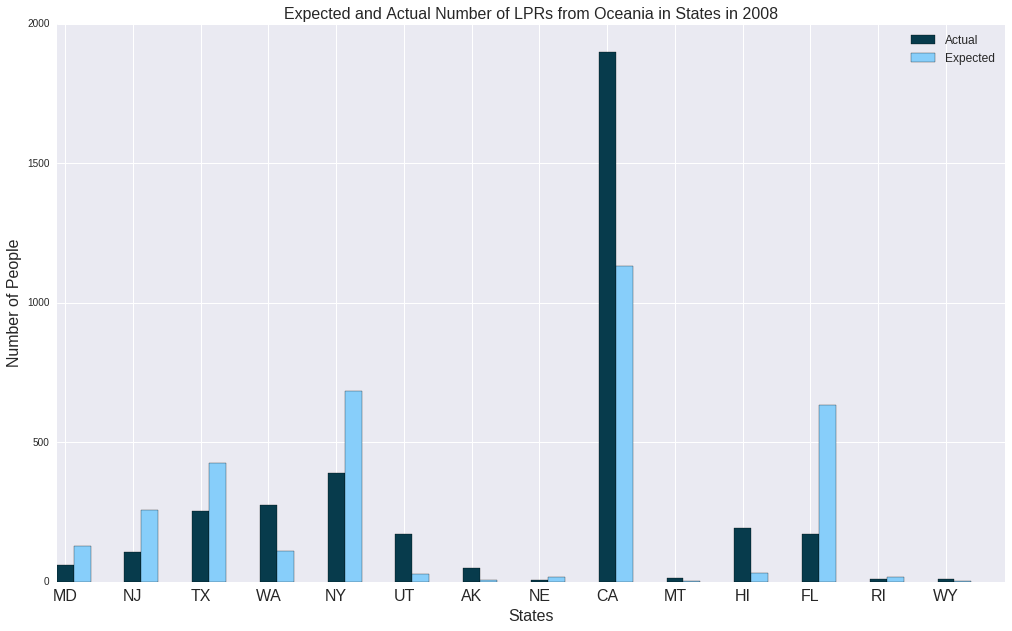

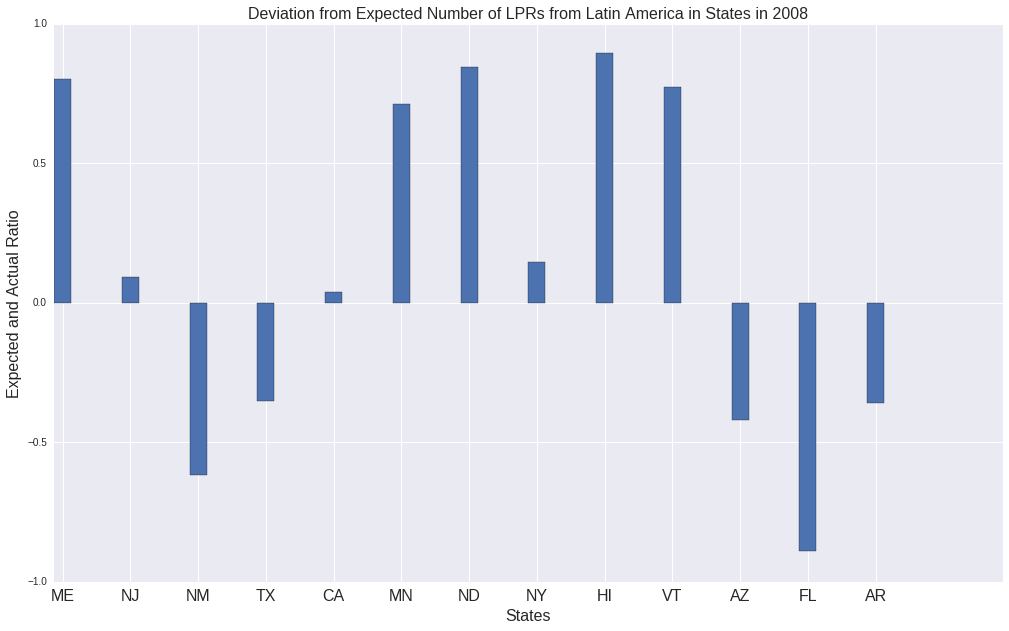

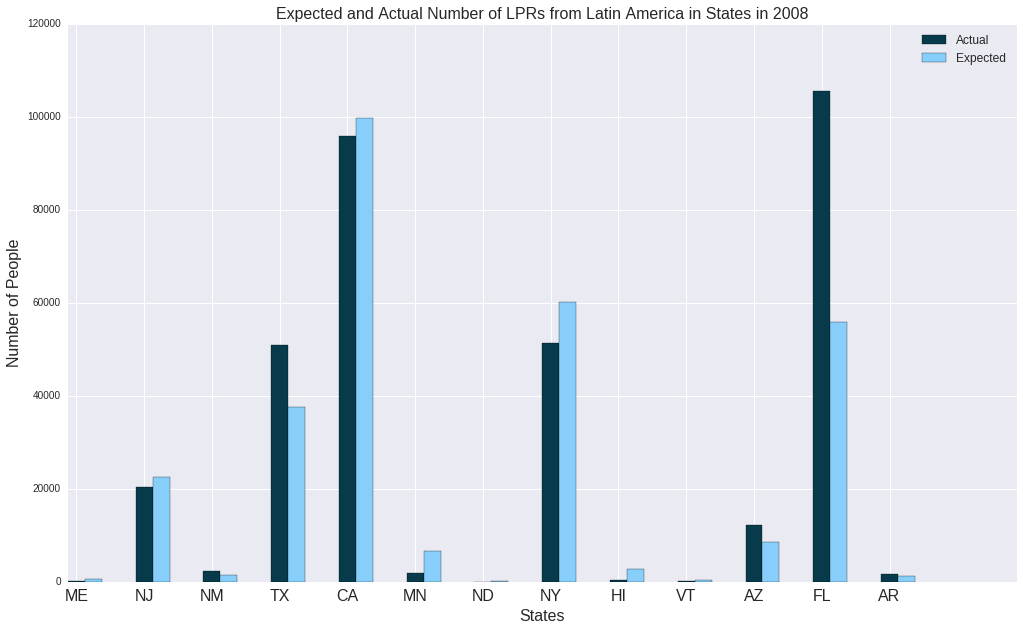

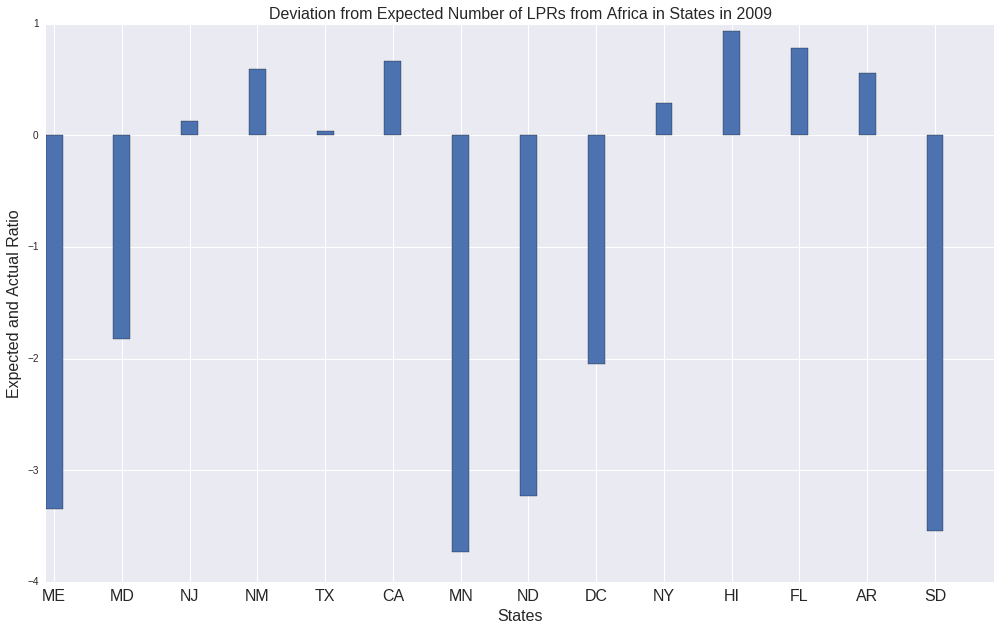

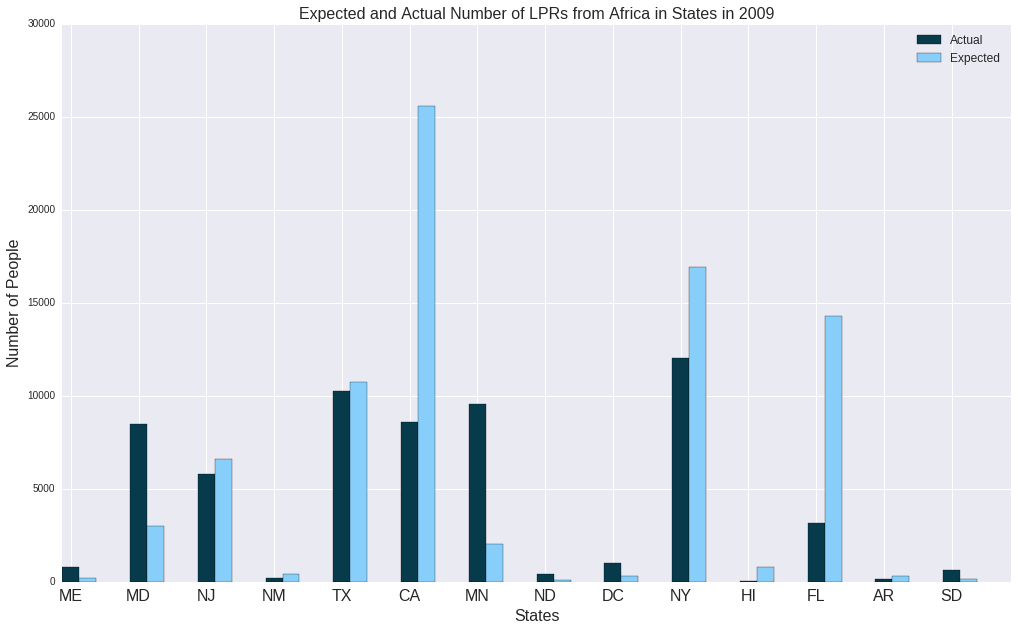

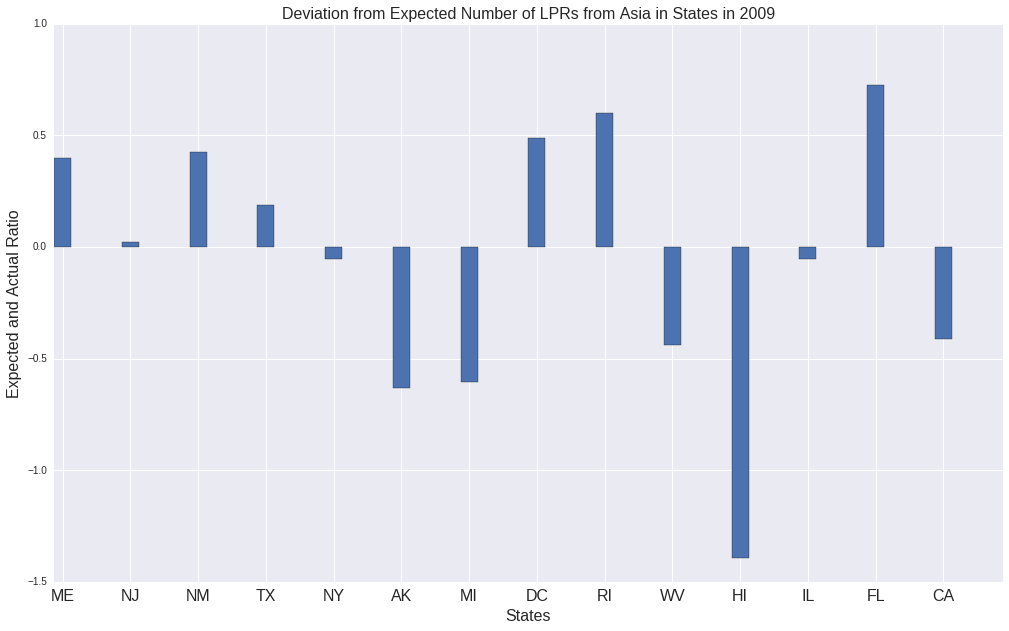

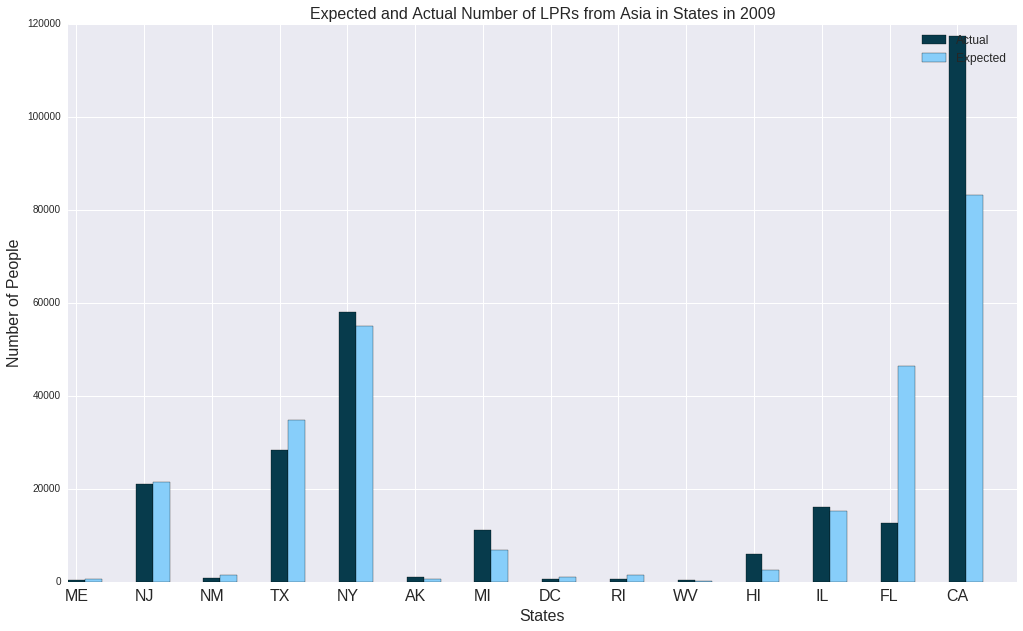

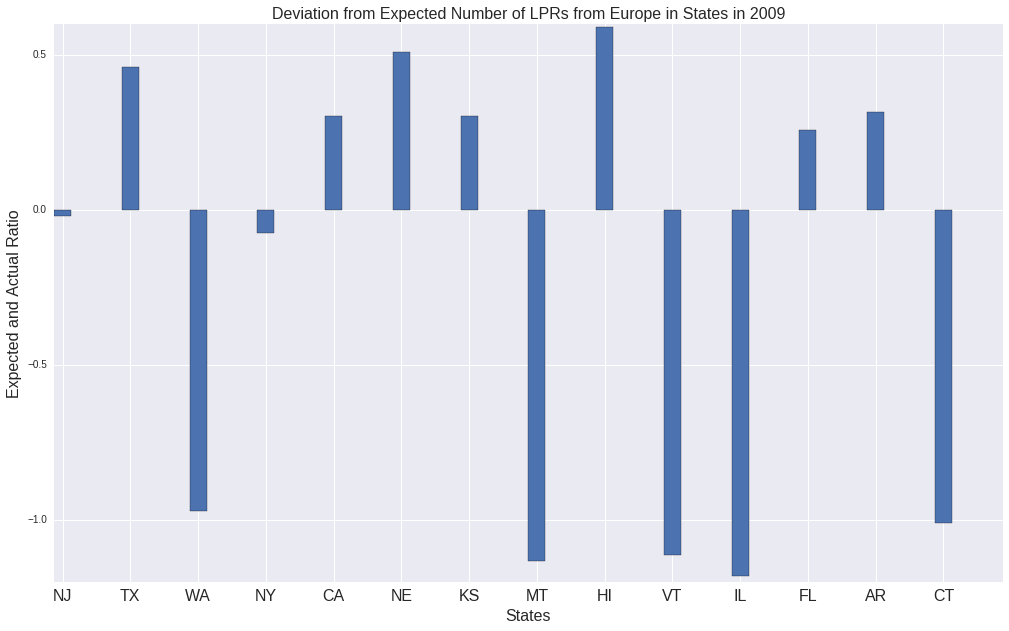

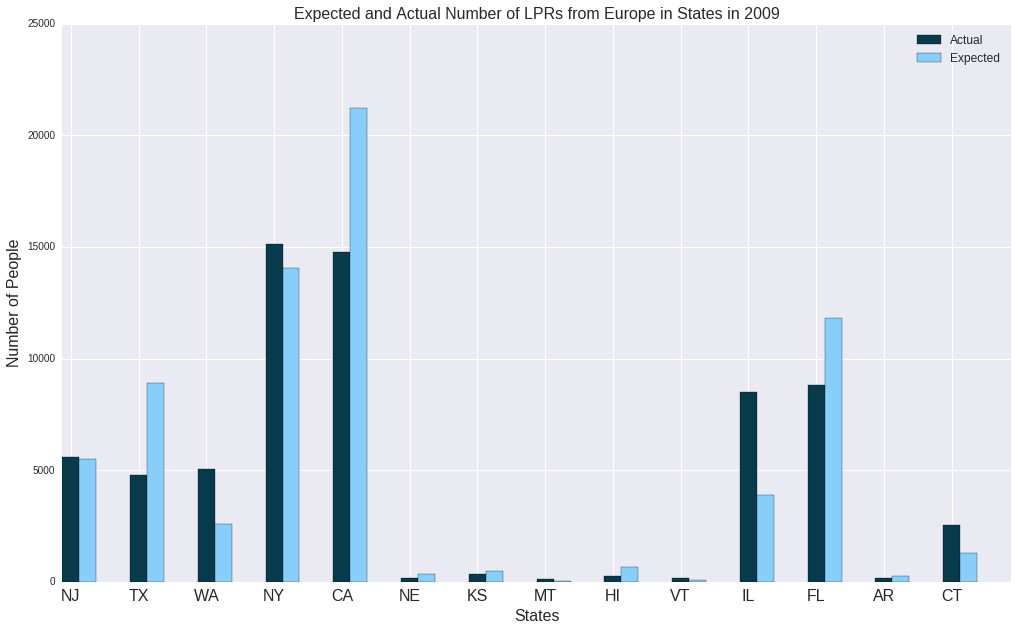

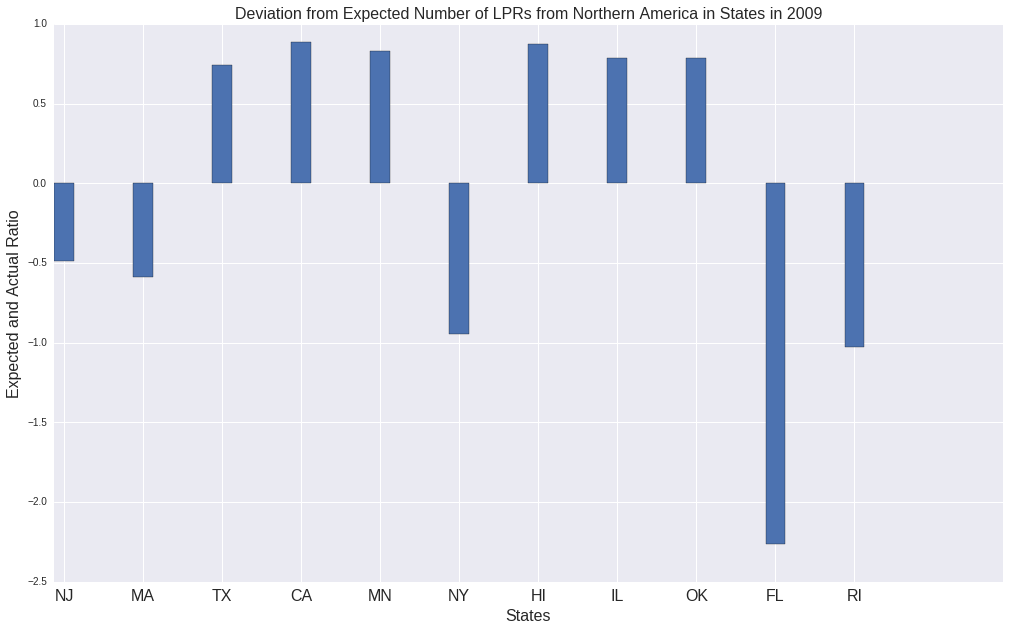

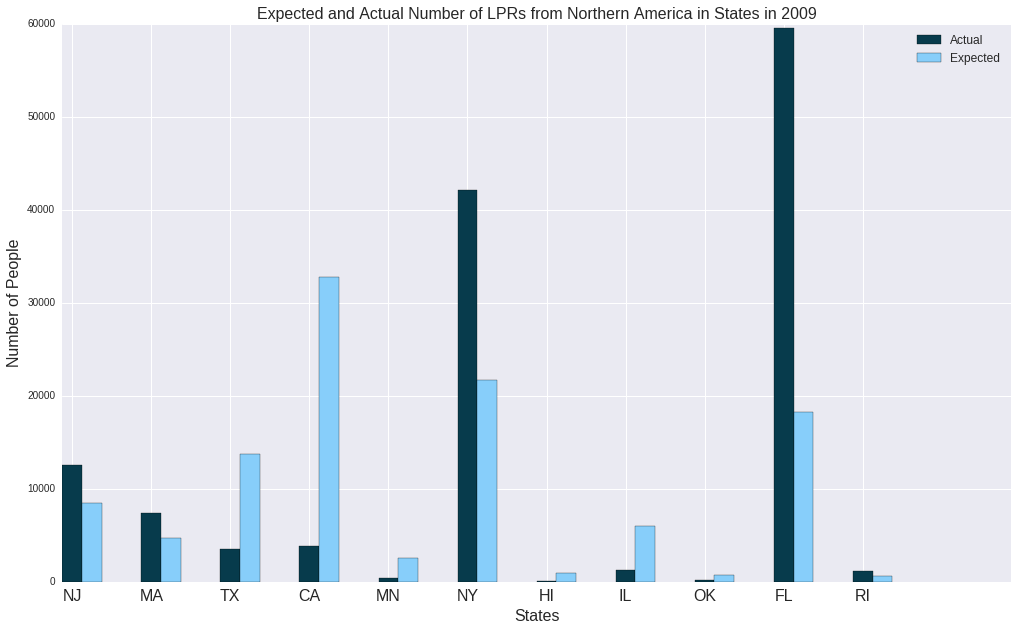

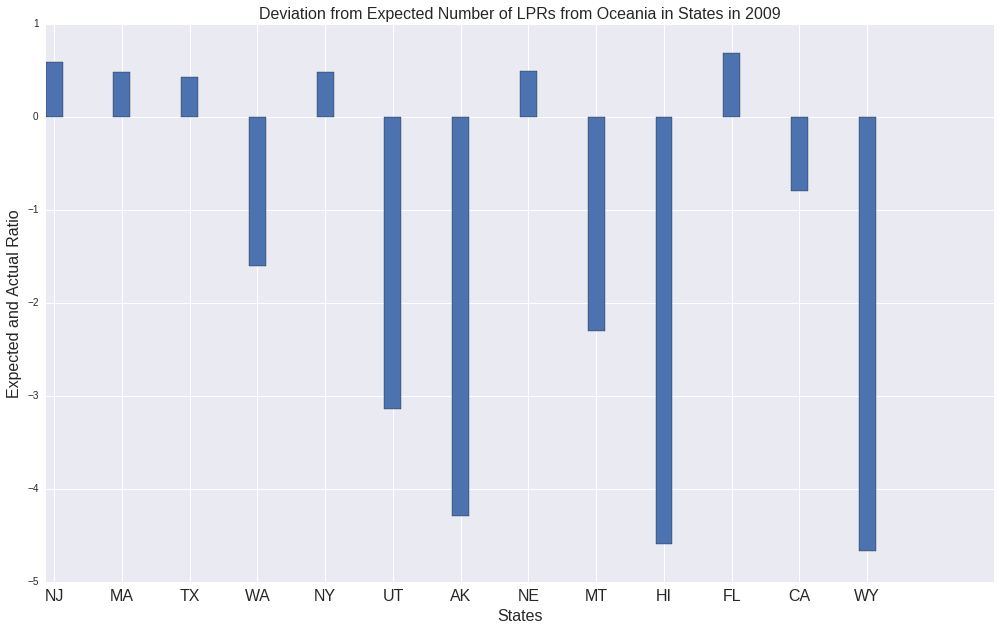

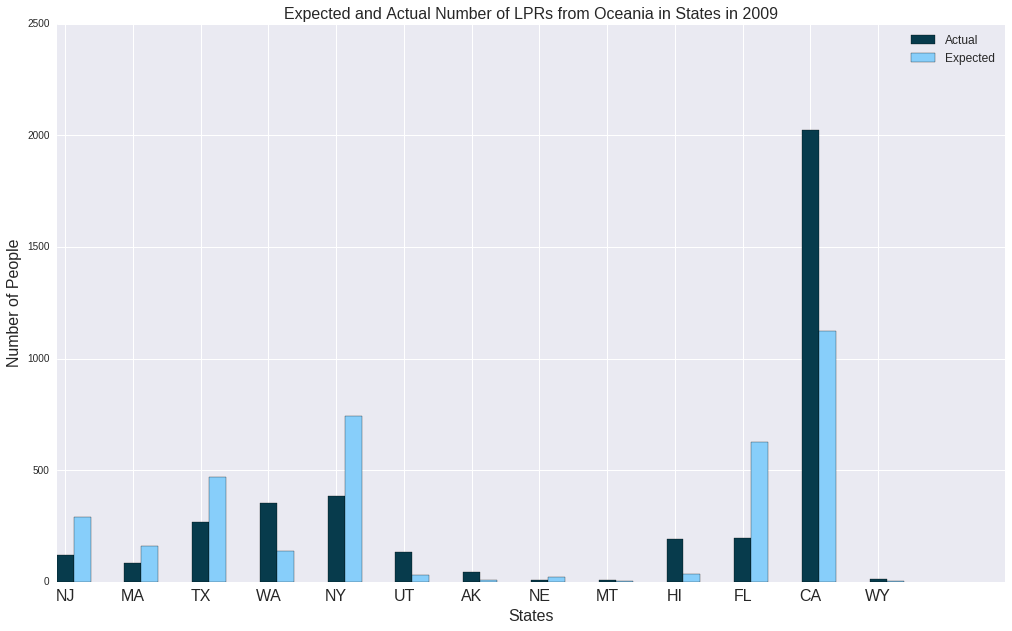

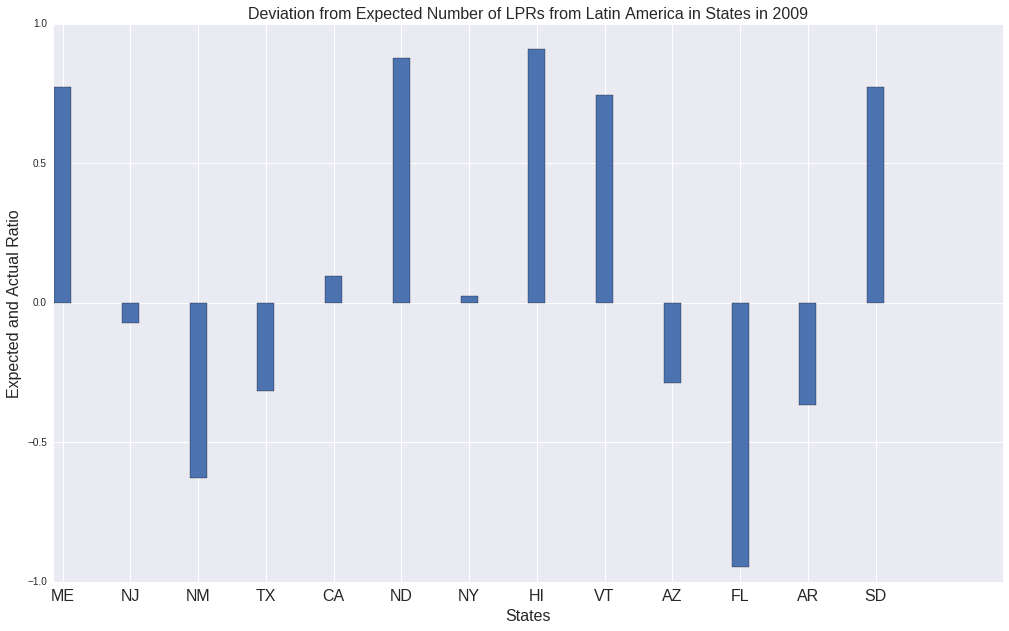

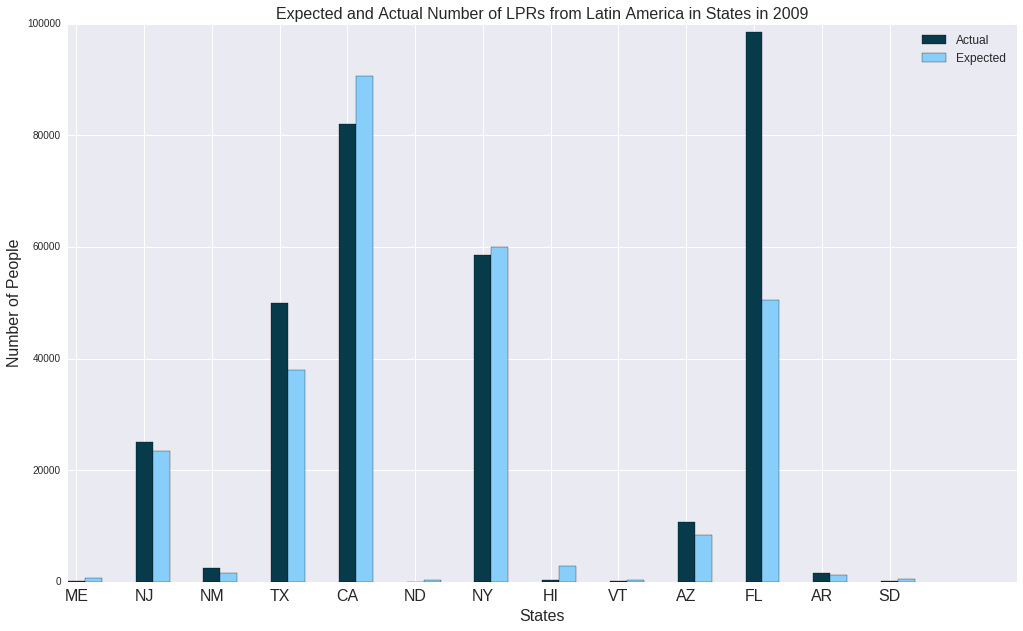

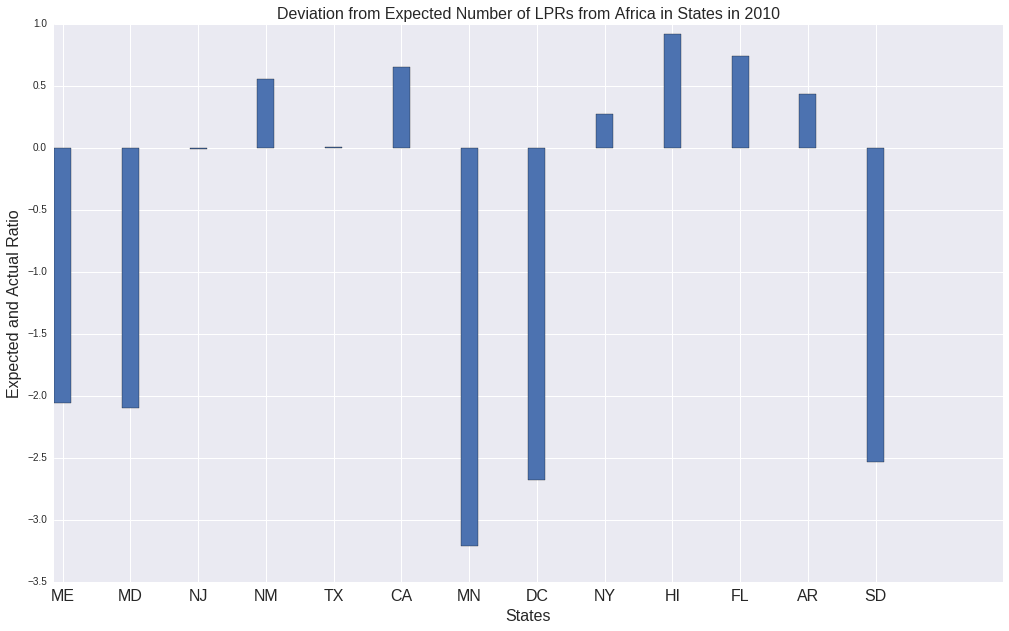

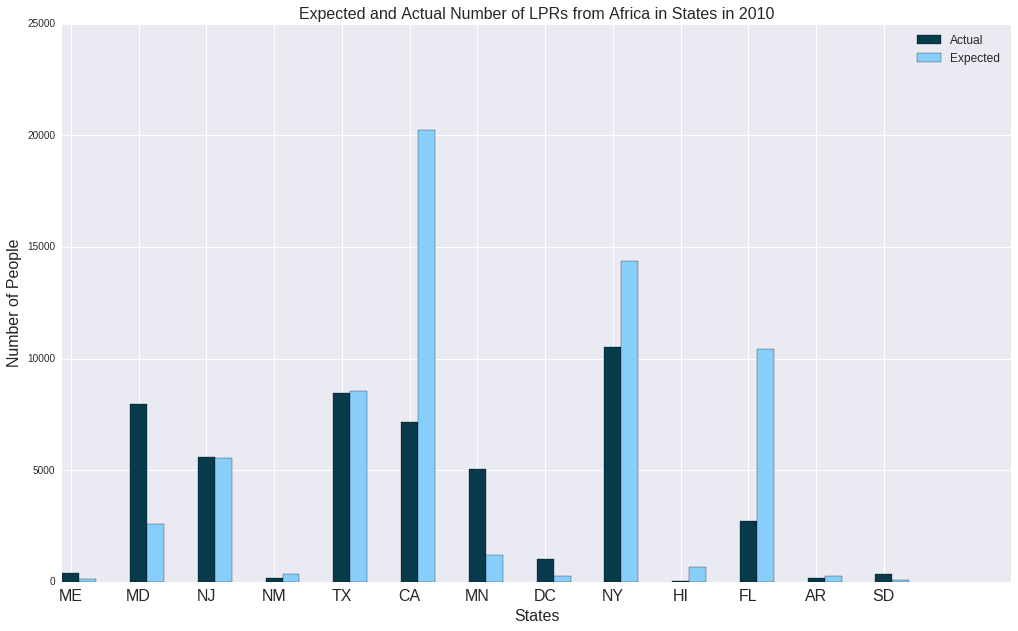

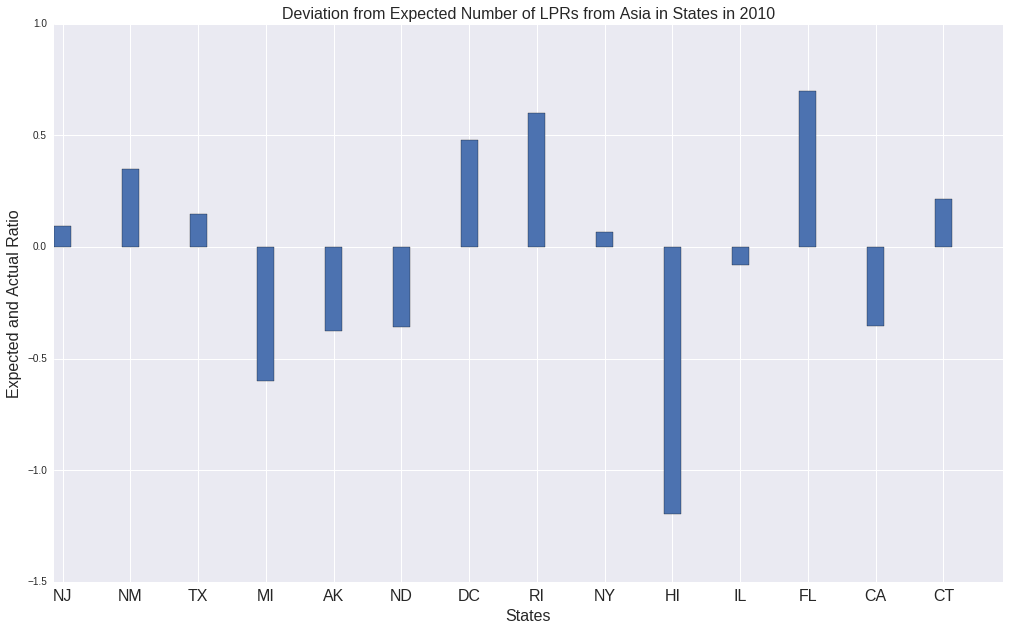

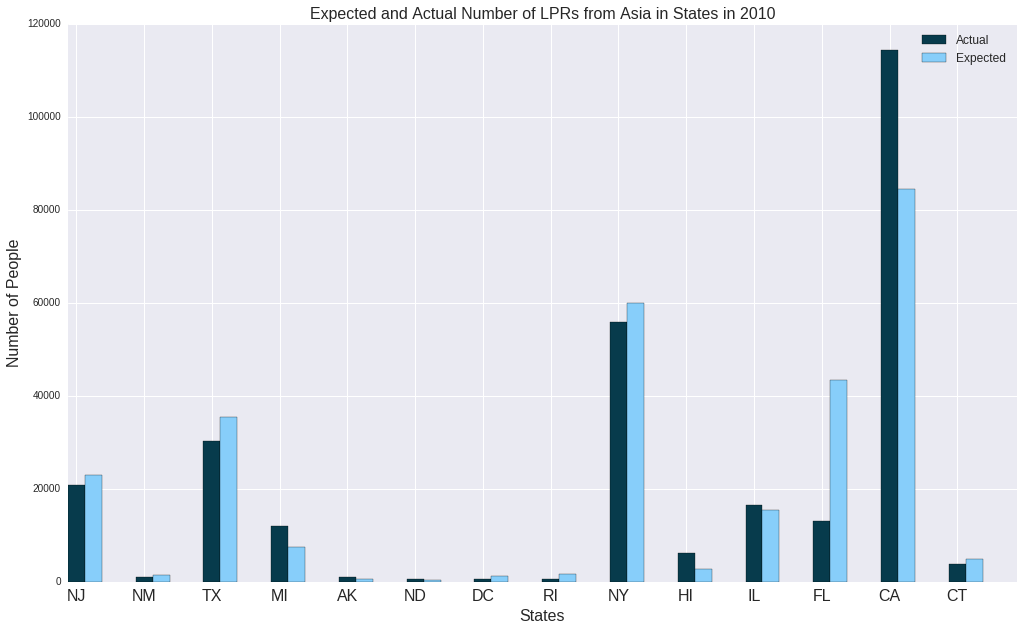

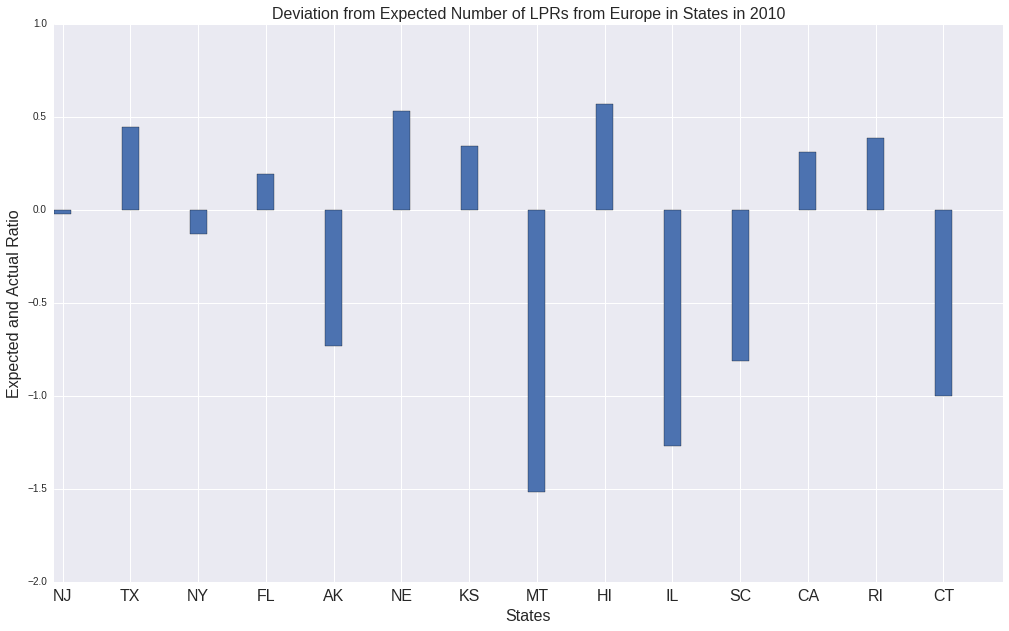

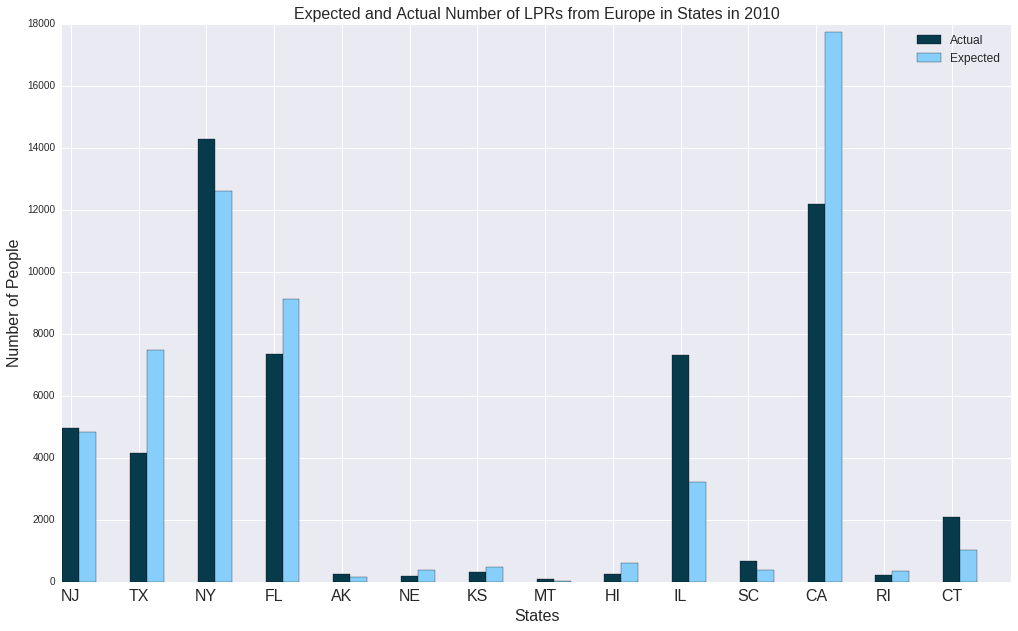

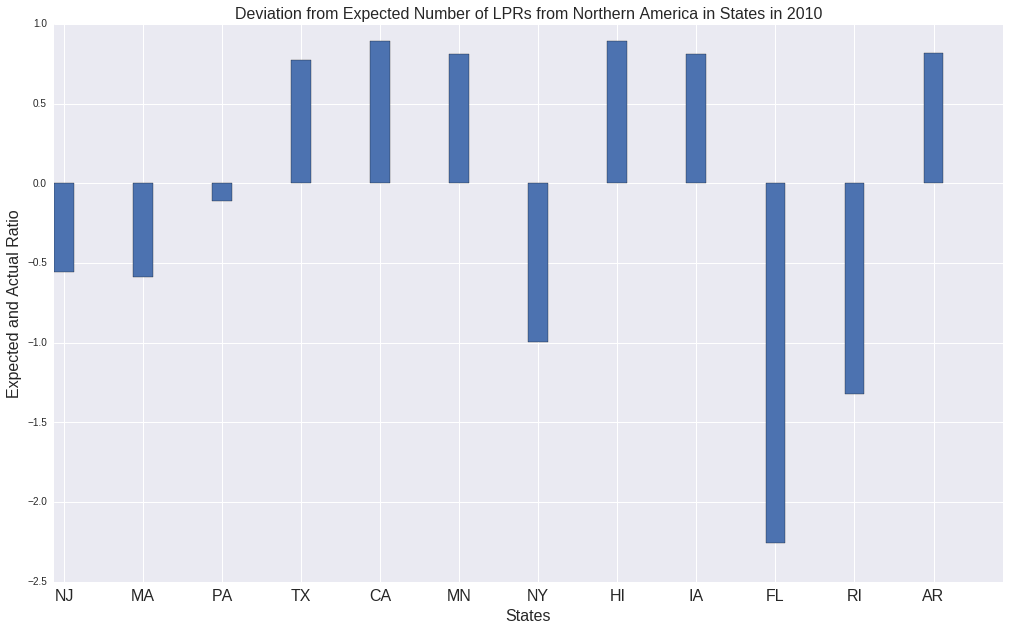

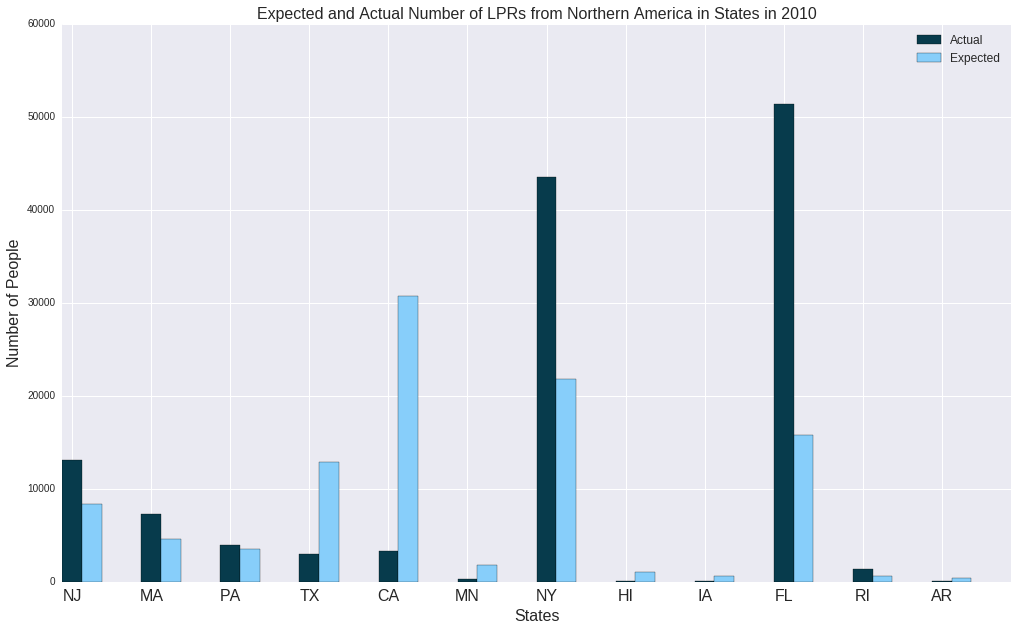

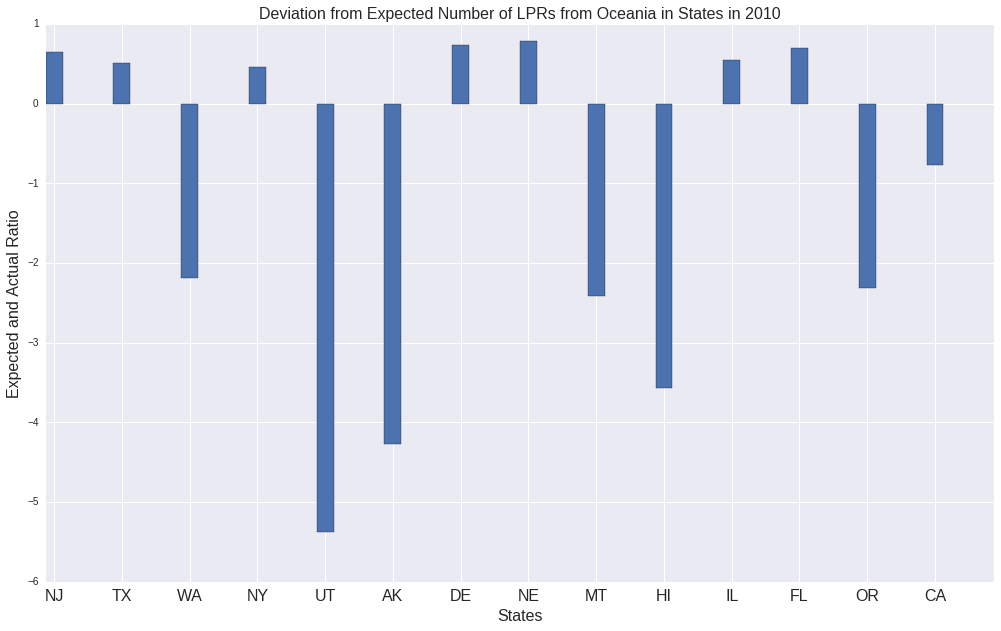

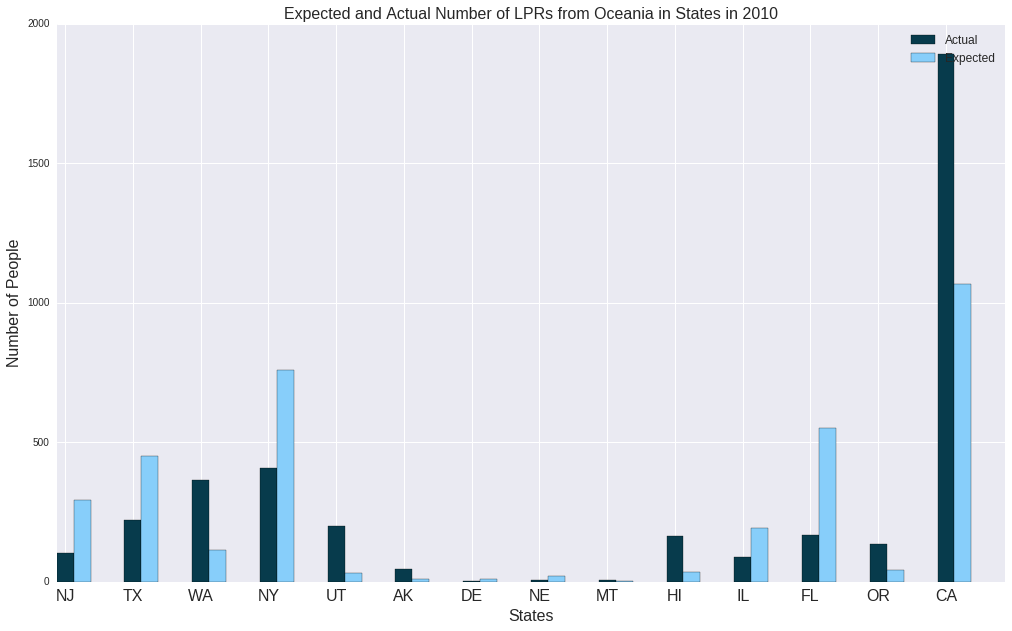

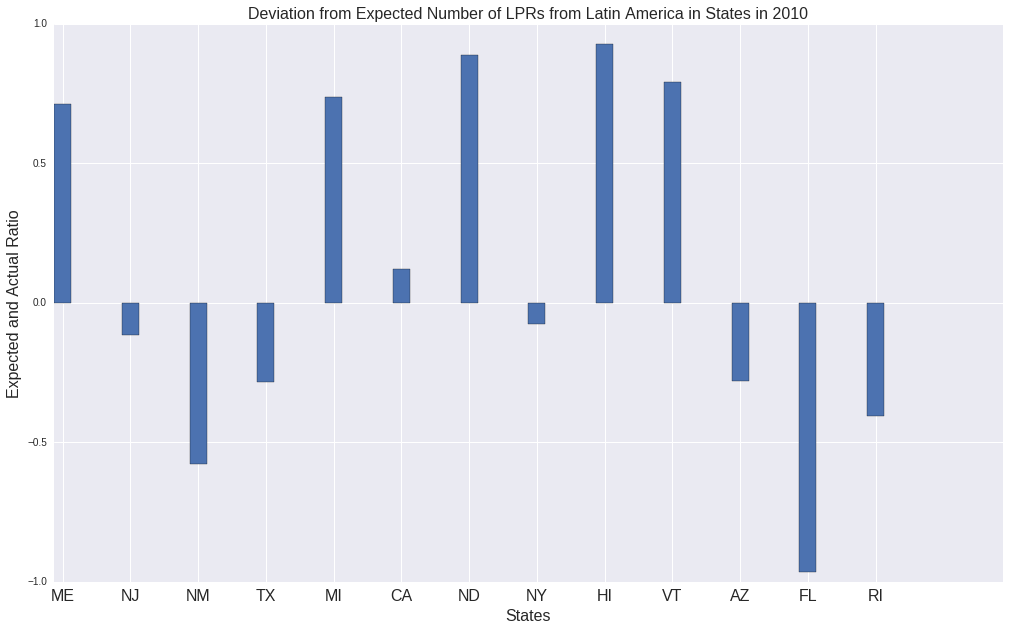

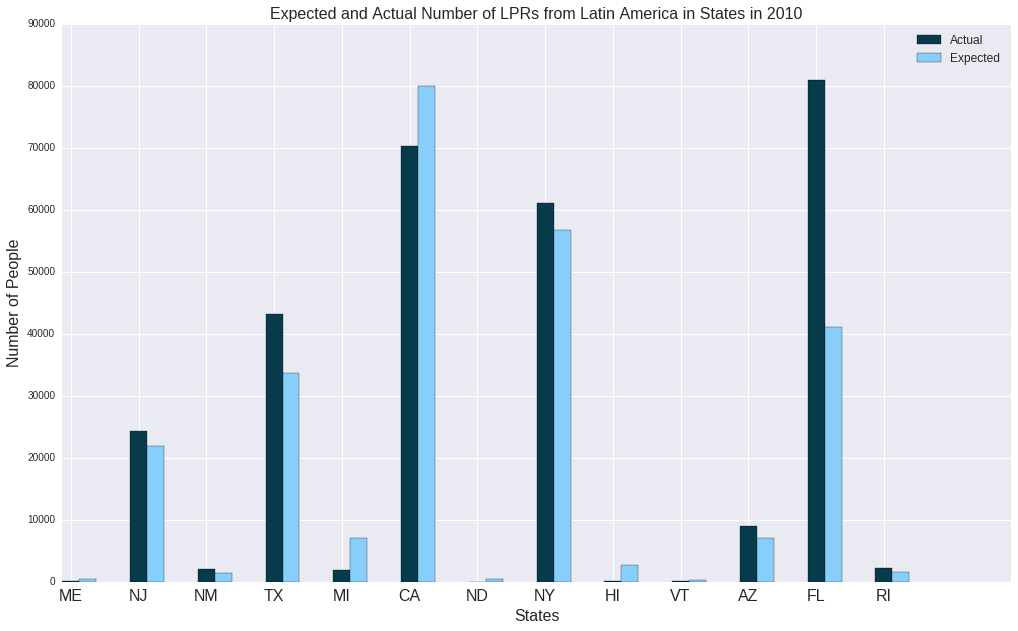

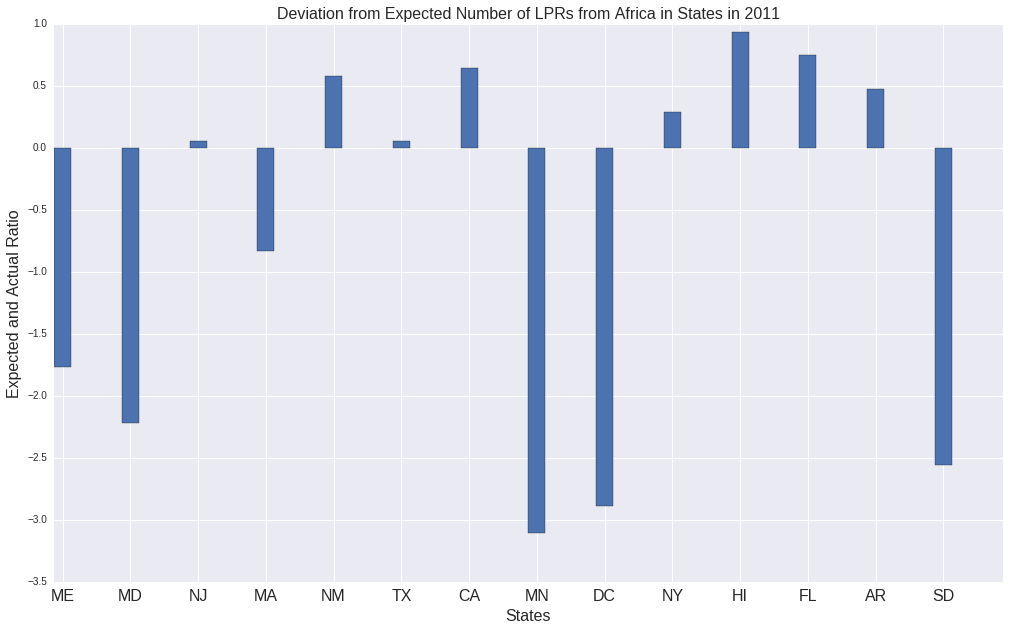

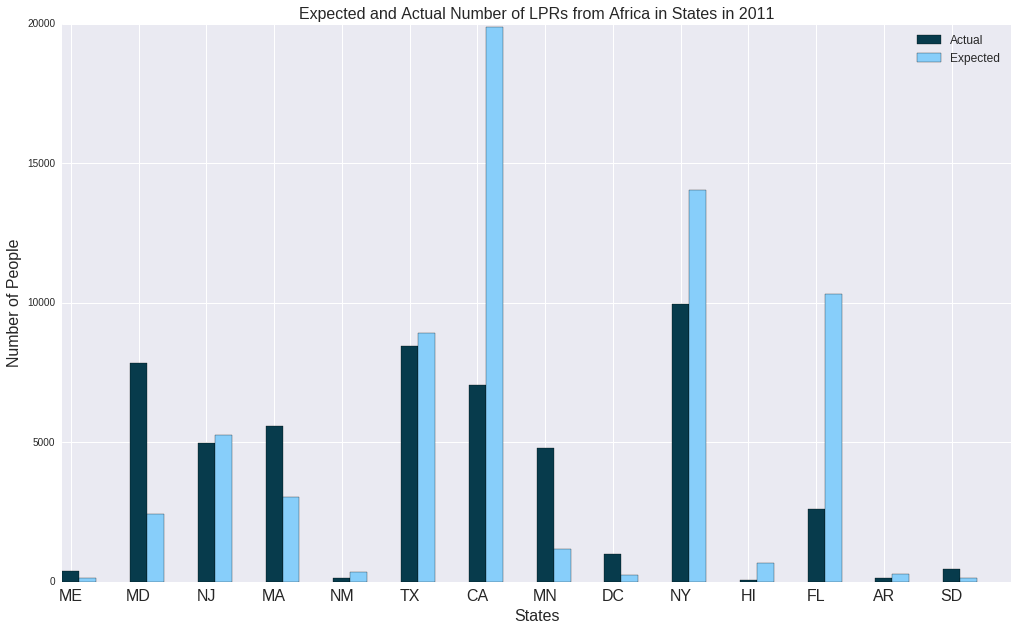

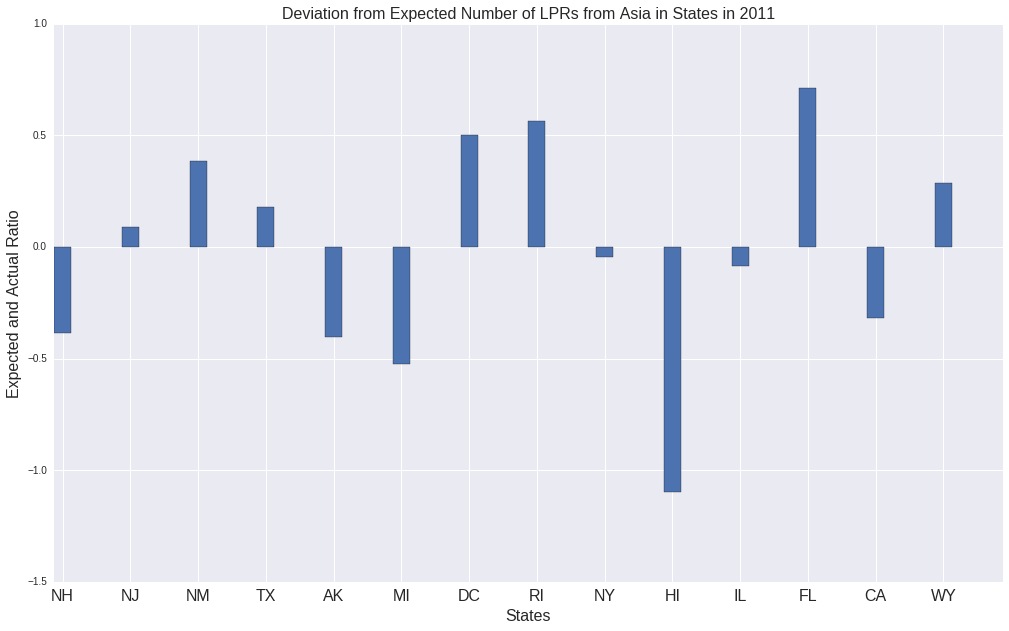

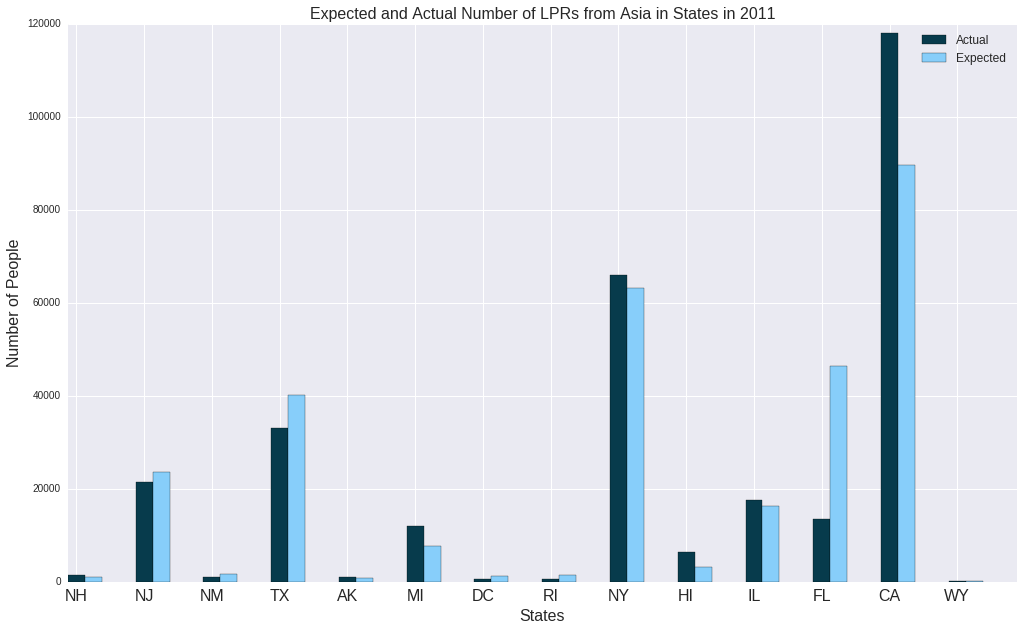

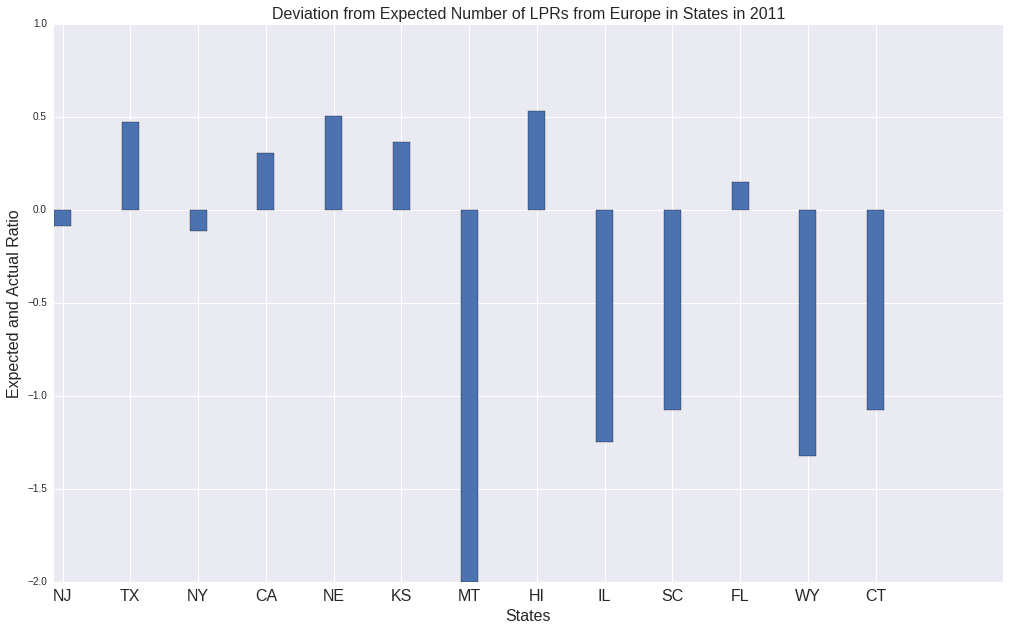

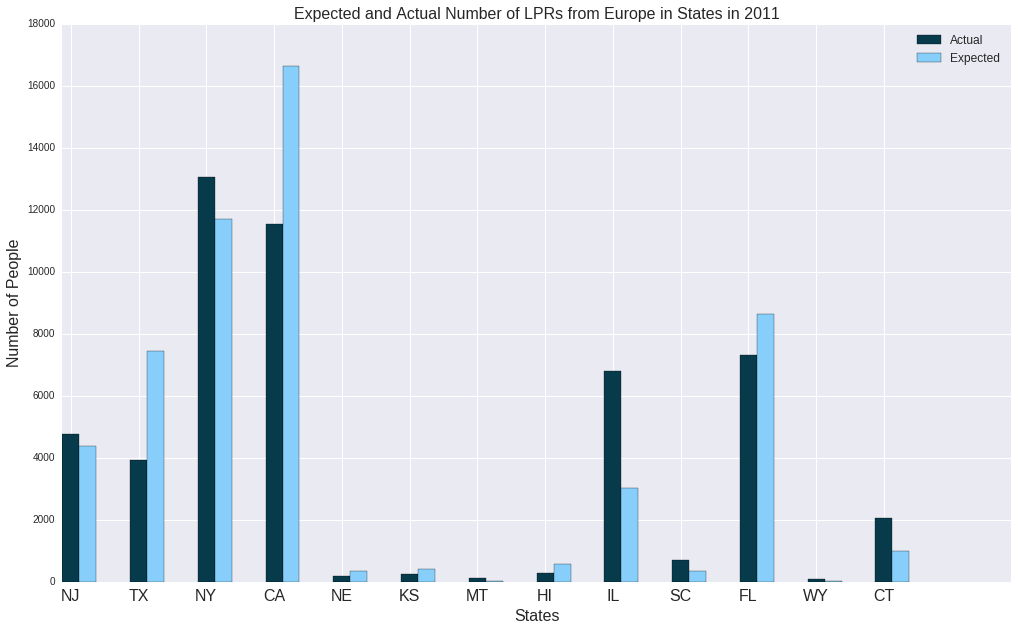

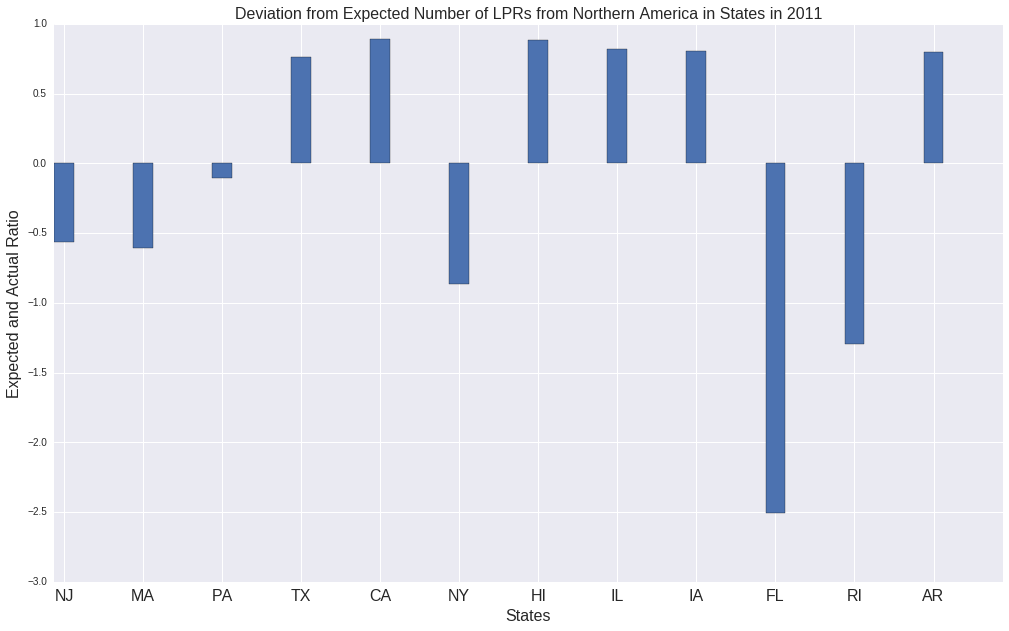

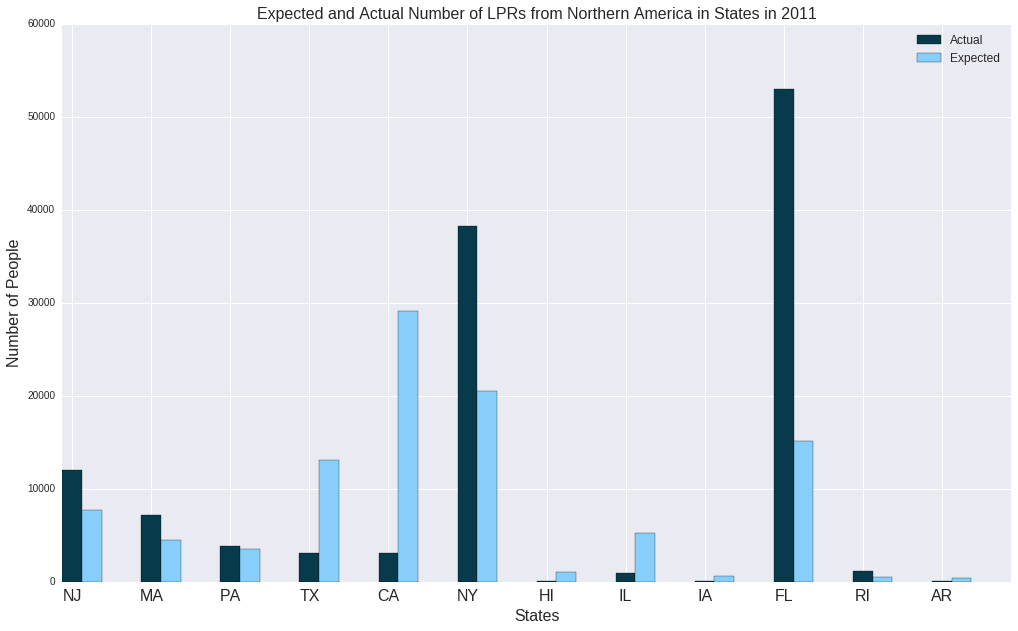

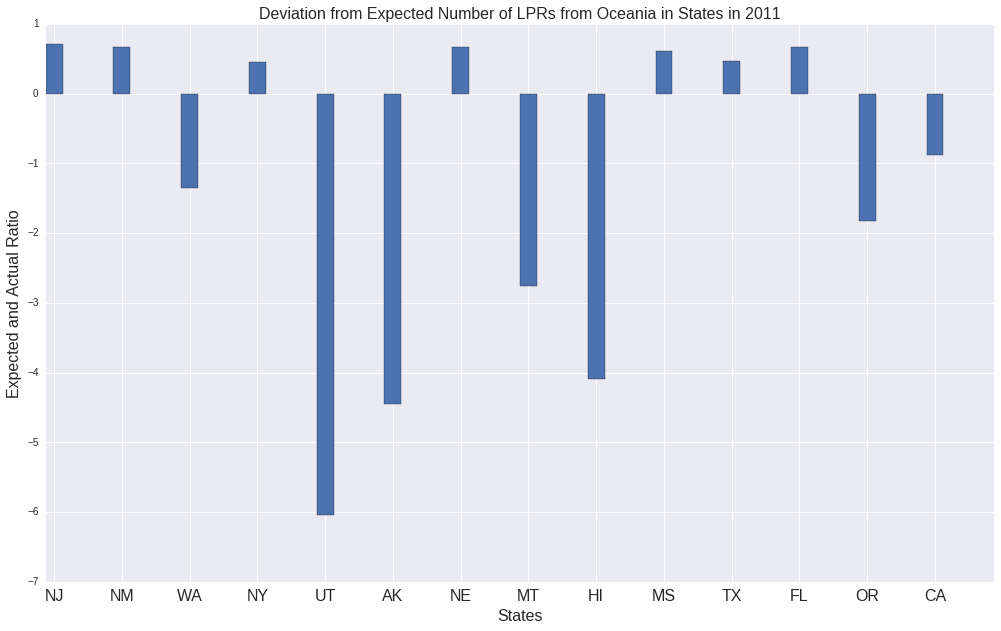

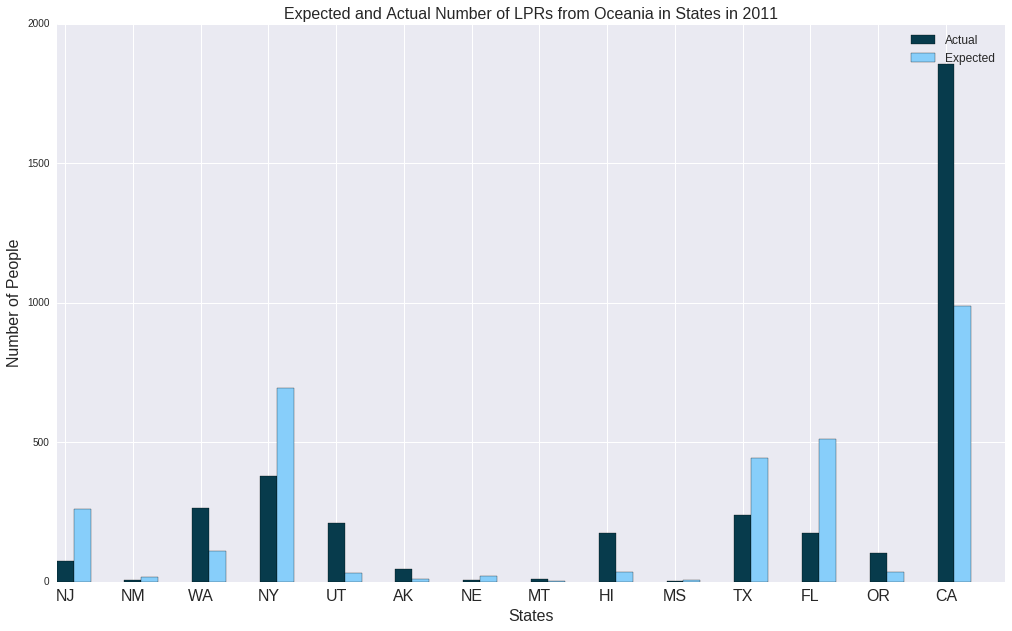

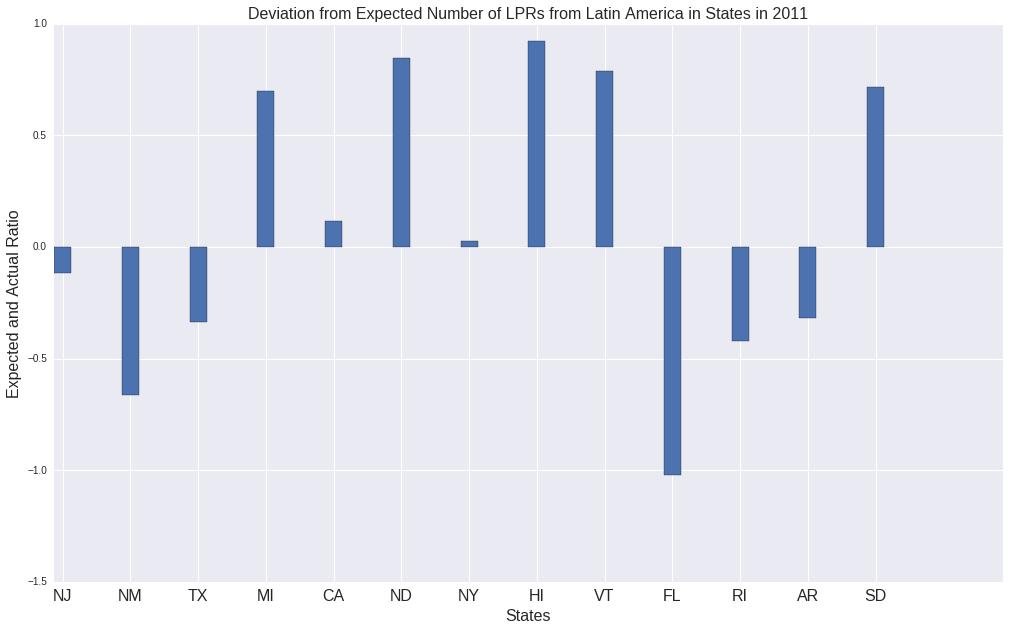

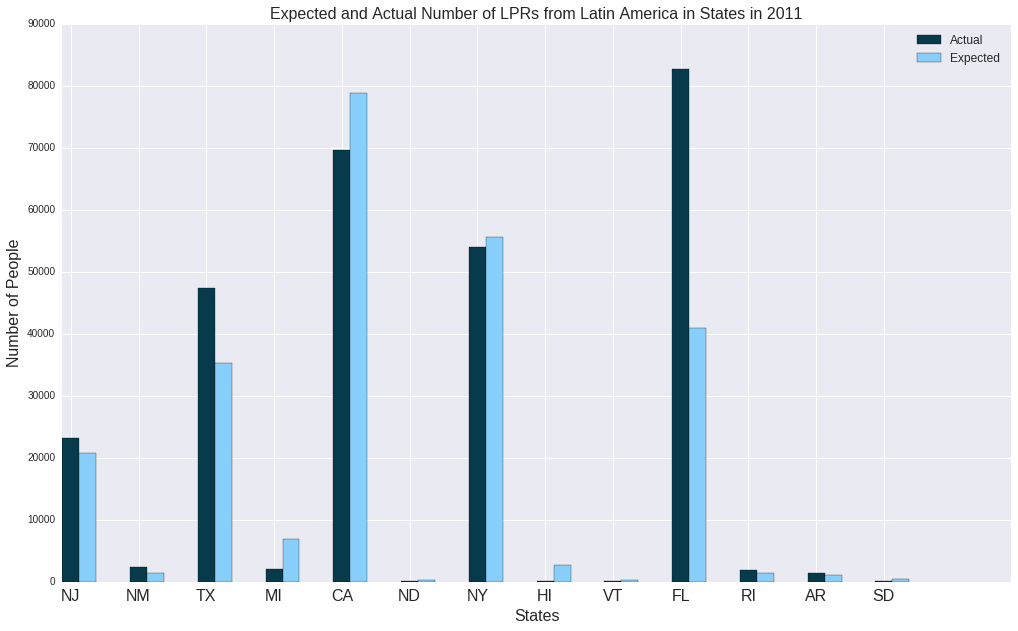

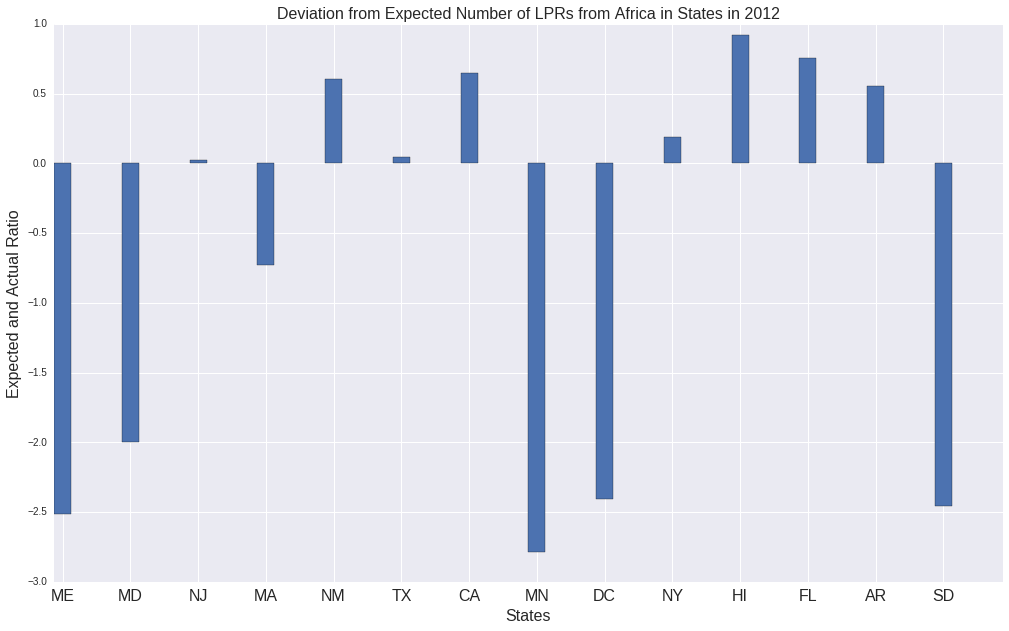

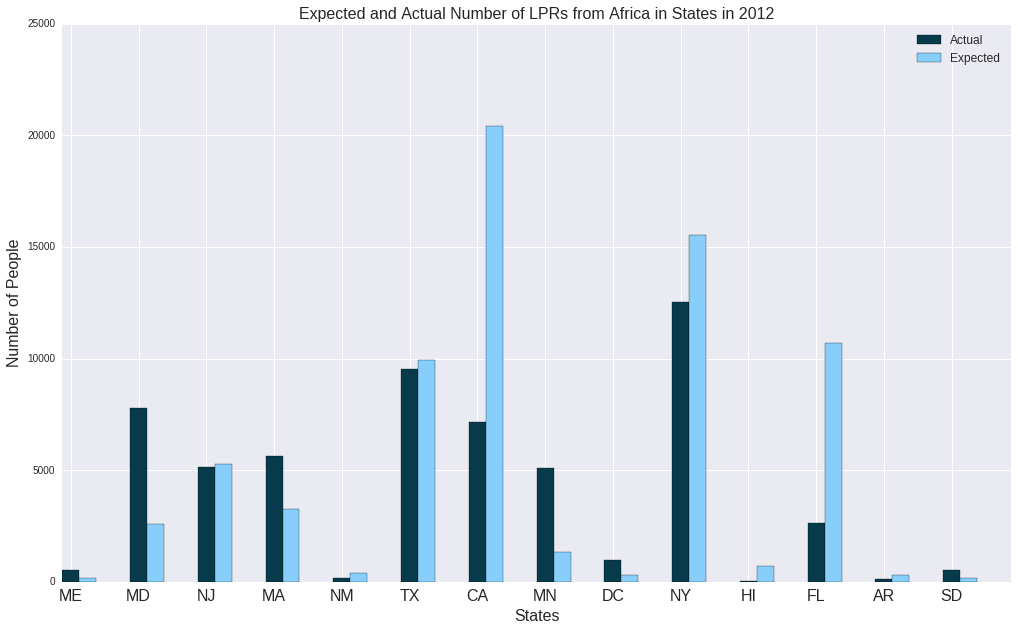

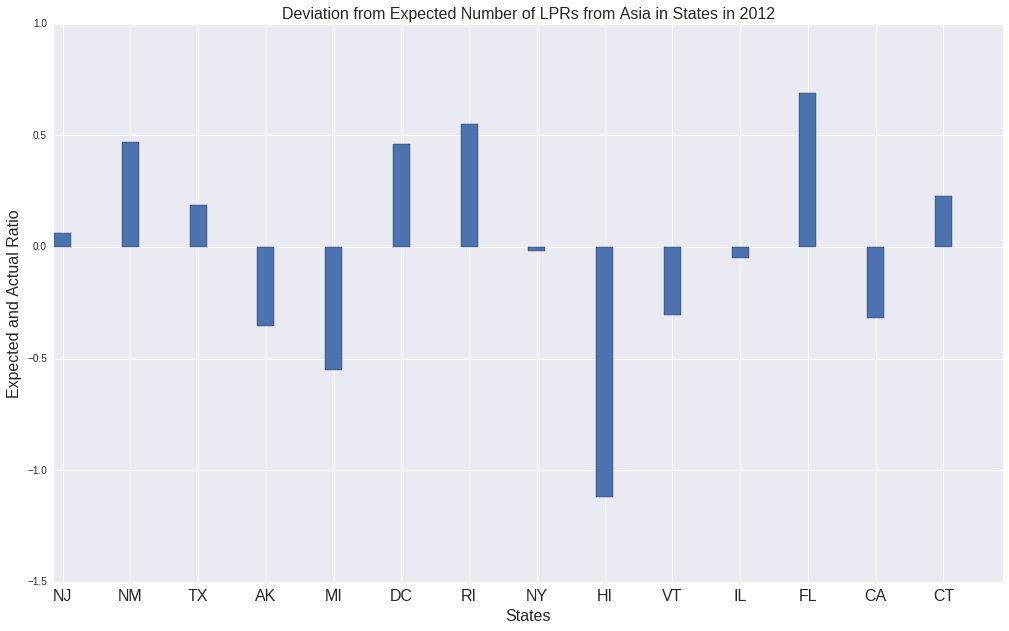

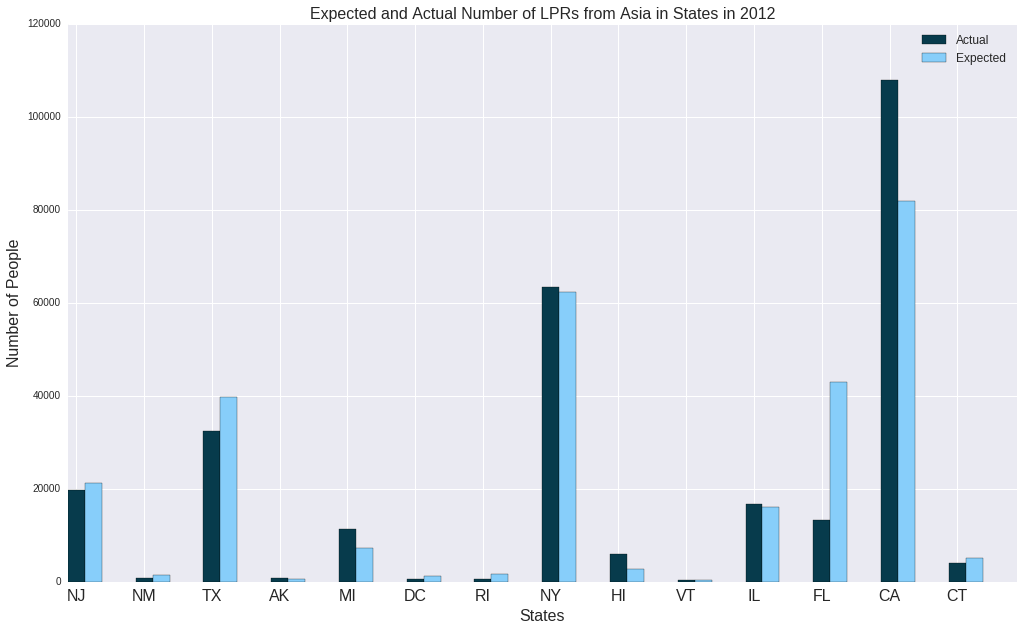

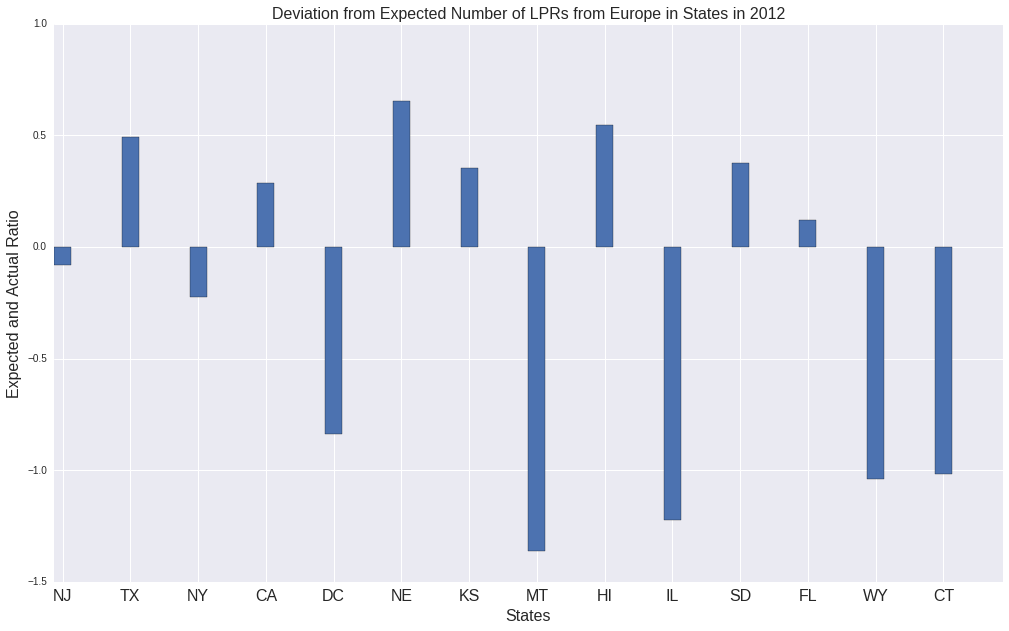

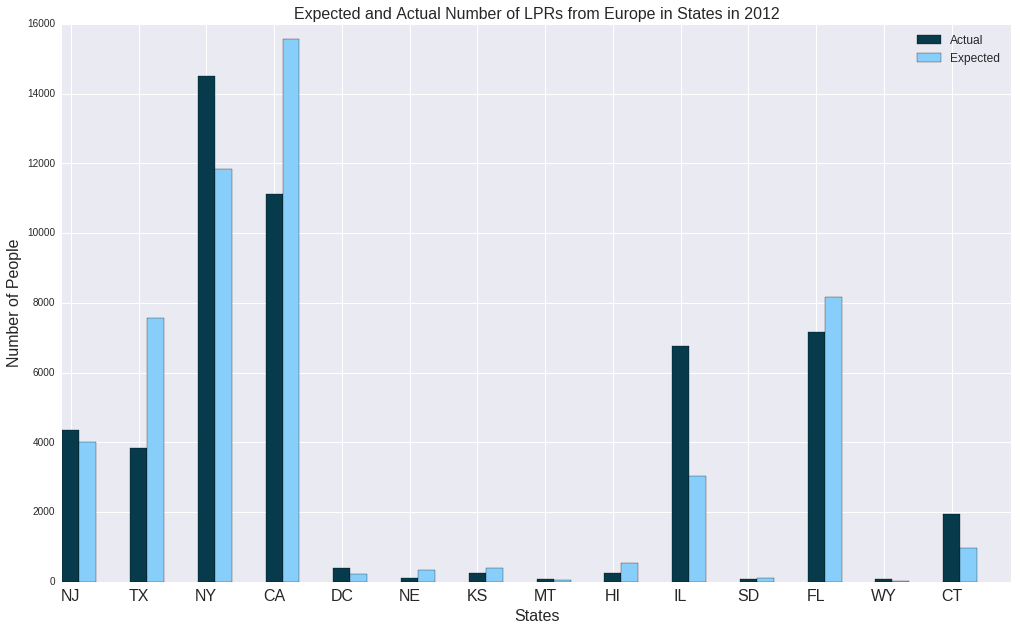

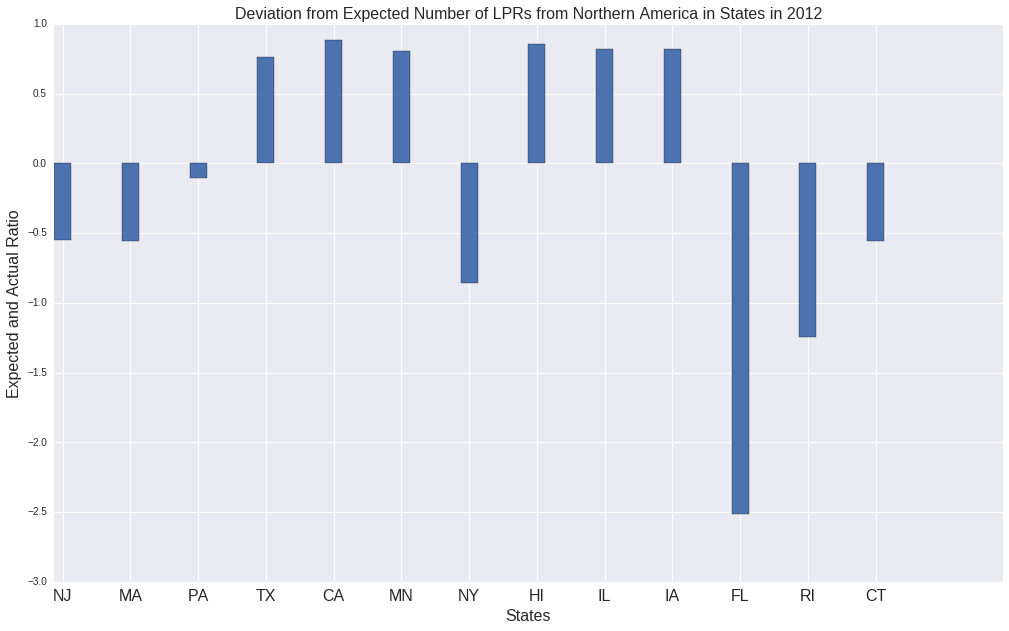

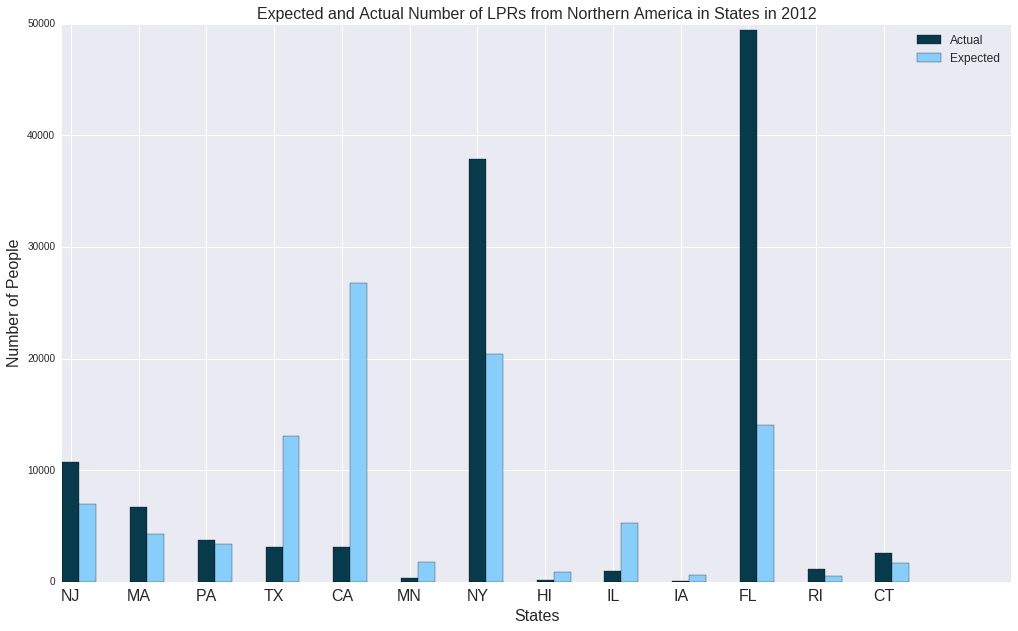

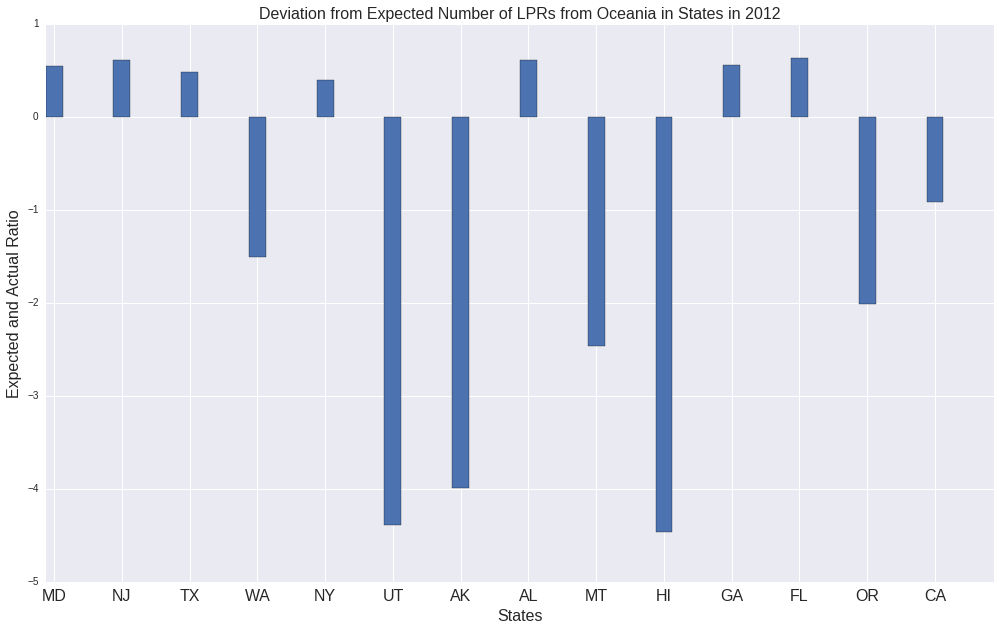

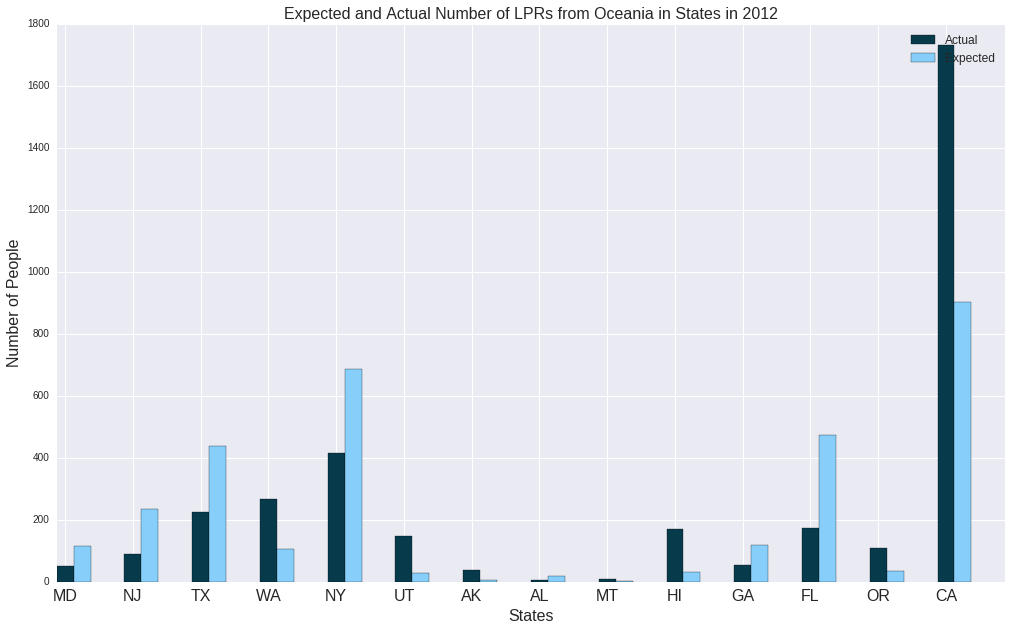

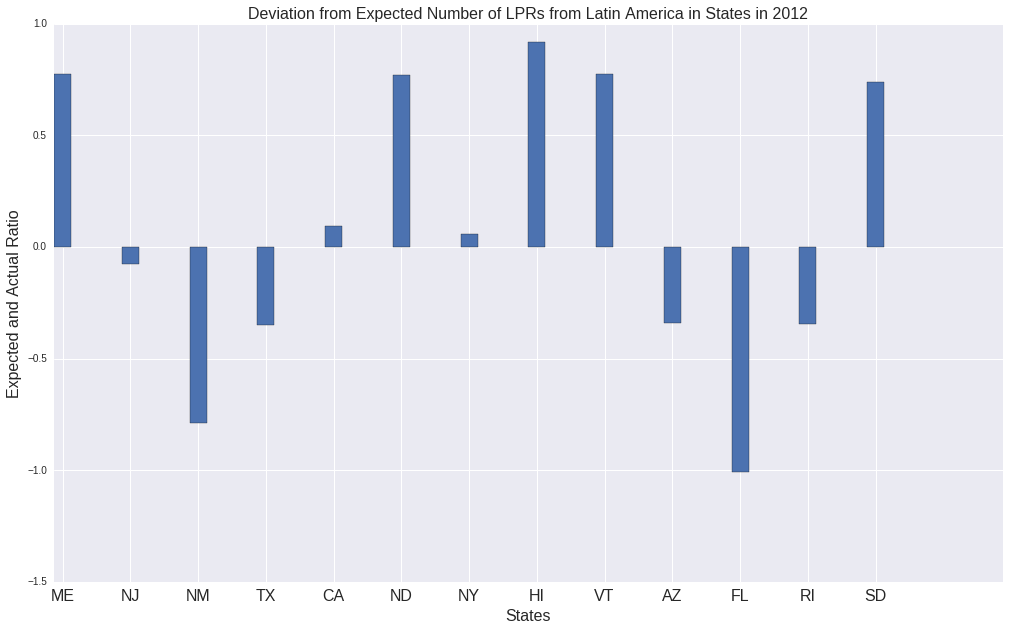

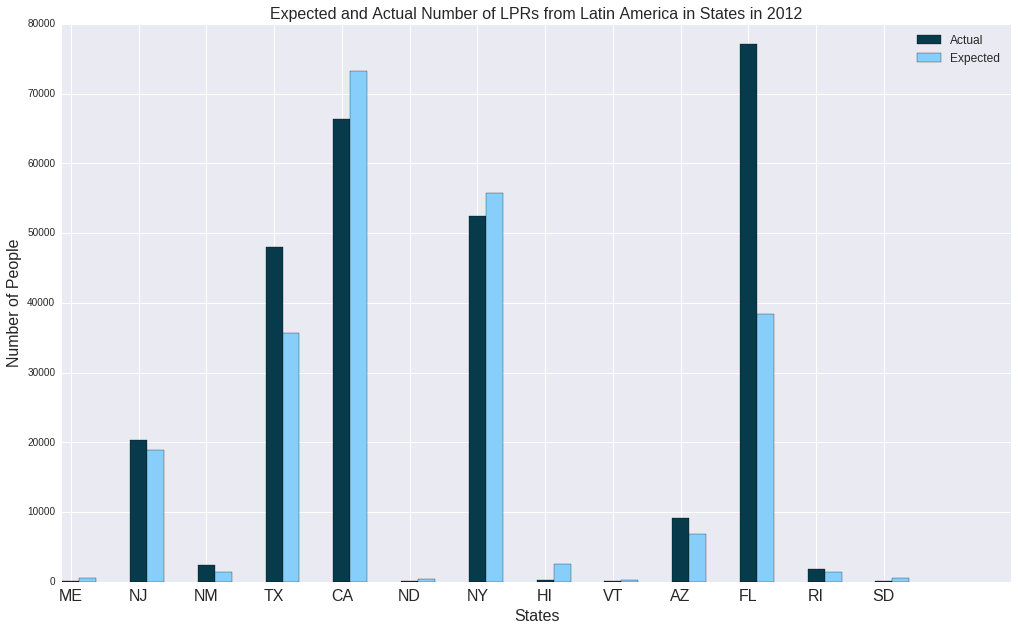

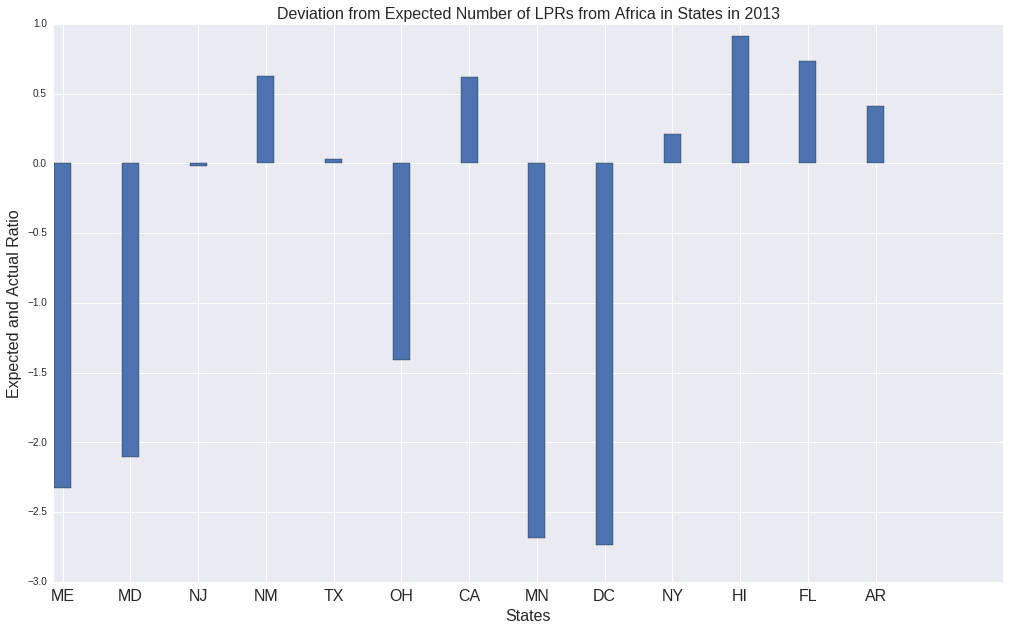

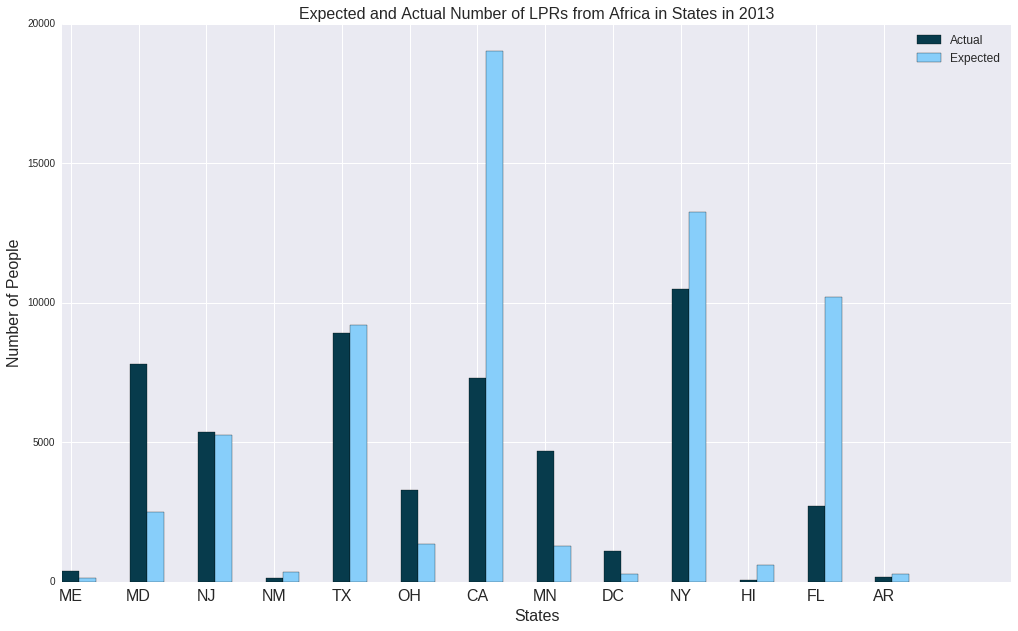

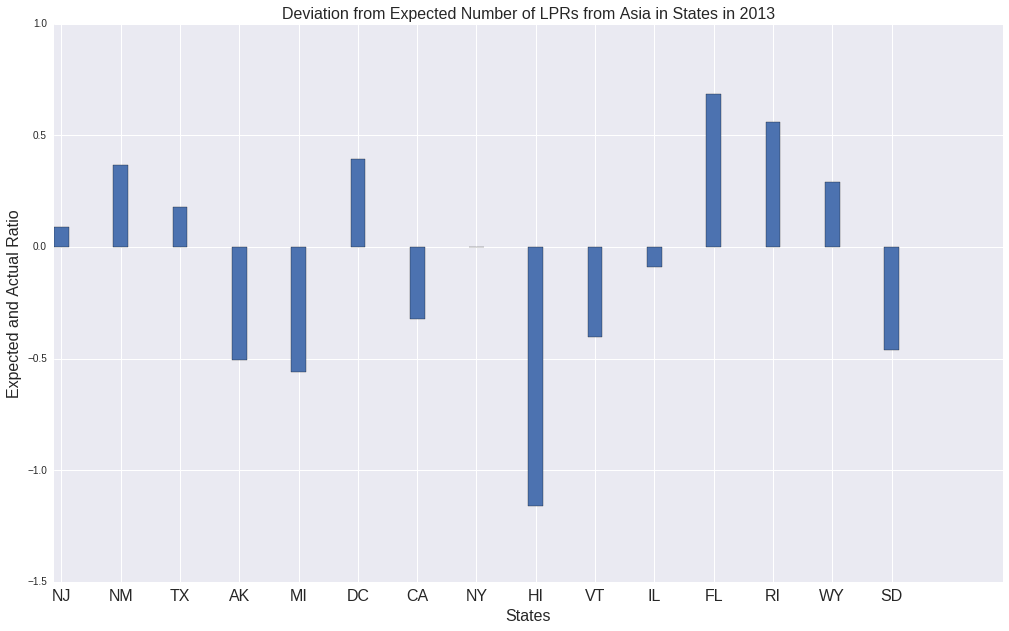

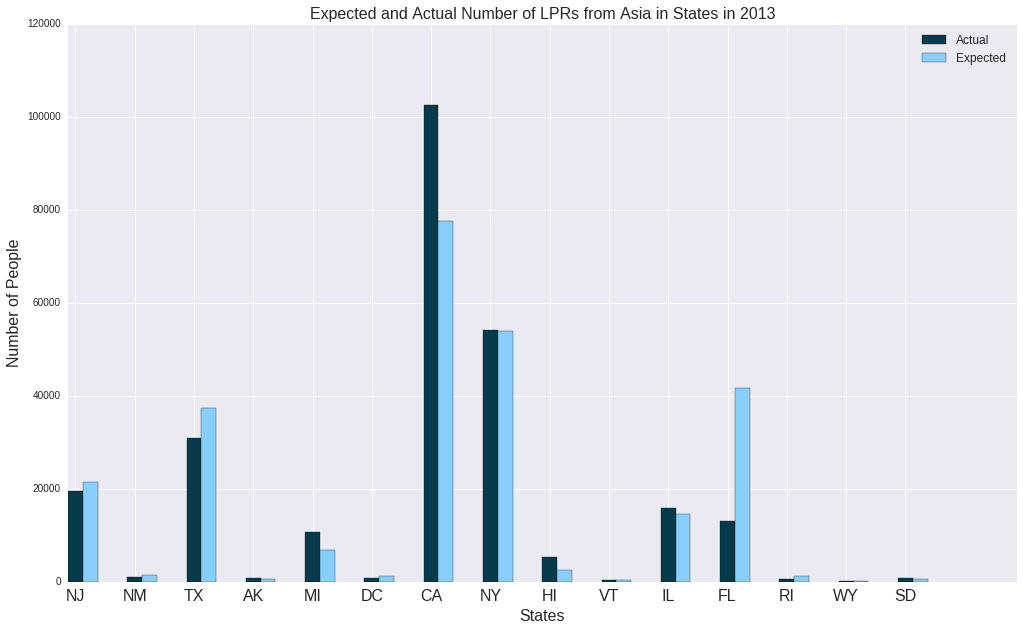

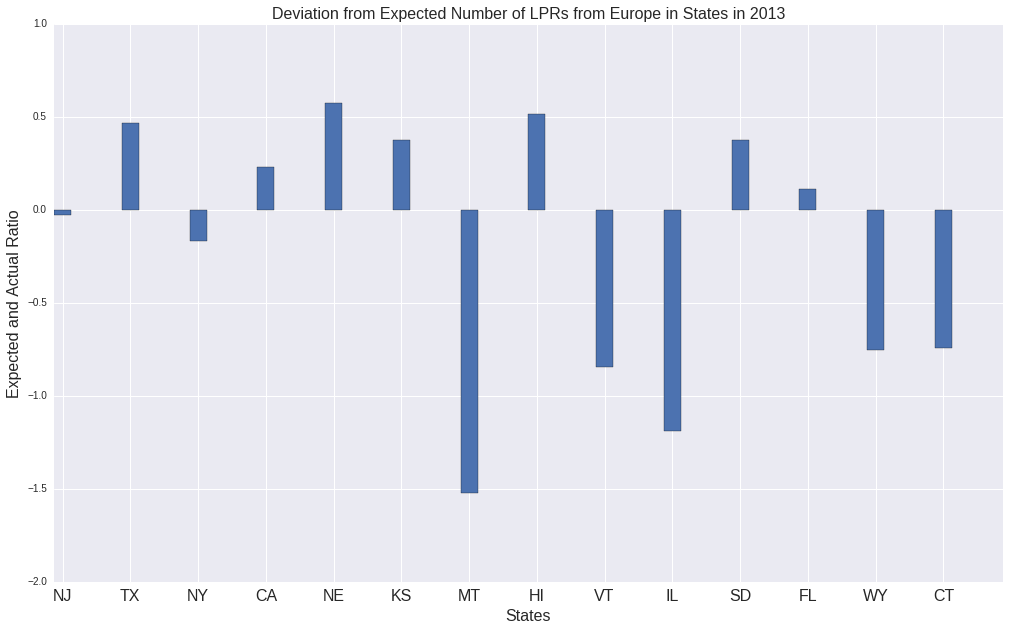

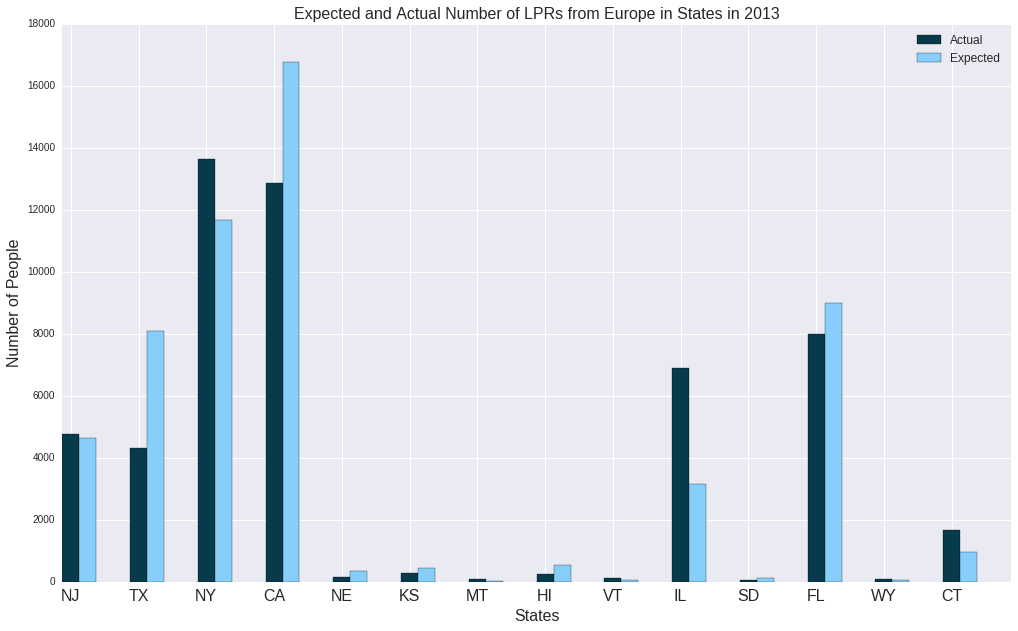

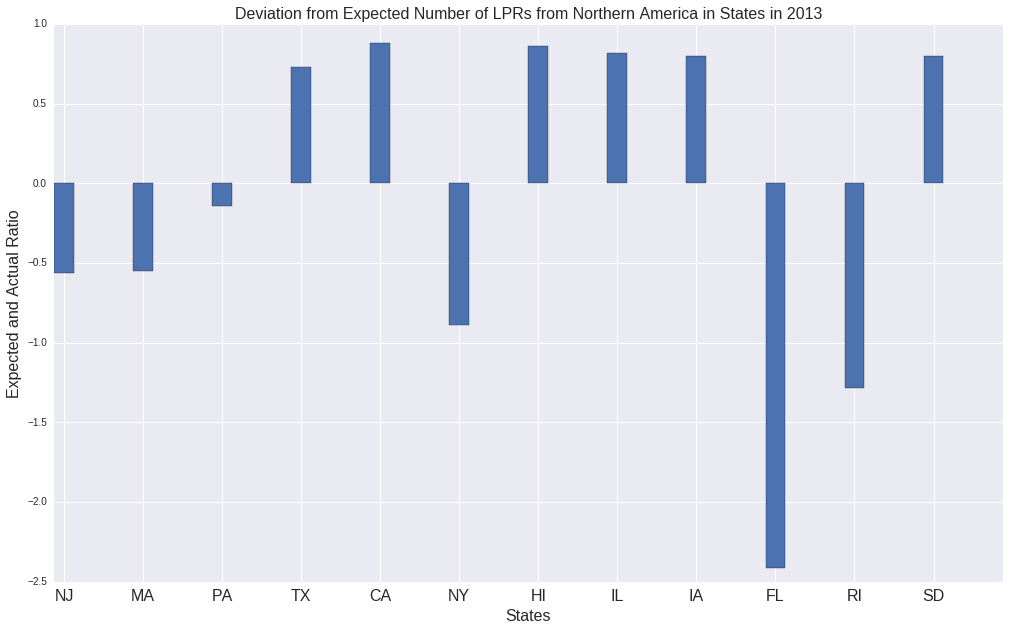

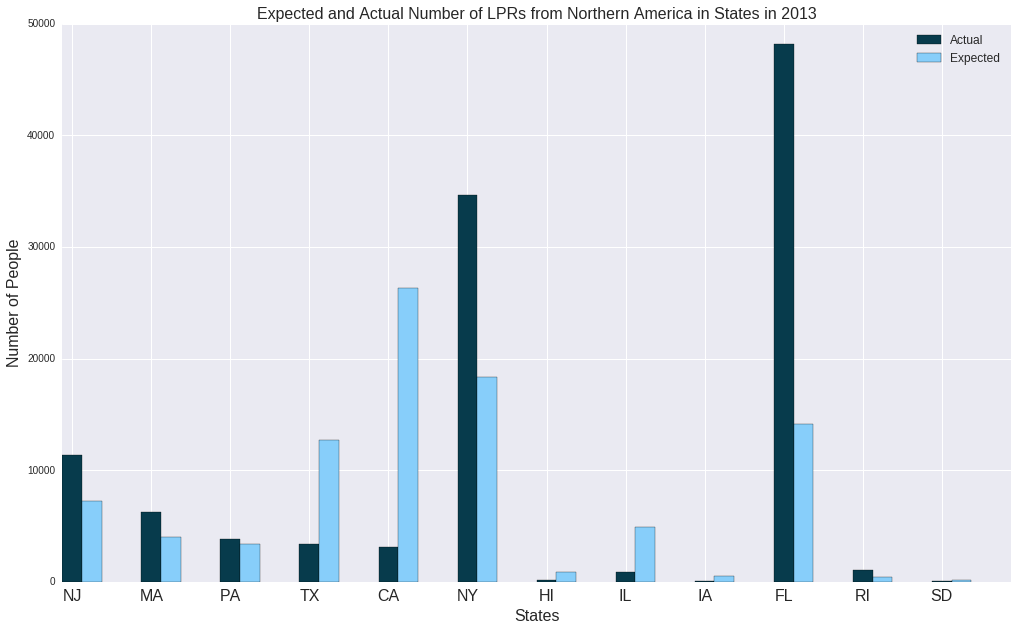

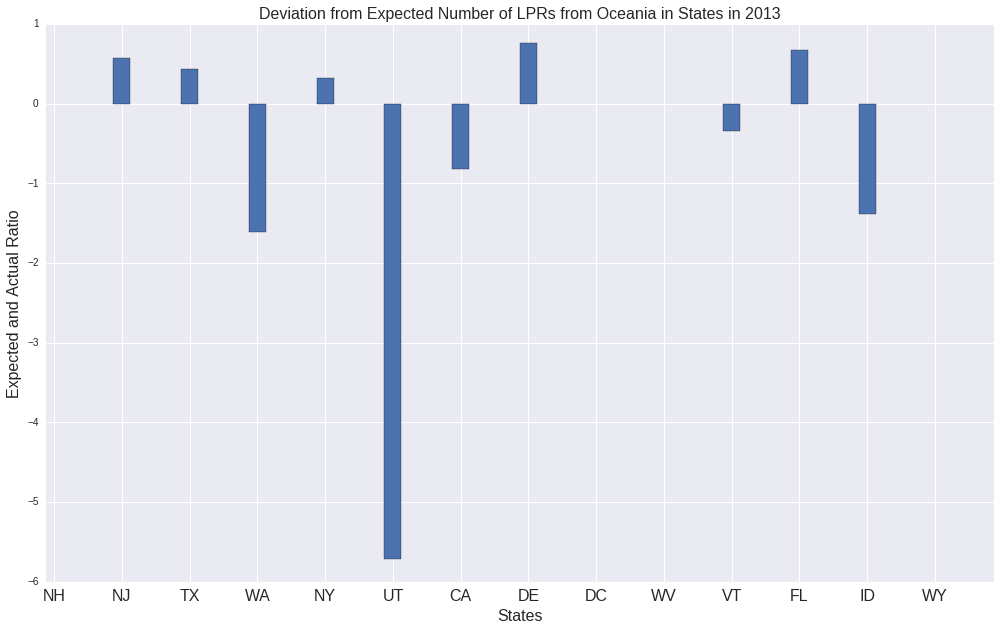

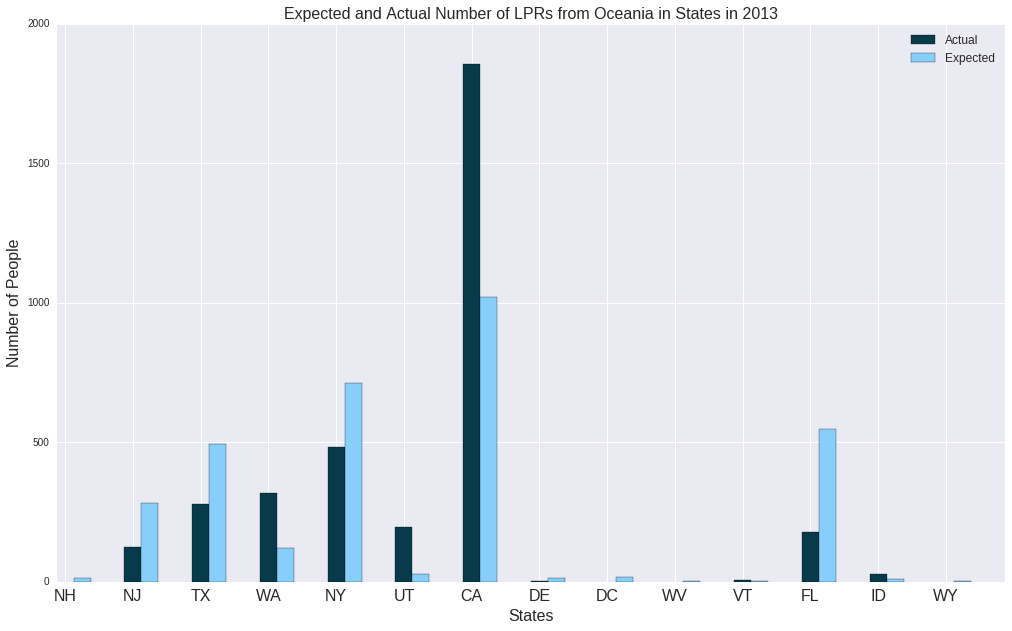

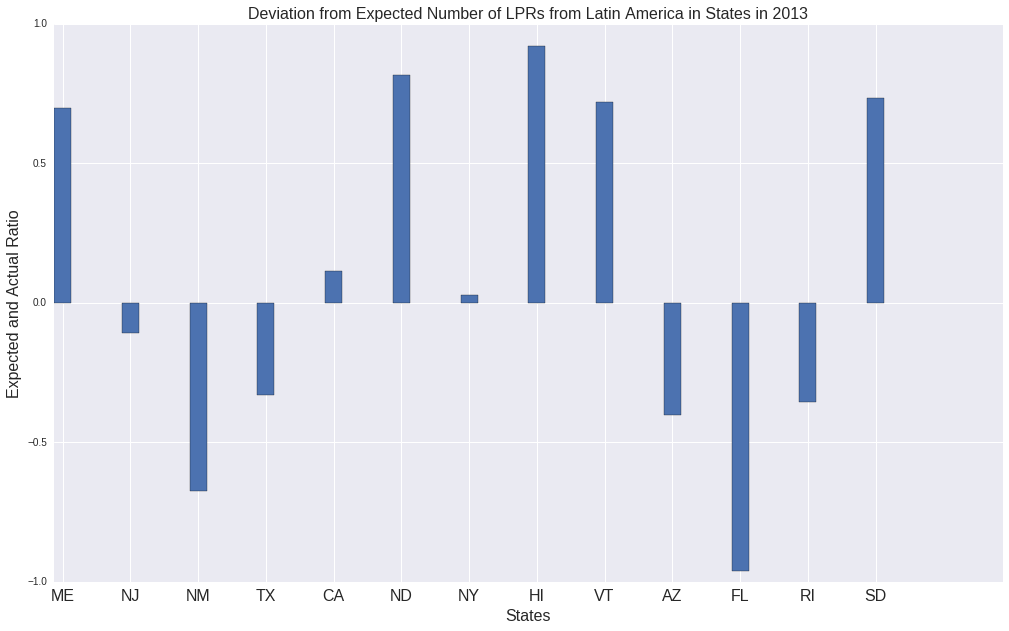

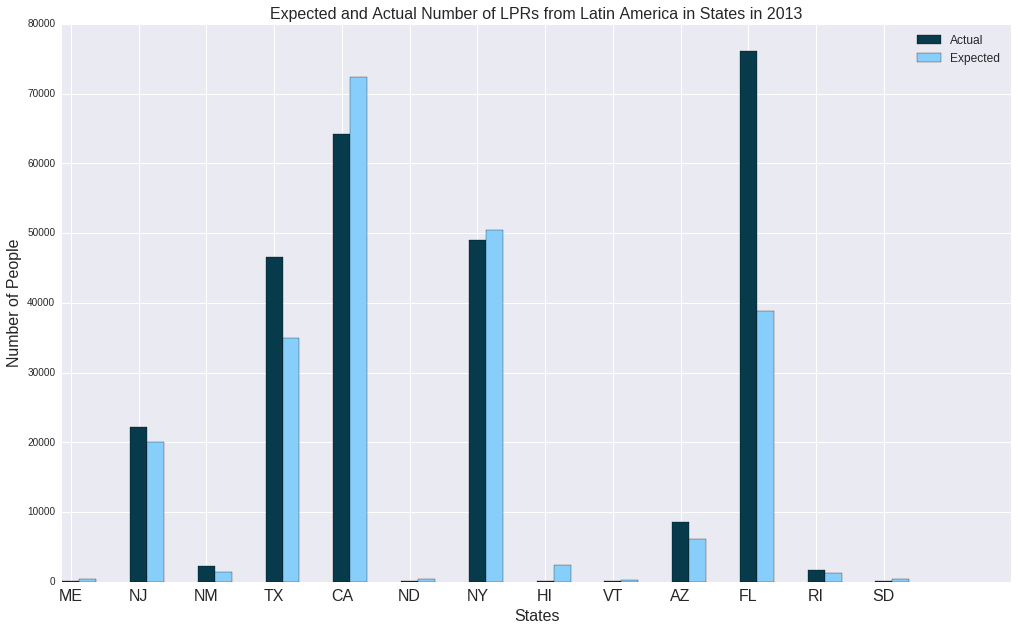

In [575]:
#plotting the states with highest error, expected, actual and saving to a file
for year,region in years_series.iteritems():
    if year < 4:
        yr = '200'+str(year+6)
    else:
        yr = '20'+str(year+6)
    
    for r,states in region.iteritems():
        high_act = sorted(states, key=lambda k: states[k][0],reverse=True)[:5]
        high_exp = sorted(states, key=lambda k: states[k][1],reverse=True)[:5]
        high_act_exp = sorted(states, key=lambda k: states[k][2])[:5]
        high_exp_act = sorted(states, key=lambda k: states[k][2],reverse=True)[:5]
        
        highest = set(high_act_exp+high_exp_act+high_act+high_exp)
                
        p1 = bar_plot('errors',highest,regions[r],states,yr)
        p1.savefig('img/'+str(yr)+'_'+regions[r]+'_error.png')
        
        p2 = bar_plot('actexp',highest,regions[r],states,yr)
        p2.savefig('img/'+str(yr)+'_'+regions[r]+'_actexp.png')
        
        print p1,p2